In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [10]:
dataOrig = pd.read_csv("feature_extraction/dataOrig.csv",usecols=lambda column: column != 'filename')

In [11]:
dataOrig.head()

chroma_C  chroma_Csharp  chroma_D  chroma_Dsharp  chroma_E  chroma_F  \
0  0.391512       0.429697  0.524729       0.385698  0.366340  0.433856   
1  0.544175       0.420254  0.424198       0.399732  0.300949  0.312941   
2  0.344232       0.477342  0.461315       0.383294  0.430534  0.360271   
3  0.392071       0.428158  0.523789       0.385555  0.366227  0.433113   
4  0.396111       0.442692  0.408399       0.486187  0.353345  0.326342   

   chroma_Fsharp  chroma_G  chroma_Gsharp  chroma_A  ...    mfcc12    mfcc13  \
0       0.445597  0.593311       0.438685  0.413015  ... -0.841709  2.132198   
1       0.363381  0.445987       0.342582  0.325424  ...  2.602134  4.048971   
2       0.595679  0.406584       0.354102  0.464613  ...  0.874806 -1.936897   
3       0.444056  0.591267       0.437267  0.413407  ... -0.844541  2.099680   
4       0.372000  0.300399       0.334868  0.334352  ... -0.441958 -1.084060   

     mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19    mfcc20  genre  
0  1.083206 -0.077104  0.648073 -1.484534  3.725629  4.553656  4.274244    pop  
1  2.384604  1.780818 -2.392593 -1.346176 -2.879179 -0.849864 -2.598134    pop  
2 -2.783130 -2.666644 -3.311479  1.708261 -0.152766  4.846820  2.906235    pop  
3  1.122588  0.006671  0.748260 -1.474304  3.672843  4.469373  4.198666    pop  
4 -3.450706 -2.475977 -3.302751 -2.228499 -2.649557 -2.744086  0.305748    pop  

[5 rows x 45 columns]

In [12]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dataOrig['genre'] = dataOrig['genre'].map(mappingGenresToIntegers)
dataOrig.head()

chroma_C  chroma_Csharp  chroma_D  chroma_Dsharp  chroma_E  chroma_F  \
0  0.391512       0.429697  0.524729       0.385698  0.366340  0.433856   
1  0.544175       0.420254  0.424198       0.399732  0.300949  0.312941   
2  0.344232       0.477342  0.461315       0.383294  0.430534  0.360271   
3  0.392071       0.428158  0.523789       0.385555  0.366227  0.433113   
4  0.396111       0.442692  0.408399       0.486187  0.353345  0.326342   

   chroma_Fsharp  chroma_G  chroma_Gsharp  chroma_A  ...    mfcc12    mfcc13  \
0       0.445597  0.593311       0.438685  0.413015  ... -0.841709  2.132198   
1       0.363381  0.445987       0.342582  0.325424  ...  2.602134  4.048971   
2       0.595679  0.406584       0.354102  0.464613  ...  0.874806 -1.936897   
3       0.444056  0.591267       0.437267  0.413407  ... -0.844541  2.099680   
4       0.372000  0.300399       0.334868  0.334352  ... -0.441958 -1.084060   

     mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19    mfcc20  genre  
0  1.083206 -0.077104  0.648073 -1.484534  3.725629  4.553656  4.274244      0  
1  2.384604  1.780818 -2.392593 -1.346176 -2.879179 -0.849864 -2.598134      0  
2 -2.783130 -2.666644 -3.311479  1.708261 -0.152766  4.846820  2.906235      0  
3  1.122588  0.006671  0.748260 -1.474304  3.672843  4.469373  4.198666      0  
4 -3.450706 -2.475977 -3.302751 -2.228499 -2.649557 -2.744086  0.305748      0  

[5 rows x 45 columns]

In [13]:
X = dataOrig.iloc[:, :-1]
y = dataOrig.iloc[:, -1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# CV - Round 1 - Only using n_estimators

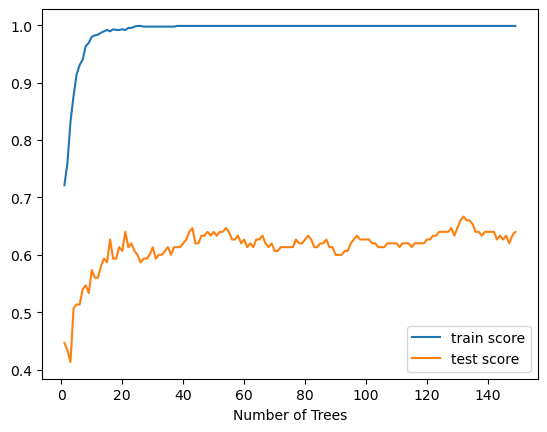

In [20]:
train_scores = np.zeros(0)
test_scores = np.zeros(0)

for i in range(1,150):
    random_forest = RandomForestClassifier(n_estimators=i,max_depth=10,random_state=42)
    random_forest.fit(X_train,y_train)
    train_scores = np.hstack([train_scores, random_forest.score(X_train,y_train)])
    test_scores = np.hstack([test_scores, random_forest.score(X_test,y_test)])
    
ax = sns.lineplot(x=range(1,150),y=train_scores,label="train score")
sns.lineplot(x=range(1,150),y=test_scores,label="test score")
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

# CV - Round 2

In [23]:
randomForestParams = {
    'n_estimators': [20, 30, 40, 50, 60, 70, 100, 150],
    'max_depth': [1, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 10, 20, 30],
}

RFC = RandomForestClassifier()
RFCGridSearch = GridSearchCV(RFC, randomForestParams, cv=5, scoring='accuracy', verbose=10)
RFCGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV 1/5; 1/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/5; 1/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.359 total time=   0.0s
[CV 2/5; 1/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/5; 1/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.276 total time=   0.0s
[CV 3/5; 1/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 1/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.347 total time=   0.0s
[CV 4/5; 1/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 4/5; 1/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_sampl

[CV 1/5; 8/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.329 total time=   0.1s
[CV 2/5; 8/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 8/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.353 total time=   0.1s
[CV 3/5; 8/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 8/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.376 total time=   0.1s
[CV 4/5; 8/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 8/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.365 total time=   0.1s
[CV 5/5; 8/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV 5/5; 14/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.353 total time=   0.0s
[CV 1/5; 15/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 15/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.359 total time=   0.0s
[CV 2/5; 15/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 15/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.324 total time=   0.0s
[CV 3/5; 15/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 15/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.341 total time=   0.1s
[CV 4/5; 15/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=5, n_esti

[CV 3/5; 22/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.376 total time=   0.0s
[CV 4/5; 22/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 22/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.335 total time=   0.0s
[CV 5/5; 22/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 5/5; 22/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.365 total time=   0.0s
[CV 1/5; 23/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 23/1152] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.347 total time=   0.1s
[CV 2/5; 23/1152] START max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=10, n_

[CV 2/5; 29/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.353 total time=   0.0s
[CV 3/5; 29/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 3/5; 29/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.329 total time=   0.0s
[CV 4/5; 29/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 4/5; 29/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.324 total time=   0.0s
[CV 5/5; 29/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 5/5; 29/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.376 total time=   0.0s
[CV 1/5; 30/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV 1/5; 36/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.353 total time=   0.0s
[CV 2/5; 36/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 36/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.329 total time=   0.0s
[CV 3/5; 36/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 36/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.388 total time=   0.0s
[CV 4/5; 36/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 36/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.306 total time=   0.0s
[CV 5/5; 36/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators

[CV 1/5; 43/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.312 total time=   0.0s
[CV 2/5; 43/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 2/5; 43/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.324 total time=   0.0s
[CV 3/5; 43/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 3/5; 43/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.371 total time=   0.0s
[CV 4/5; 43/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 4/5; 43/1152] END max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.306 total time=   0.0s
[CV 5/5; 43/1152] START max_depth=1, max_features=1, min_samples_leaf=2, min_samples_split=10, n_es

[CV 1/5; 51/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.365 total time=   0.0s
[CV 2/5; 51/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 51/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.341 total time=   0.0s
[CV 3/5; 51/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 51/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.359 total time=   0.0s
[CV 4/5; 51/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 51/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.347 total time=   0.0s
[CV 5/5; 51/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators

[CV 1/5; 58/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.388 total time=   0.0s
[CV 2/5; 58/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 2/5; 58/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.282 total time=   0.0s
[CV 3/5; 58/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 3/5; 58/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.335 total time=   0.0s
[CV 4/5; 58/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 4/5; 58/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.371 total time=   0.0s
[CV 5/5; 58/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV 4/5; 64/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.324 total time=   0.1s
[CV 5/5; 64/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 5/5; 64/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.365 total time=   0.1s
[CV 1/5; 65/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 1/5; 65/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.312 total time=   0.0s
[CV 2/5; 65/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 2/5; 65/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.347 total time=   0.0s
[CV 3/5; 65/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_es

[CV 4/5; 71/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.347 total time=   0.1s
[CV 5/5; 71/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 71/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.388 total time=   0.1s
[CV 1/5; 72/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 72/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.353 total time=   0.1s
[CV 2/5; 72/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 72/1152] END max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.376 total time=   0.1s
[CV 3/5; 72/1152] START max_depth=1, max_features=1, min_samples_leaf=4, min_samples_split=1

[CV 4/5; 78/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.382 total time=   0.2s
[CV 5/5; 78/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 5/5; 78/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.312 total time=   0.1s
[CV 1/5; 79/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 79/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.347 total time=   0.1s
[CV 2/5; 79/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 79/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.324 total time=   0.1s
[CV 3/5; 79/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, 

[CV 3/5; 85/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.341 total time=   0.1s
[CV 4/5; 85/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 4/5; 85/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.365 total time=   0.1s
[CV 5/5; 85/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 5/5; 85/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.353 total time=   0.1s
[CV 1/5; 86/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 86/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.341 total time=   0.1s
[CV 2/5; 86/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_es

[CV 1/5; 92/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.347 total time=   0.0s
[CV 2/5; 92/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 92/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.306 total time=   0.0s
[CV 3/5; 92/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 92/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.300 total time=   0.0s
[CV 4/5; 92/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 92/1152] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.318 total time=   0.0s
[CV 5/5; 92/1152] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=

[CV 5/5; 98/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.318 total time=   0.0s
[CV 1/5; 99/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 1/5; 99/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.259 total time=   0.0s
[CV 2/5; 99/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/5; 99/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.312 total time=   0.0s
[CV 3/5; 99/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/5; 99/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.335 total time=   0.0s
[CV 4/5; 99/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_es

[CV 5/5; 106/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.376 total time=   0.0s
[CV 1/5; 107/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 1/5; 107/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.335 total time=   0.0s
[CV 2/5; 107/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 2/5; 107/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.324 total time=   0.0s
[CV 3/5; 107/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 3/5; 107/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.276 total time=   0.1s
[CV 4/5; 107/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split

[CV 5/5; 113/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.365 total time=   0.0s
[CV 1/5; 114/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 1/5; 114/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.359 total time=   0.0s
[CV 2/5; 114/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 2/5; 114/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.382 total time=   0.0s
[CV 3/5; 114/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 3/5; 114/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.341 total time=   0.0s
[CV 4/5; 114/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_sample

[CV 3/5; 120/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.353 total time=   0.1s
[CV 4/5; 120/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 4/5; 120/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.329 total time=   0.1s
[CV 5/5; 120/1152] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 120/1152] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.382 total time=   0.1s
[CV 1/5; 121/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 1/5; 121/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.271 total time=   0.0s
[CV 2/5; 121/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_sam

[CV 3/5; 127/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.365 total time=   0.1s
[CV 4/5; 127/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 127/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.335 total time=   0.1s
[CV 5/5; 127/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 127/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.382 total time=   0.1s
[CV 1/5; 128/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 1/5; 128/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.329 total time=   0.2s
[CV 2/5; 128/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_sample

[CV 2/5; 134/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.329 total time=   0.1s
[CV 3/5; 134/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 3/5; 134/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.335 total time=   0.1s
[CV 4/5; 134/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 4/5; 134/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.353 total time=   0.1s
[CV 5/5; 134/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 5/5; 134/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.353 total time=   0.1s
[CV 1/5; 135/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split

[CV 1/5; 141/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.276 total time=   0.1s
[CV 2/5; 141/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 2/5; 141/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.294 total time=   0.1s
[CV 3/5; 141/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 3/5; 141/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.341 total time=   0.1s
[CV 4/5; 141/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 4/5; 141/1152] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.341 total time=   0.1s
[CV 5/5; 141/1152] START max_depth=1, max_features=10, min_samples_leaf=4, min_sample

[CV 1/5; 148/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.265 total time=   0.1s
[CV 2/5; 148/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 148/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.300 total time=   0.1s
[CV 3/5; 148/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 148/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.329 total time=   0.1s
[CV 4/5; 148/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 148/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.335 total time=   0.1s
[CV 5/5; 148/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split

[CV 3/5; 155/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.300 total time=   0.0s
[CV 4/5; 155/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 155/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.312 total time=   0.0s
[CV 5/5; 155/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 5/5; 155/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.359 total time=   0.0s
[CV 1/5; 156/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 156/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.324 total time=   0.1s
[CV 2/5; 156/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split

[CV 3/5; 162/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.353 total time=   0.0s
[CV 4/5; 162/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 162/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.388 total time=   0.0s
[CV 5/5; 162/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 5/5; 162/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.300 total time=   0.0s
[CV 1/5; 163/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 1/5; 163/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.329 total time=   0.0s
[CV 2/5; 163/1152] START max_depth=1, max_features=20, min_samples_leaf=1, min_sample

[CV 5/5; 168/1152] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.318 total time=   0.2s
[CV 1/5; 169/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 1/5; 169/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.259 total time=   0.0s
[CV 2/5; 169/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/5; 169/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.329 total time=   0.0s
[CV 3/5; 169/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 3/5; 169/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.324 total time=   0.0s
[CV 4/5; 169/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_spl

[CV 4/5; 175/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.365 total time=   0.1s
[CV 5/5; 175/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 175/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.365 total time=   0.1s
[CV 1/5; 176/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 1/5; 176/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.312 total time=   0.2s
[CV 2/5; 176/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 176/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.329 total time=   0.2s
[CV 3/5; 176/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_sample

[CV 3/5; 182/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.324 total time=   0.1s
[CV 4/5; 182/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 182/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.341 total time=   0.1s
[CV 5/5; 182/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 5/5; 182/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.300 total time=   0.1s
[CV 1/5; 183/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 183/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.329 total time=   0.1s
[CV 2/5; 183/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_spl

[CV 1/5; 189/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.329 total time=   0.1s
[CV 2/5; 189/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 2/5; 189/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.306 total time=   0.1s
[CV 3/5; 189/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 189/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.371 total time=   0.1s
[CV 4/5; 189/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 189/1152] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.318 total time=   0.1s
[CV 5/5; 189/1152] START max_depth=1, max_features=20, min_samples_leaf=2, min_sample

[CV 1/5; 196/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.312 total time=   0.1s
[CV 2/5; 196/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 196/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.329 total time=   0.1s
[CV 3/5; 196/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 196/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.312 total time=   0.1s
[CV 4/5; 196/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 196/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.353 total time=   0.1s
[CV 5/5; 196/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split

[CV 1/5; 203/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.324 total time=   0.6s
[CV 2/5; 203/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 2/5; 203/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.300 total time=   0.1s
[CV 3/5; 203/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 3/5; 203/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.318 total time=   0.0s
[CV 4/5; 203/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 4/5; 203/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.300 total time=   0.0s
[CV 5/5; 203/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split

[CV 3/5; 210/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.300 total time=   0.0s
[CV 4/5; 210/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 4/5; 210/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.294 total time=   0.0s
[CV 5/5; 210/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 5/5; 210/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.300 total time=   0.0s
[CV 1/5; 211/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 211/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.341 total time=   0.0s
[CV 2/5; 211/1152] START max_depth=1, max_features=20, min_samples_leaf=4, min_sample

[CV 5/5; 216/1152] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.371 total time=   0.2s
[CV 1/5; 217/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/5; 217/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.276 total time=   0.1s
[CV 2/5; 217/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/5; 217/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.341 total time=   0.0s
[CV 3/5; 217/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 217/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.288 total time=   0.0s
[CV 4/5; 217/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_spl

[CV 4/5; 223/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.347 total time=   0.2s
[CV 5/5; 223/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 223/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.353 total time=   0.2s
[CV 1/5; 224/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 224/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.288 total time=   0.2s
[CV 2/5; 224/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 224/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.324 total time=   0.2s
[CV 3/5; 224/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_sample

[CV 3/5; 230/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.329 total time=   0.1s
[CV 4/5; 230/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 230/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.335 total time=   0.1s
[CV 5/5; 230/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 230/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.341 total time=   0.1s
[CV 1/5; 231/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 231/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.265 total time=   0.2s
[CV 2/5; 231/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_spl

[CV 1/5; 237/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.353 total time=   0.1s
[CV 2/5; 237/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 2/5; 237/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.271 total time=   0.1s
[CV 3/5; 237/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 3/5; 237/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.353 total time=   0.1s
[CV 4/5; 237/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 4/5; 237/1152] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.300 total time=   0.1s
[CV 5/5; 237/1152] START max_depth=1, max_features=30, min_samples_leaf=1, min_sample

[CV 5/5; 243/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.253 total time=   0.1s
[CV 1/5; 244/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 244/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.324 total time=   0.1s
[CV 2/5; 244/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 244/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.329 total time=   0.1s
[CV 3/5; 244/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 244/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.324 total time=   0.1s
[CV 4/5; 244/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split

[CV 1/5; 251/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.312 total time=   0.1s
[CV 2/5; 251/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 2/5; 251/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.329 total time=   0.1s
[CV 3/5; 251/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 3/5; 251/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.276 total time=   0.1s
[CV 4/5; 251/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 4/5; 251/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.324 total time=   0.1s
[CV 5/5; 251/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split

[CV 1/5; 258/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.282 total time=   0.0s
[CV 2/5; 258/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 2/5; 258/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.312 total time=   0.0s
[CV 3/5; 258/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 3/5; 258/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.300 total time=   0.0s
[CV 4/5; 258/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 4/5; 258/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.335 total time=   0.0s
[CV 5/5; 258/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_sample

[CV 3/5; 264/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.359 total time=   0.2s
[CV 4/5; 264/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 4/5; 264/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.329 total time=   0.2s
[CV 5/5; 264/1152] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 264/1152] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.347 total time=   0.2s
[CV 1/5; 265/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 1/5; 265/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.294 total time=   0.0s
[CV 2/5; 265/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_sam

[CV 2/5; 271/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.329 total time=   0.2s
[CV 3/5; 271/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 271/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.376 total time=   0.2s
[CV 4/5; 271/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 271/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.341 total time=   0.2s
[CV 5/5; 271/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 271/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.412 total time=   0.2s
[CV 1/5; 272/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_sample

[CV 1/5; 278/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.300 total time=   0.1s
[CV 2/5; 278/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 2/5; 278/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.341 total time=   0.1s
[CV 3/5; 278/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 3/5; 278/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.353 total time=   0.1s
[CV 4/5; 278/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 4/5; 278/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.300 total time=   0.1s
[CV 5/5; 278/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split

[CV 3/5; 284/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.353 total time=   0.1s
[CV 4/5; 284/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 284/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.306 total time=   0.1s
[CV 5/5; 284/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 284/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.371 total time=   0.1s
[CV 1/5; 285/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 1/5; 285/1152] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.288 total time=   0.1s
[CV 2/5; 285/1152] START max_depth=1, max_features=30, min_samples_leaf=4, min_sample

[CV 5/5; 291/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.571 total time=   0.0s
[CV 1/5; 292/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 292/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.535 total time=   0.0s
[CV 2/5; 292/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 292/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.512 total time=   0.0s
[CV 3/5; 292/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 292/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.635 total time=   0.0s
[CV 4/5; 292/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split

[CV 3/5; 299/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.606 total time=   0.0s
[CV 4/5; 299/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 299/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.541 total time=   0.0s
[CV 5/5; 299/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 5/5; 299/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.576 total time=   0.0s
[CV 1/5; 300/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 300/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.553 total time=   0.0s
[CV 2/5; 300/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split

[CV 1/5; 306/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.541 total time=   0.0s
[CV 2/5; 306/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 2/5; 306/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.518 total time=   0.0s
[CV 3/5; 306/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 3/5; 306/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.606 total time=   0.0s
[CV 4/5; 306/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 306/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.529 total time=   0.0s
[CV 5/5; 306/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_sample

[CV 4/5; 312/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.571 total time=   0.1s
[CV 5/5; 312/1152] START max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 312/1152] END max_depth=10, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.588 total time=   0.1s
[CV 1/5; 313/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 1/5; 313/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.471 total time=   0.0s
[CV 2/5; 313/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/5; 313/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.524 total time=   0.0s
[CV 3/5; 313/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples

[CV 4/5; 319/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.565 total time=   0.1s
[CV 5/5; 319/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 319/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.594 total time=   0.1s
[CV 1/5; 320/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 1/5; 320/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.618 total time=   0.1s
[CV 2/5; 320/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 320/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.594 total time=   0.1s
[CV 3/5; 320/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_sample

[CV 3/5; 326/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.612 total time=   0.1s
[CV 4/5; 326/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 326/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.559 total time=   0.1s
[CV 5/5; 326/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 5/5; 326/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.571 total time=   0.1s
[CV 1/5; 327/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 327/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.576 total time=   0.1s
[CV 2/5; 327/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_spl

[CV 5/5; 332/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.553 total time=   0.0s
[CV 1/5; 333/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 1/5; 333/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.553 total time=   0.0s
[CV 2/5; 333/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 2/5; 333/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.535 total time=   0.0s
[CV 3/5; 333/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 333/1152] END max_depth=10, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.582 total time=   0.1s
[CV 4/5; 333/1152] START max_depth=10, max_features=1, min_samples_leaf=2, min_sample

[CV 4/5; 339/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.559 total time=   0.0s
[CV 5/5; 339/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 5/5; 339/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.582 total time=   0.0s
[CV 1/5; 340/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 340/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.541 total time=   0.0s
[CV 2/5; 340/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 340/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.512 total time=   0.0s
[CV 3/5; 340/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split

[CV 4/5; 347/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.518 total time=   0.0s
[CV 5/5; 347/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 5/5; 347/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.547 total time=   0.0s
[CV 1/5; 348/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 348/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.524 total time=   0.0s
[CV 2/5; 348/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 348/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.506 total time=   0.0s
[CV 3/5; 348/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split

[CV 4/5; 355/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.559 total time=   0.0s
[CV 5/5; 355/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 5/5; 355/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.506 total time=   0.0s
[CV 1/5; 356/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 356/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.529 total time=   0.0s
[CV 2/5; 356/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 356/1152] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.500 total time=   0.0s
[CV 3/5; 356/1152] START max_depth=10, max_features=1, min_samples_leaf=4, min_sample

[CV 1/5; 362/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.565 total time=   0.1s
[CV 2/5; 362/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/5; 362/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.629 total time=   0.1s
[CV 3/5; 362/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 3/5; 362/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.647 total time=   0.1s
[CV 4/5; 362/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 362/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.618 total time=   0.1s
[CV 5/5; 362/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_sampl

[CV 3/5; 368/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.653 total time=   0.5s
[CV 4/5; 368/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 368/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.629 total time=   0.5s
[CV 5/5; 368/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 368/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.629 total time=   0.5s
[CV 1/5; 369/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 1/5; 369/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.588 total time=   0.1s
[CV 2/5; 369/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_

[CV 5/5; 374/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.588 total time=   0.2s
[CV 1/5; 375/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 375/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.588 total time=   0.3s
[CV 2/5; 375/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 375/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.635 total time=   0.3s
[CV 3/5; 375/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 375/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.659 total time=   0.3s
[CV 4/5; 375/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min

[CV 2/5; 381/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.582 total time=   0.2s
[CV 3/5; 381/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 3/5; 381/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.629 total time=   0.2s
[CV 4/5; 381/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 4/5; 381/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.612 total time=   0.2s
[CV 5/5; 381/1152] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 5/5; 381/1152] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.624 total time=   0.2s
[CV 1/5; 382/1152] START max_depth=10, max_features=10, min_samples_leaf=1, mi

[CV 4/5; 387/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.606 total time=   0.1s
[CV 5/5; 387/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 5/5; 387/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.618 total time=   0.1s
[CV 1/5; 388/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 388/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.624 total time=   0.1s
[CV 2/5; 388/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 388/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.2s
[CV 3/5; 388/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_sampl

[CV 2/5; 394/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.600 total time=   0.1s
[CV 3/5; 394/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 3/5; 394/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.624 total time=   0.1s
[CV 4/5; 394/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 4/5; 394/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.600 total time=   0.1s
[CV 5/5; 394/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 5/5; 394/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.576 total time=   0.1s
[CV 1/5; 395/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_sampl

[CV 4/5; 400/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.635 total time=   0.5s
[CV 5/5; 400/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 5/5; 400/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.594 total time=   0.5s
[CV 1/5; 401/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 1/5; 401/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.594 total time=   0.1s
[CV 2/5; 401/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 2/5; 401/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.594 total time=   0.1s
[CV 3/5; 401/1152] START max_depth=10, max_features=10, min_samples_leaf=2, mi

[CV 1/5; 407/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.553 total time=   0.3s
[CV 2/5; 407/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 407/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.3s
[CV 3/5; 407/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 407/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.665 total time=   0.3s
[CV 4/5; 407/1152] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 407/1152] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.3s
[CV 5/5; 407/1152] START max_depth=10, max_features=10, min_samples_lea

[CV 4/5; 413/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.606 total time=   0.2s
[CV 5/5; 413/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 5/5; 413/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.553 total time=   0.2s
[CV 1/5; 414/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 1/5; 414/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.2s
[CV 2/5; 414/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 2/5; 414/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.641 total time=   0.2s
[CV 3/5; 414/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_sampl

[CV 1/5; 420/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.582 total time=   0.1s
[CV 2/5; 420/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 420/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.624 total time=   0.1s
[CV 3/5; 420/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 420/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.624 total time=   0.1s
[CV 4/5; 420/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 420/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.565 total time=   0.1s
[CV 5/5; 420/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_sampl

[CV 5/5; 426/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.565 total time=   0.1s
[CV 1/5; 427/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 427/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.553 total time=   0.1s
[CV 2/5; 427/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 2/5; 427/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.618 total time=   0.1s
[CV 3/5; 427/1152] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 3/5; 427/1152] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.659 total time=   0.1s
[CV 4/5; 427/1152] START max_depth=10, max_features=10, min_samples_leaf=4, mi

[CV 2/5; 433/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.571 total time=   0.1s
[CV 3/5; 433/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 433/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.600 total time=   0.1s
[CV 4/5; 433/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 4/5; 433/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.594 total time=   0.1s
[CV 5/5; 433/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 5/5; 433/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.571 total time=   0.1s
[CV 1/5; 434/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_sampl

[CV 4/5; 439/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.659 total time=   0.6s
[CV 5/5; 439/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 439/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.612 total time=   0.6s
[CV 1/5; 440/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 440/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.629 total time=   0.8s
[CV 2/5; 440/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 440/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.588 total time=   0.8s
[CV 3/5; 440/1152] START max_depth=10, max_features=20, min_samples_leaf=1, mi

[CV 1/5; 446/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.4s
[CV 2/5; 446/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 2/5; 446/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.582 total time=   0.4s
[CV 3/5; 446/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 446/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.659 total time=   0.4s
[CV 4/5; 446/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 446/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.641 total time=   0.4s
[CV 5/5; 446/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_sampl

[CV 3/5; 452/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.641 total time=   0.3s
[CV 4/5; 452/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 452/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.624 total time=   0.3s
[CV 5/5; 452/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 452/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.600 total time=   0.3s
[CV 1/5; 453/1152] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 1/5; 453/1152] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.612 total time=   0.3s
[CV 2/5; 453/1152] START max_depth=10, max_features=20, min_samples_leaf=1, mi

[CV 5/5; 458/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.2s
[CV 1/5; 459/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 1/5; 459/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.576 total time=   0.2s
[CV 2/5; 459/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/5; 459/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.594 total time=   0.2s
[CV 3/5; 459/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/5; 459/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.606 total time=   0.2s
[CV 4/5; 459/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_sampl

[CV 2/5; 465/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.624 total time=   0.1s
[CV 3/5; 465/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 3/5; 465/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.588 total time=   0.1s
[CV 4/5; 465/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 4/5; 465/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.553 total time=   0.1s
[CV 5/5; 465/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 5/5; 465/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.559 total time=   0.1s
[CV 1/5; 466/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_sampl

[CV 4/5; 471/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.653 total time=   0.6s
[CV 5/5; 471/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 471/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.618 total time=   0.5s
[CV 1/5; 472/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 1/5; 472/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.600 total time=   0.8s
[CV 2/5; 472/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 472/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.653 total time=   0.8s
[CV 3/5; 472/1152] START max_depth=10, max_features=20, min_samples_leaf=2, mi

[CV 1/5; 478/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.612 total time=   0.4s
[CV 2/5; 478/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 2/5; 478/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.571 total time=   0.4s
[CV 3/5; 478/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 3/5; 478/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.647 total time=   0.4s
[CV 4/5; 478/1152] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 4/5; 478/1152] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.635 total time=   0.4s
[CV 5/5; 478/1152] START max_depth=10, max_features=20, min_samples_leaf=2, mi

[CV 3/5; 484/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.600 total time=   0.3s
[CV 4/5; 484/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 484/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.612 total time=   0.3s
[CV 5/5; 484/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 484/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.3s
[CV 1/5; 485/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 1/5; 485/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.576 total time=   0.3s
[CV 2/5; 485/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_sampl

[CV 5/5; 490/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.553 total time=   0.2s
[CV 1/5; 491/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 1/5; 491/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.600 total time=   0.2s
[CV 2/5; 491/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 2/5; 491/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.594 total time=   0.2s
[CV 3/5; 491/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 3/5; 491/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.624 total time=   0.2s
[CV 4/5; 491/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_sampl

[CV 2/5; 497/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.565 total time=   0.1s
[CV 3/5; 497/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 3/5; 497/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.612 total time=   0.1s
[CV 4/5; 497/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 4/5; 497/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.606 total time=   0.1s
[CV 5/5; 497/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 5/5; 497/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.582 total time=   0.1s
[CV 1/5; 498/1152] START max_depth=10, max_features=20, min_samples_leaf=4, mi

[CV 4/5; 503/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.612 total time=   0.6s
[CV 5/5; 503/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 503/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.6s
[CV 1/5; 504/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 504/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.588 total time=   0.8s
[CV 2/5; 504/1152] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 504/1152] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.582 total time=   0.8s
[CV 3/5; 504/1152] START max_depth=10, max_features=20, min_samples_lea

[CV 1/5; 510/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.571 total time=   0.6s
[CV 2/5; 510/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 510/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.600 total time=   0.6s
[CV 3/5; 510/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 510/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.629 total time=   0.6s
[CV 4/5; 510/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 510/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.629 total time=   0.6s
[CV 5/5; 510/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_sampl

[CV 3/5; 516/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.629 total time=   0.6s
[CV 4/5; 516/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 516/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.641 total time=   0.5s
[CV 5/5; 516/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 516/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.588 total time=   0.4s
[CV 1/5; 517/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 1/5; 517/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.588 total time=   0.5s
[CV 2/5; 517/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_sampl

[CV 5/5; 522/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.582 total time=   0.3s
[CV 1/5; 523/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 1/5; 523/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.565 total time=   0.5s
[CV 2/5; 523/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 2/5; 523/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.576 total time=   0.5s
[CV 3/5; 523/1152] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 3/5; 523/1152] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.635 total time=   0.4s
[CV 4/5; 523/1152] START max_depth=10, max_features=30, min_samples_leaf=1, mi

[CV 2/5; 529/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.559 total time=   0.2s
[CV 3/5; 529/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 3/5; 529/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.612 total time=   0.2s
[CV 4/5; 529/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 4/5; 529/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.553 total time=   0.2s
[CV 5/5; 529/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 5/5; 529/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.547 total time=   0.2s
[CV 1/5; 530/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_sampl

[CV 4/5; 535/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.635 total time=   0.9s
[CV 5/5; 535/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 535/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.606 total time=   0.8s
[CV 1/5; 536/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 1/5; 536/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.600 total time=   1.4s
[CV 2/5; 536/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 536/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.588 total time=   1.3s
[CV 3/5; 536/1152] START max_depth=10, max_features=30, min_samples_leaf=2, mi

[CV 1/5; 542/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.559 total time=   0.6s
[CV 2/5; 542/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 542/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.576 total time=   0.6s
[CV 3/5; 542/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 542/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.629 total time=   0.7s
[CV 4/5; 542/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 542/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.665 total time=   0.8s
[CV 5/5; 542/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_sampl

[CV 3/5; 548/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.624 total time=   0.4s
[CV 4/5; 548/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 548/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.641 total time=   0.4s
[CV 5/5; 548/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 5/5; 548/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.606 total time=   0.5s
[CV 1/5; 549/1152] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 1/5; 549/1152] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.594 total time=   0.6s
[CV 2/5; 549/1152] START max_depth=10, max_features=30, min_samples_leaf=2, mi

[CV 5/5; 554/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.576 total time=   0.3s
[CV 1/5; 555/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 1/5; 555/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.594 total time=   0.4s
[CV 2/5; 555/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 555/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.3s
[CV 3/5; 555/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 555/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.576 total time=   0.3s
[CV 4/5; 555/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_sampl

[CV 2/5; 561/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.565 total time=   0.2s
[CV 3/5; 561/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 3/5; 561/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.582 total time=   0.2s
[CV 4/5; 561/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 4/5; 561/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.612 total time=   0.3s
[CV 5/5; 561/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 5/5; 561/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.588 total time=   0.2s
[CV 1/5; 562/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_sampl

[CV 4/5; 567/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.618 total time=   0.8s
[CV 5/5; 567/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 5/5; 567/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.618 total time=   0.8s
[CV 1/5; 568/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 1/5; 568/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.582 total time=   1.2s
[CV 2/5; 568/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 568/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.629 total time=   1.2s
[CV 3/5; 568/1152] START max_depth=10, max_features=30, min_samples_leaf=4, mi

[CV 1/5; 574/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.565 total time=   0.7s
[CV 2/5; 574/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 2/5; 574/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.588 total time=   0.6s
[CV 3/5; 574/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 3/5; 574/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.618 total time=   0.5s
[CV 4/5; 574/1152] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 4/5; 574/1152] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.629 total time=   0.5s
[CV 5/5; 574/1152] START max_depth=10, max_features=30, min_samples_leaf=4, mi

[CV 4/5; 580/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.541 total time=   0.1s
[CV 5/5; 580/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 580/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.559 total time=   0.0s
[CV 1/5; 581/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 1/5; 581/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.565 total time=   0.1s
[CV 2/5; 581/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 2/5; 581/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.506 total time=   0.1s
[CV 3/5; 581/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split

[CV 1/5; 588/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.571 total time=   0.0s
[CV 2/5; 588/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 588/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.612 total time=   0.1s
[CV 3/5; 588/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 588/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.618 total time=   0.0s
[CV 4/5; 588/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 588/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.524 total time=   0.0s
[CV 5/5; 588/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split

[CV 2/5; 595/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.547 total time=   0.0s
[CV 3/5; 595/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 3/5; 595/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.594 total time=   0.0s
[CV 4/5; 595/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 4/5; 595/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.535 total time=   0.0s
[CV 5/5; 595/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 5/5; 595/1152] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.541 total time=   0.0s
[CV 1/5; 596/1152] START max_depth=20, max_features=1, min_samples_leaf=1, min_sample

[CV 2/5; 602/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.553 total time=   0.0s
[CV 3/5; 602/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 3/5; 602/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.0s
[CV 4/5; 602/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 4/5; 602/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.547 total time=   0.0s
[CV 5/5; 602/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 5/5; 602/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.565 total time=   0.0s
[CV 1/5; 603/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split

[CV 4/5; 609/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.541 total time=   0.0s
[CV 5/5; 609/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 5/5; 609/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.500 total time=   0.0s
[CV 1/5; 610/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 1/5; 610/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.553 total time=   0.0s
[CV 2/5; 610/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 2/5; 610/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.559 total time=   0.0s
[CV 3/5; 610/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split

[CV 3/5; 616/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.671 total time=   0.1s
[CV 4/5; 616/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 616/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.594 total time=   0.1s
[CV 5/5; 616/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 5/5; 616/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.553 total time=   0.1s
[CV 1/5; 617/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 1/5; 617/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.529 total time=   0.0s
[CV 2/5; 617/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_sample

[CV 1/5; 623/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.559 total time=   0.1s
[CV 2/5; 623/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 623/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.553 total time=   0.1s
[CV 3/5; 623/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 623/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.1s
[CV 4/5; 623/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 623/1152] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.553 total time=   0.1s
[CV 5/5; 623/1152] START max_depth=20, max_features=1, min_samples_leaf=2, min

[CV 5/5; 629/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.582 total time=   0.0s
[CV 1/5; 630/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 1/5; 630/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.565 total time=   0.1s
[CV 2/5; 630/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 2/5; 630/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.524 total time=   0.1s
[CV 3/5; 630/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 3/5; 630/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.629 total time=   0.1s
[CV 4/5; 630/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split

[CV 5/5; 636/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.553 total time=   0.0s
[CV 1/5; 637/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 637/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.518 total time=   0.0s
[CV 2/5; 637/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 637/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.547 total time=   0.0s
[CV 3/5; 637/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 637/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.582 total time=   0.0s
[CV 4/5; 637/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split

[CV 4/5; 643/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.547 total time=   0.0s
[CV 5/5; 643/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 5/5; 643/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.535 total time=   0.0s
[CV 1/5; 644/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 644/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.553 total time=   0.0s
[CV 2/5; 644/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 644/1152] END max_depth=20, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.565 total time=   0.0s
[CV 3/5; 644/1152] START max_depth=20, max_features=1, min_samples_leaf=4, min_sample

[CV 2/5; 650/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.594 total time=   0.1s
[CV 3/5; 650/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 3/5; 650/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.647 total time=   0.1s
[CV 4/5; 650/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 650/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.553 total time=   0.1s
[CV 5/5; 650/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 650/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.612 total time=   0.1s
[CV 1/5; 651/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_sampl

[CV 4/5; 656/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.688 total time=   0.5s
[CV 5/5; 656/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 656/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.5s
[CV 1/5; 657/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 1/5; 657/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.600 total time=   0.1s
[CV 2/5; 657/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 2/5; 657/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.618 total time=   0.1s
[CV 3/5; 657/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_sa

[CV 1/5; 663/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.653 total time=   0.3s
[CV 2/5; 663/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 663/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.618 total time=   0.3s
[CV 3/5; 663/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 663/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.671 total time=   0.3s
[CV 4/5; 663/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 663/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.624 total time=   0.3s
[CV 5/5; 663/1152] START max_depth=20, max_features=10, min_samples_leaf=1, mi

[CV 4/5; 669/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.629 total time=   0.2s
[CV 5/5; 669/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 5/5; 669/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.618 total time=   0.2s
[CV 1/5; 670/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 1/5; 670/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.600 total time=   0.2s
[CV 2/5; 670/1152] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 2/5; 670/1152] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.606 total time=   0.2s
[CV 3/5; 670/1152] START max_depth=20, max_features=10, min_samples_leaf=1, mi

[CV 1/5; 676/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.2s
[CV 2/5; 676/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 676/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.641 total time=   0.2s
[CV 3/5; 676/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 676/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.671 total time=   0.2s
[CV 4/5; 676/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 676/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.582 total time=   0.2s
[CV 5/5; 676/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_sampl

[CV 5/5; 682/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.629 total time=   0.1s
[CV 1/5; 683/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 1/5; 683/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.624 total time=   0.1s
[CV 2/5; 683/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 2/5; 683/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.606 total time=   0.1s
[CV 3/5; 683/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 3/5; 683/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.647 total time=   0.1s
[CV 4/5; 683/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_sampl

[CV 4/5; 689/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.565 total time=   0.1s
[CV 5/5; 689/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 5/5; 689/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.518 total time=   0.1s
[CV 1/5; 690/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 1/5; 690/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.600 total time=   0.1s
[CV 2/5; 690/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 2/5; 690/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.576 total time=   0.1s
[CV 3/5; 690/1152] START max_depth=20, max_features=10, min_samples_leaf=2, mi

[CV 1/5; 696/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.624 total time=   0.5s
[CV 2/5; 696/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 696/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.606 total time=   0.5s
[CV 3/5; 696/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 696/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.641 total time=   0.6s
[CV 4/5; 696/1152] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 4/5; 696/1152] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.6s
[CV 5/5; 696/1152] START max_depth=20, max_features=10, min_samples_lea

[CV 3/5; 702/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.647 total time=   0.2s
[CV 4/5; 702/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 4/5; 702/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.2s
[CV 5/5; 702/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 5/5; 702/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.2s
[CV 1/5; 703/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 703/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.600 total time=   0.3s
[CV 2/5; 703/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_sam

[CV 5/5; 708/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.612 total time=   0.1s
[CV 1/5; 709/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 709/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.2s
[CV 2/5; 709/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 709/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.2s
[CV 3/5; 709/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 709/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.635 total time=   0.2s
[CV 4/5; 709/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_sampl

[CV 2/5; 715/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.571 total time=   0.1s
[CV 3/5; 715/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 3/5; 715/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.629 total time=   0.1s
[CV 4/5; 715/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 4/5; 715/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.571 total time=   0.1s
[CV 5/5; 715/1152] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 5/5; 715/1152] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.612 total time=   0.1s
[CV 1/5; 716/1152] START max_depth=20, max_features=10, min_samples_leaf=4, mi

[CV 4/5; 721/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.582 total time=   0.1s
[CV 5/5; 721/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 5/5; 721/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.624 total time=   0.1s
[CV 1/5; 722/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 1/5; 722/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.618 total time=   0.2s
[CV 2/5; 722/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/5; 722/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.624 total time=   0.2s
[CV 3/5; 722/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_sampl

[CV 1/5; 728/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.635 total time=   0.9s
[CV 2/5; 728/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 728/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.9s
[CV 3/5; 728/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 728/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.659 total time=   1.0s
[CV 4/5; 728/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 728/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.659 total time=   0.9s
[CV 5/5; 728/1152] START max_depth=20, max_features=20, min_samples_leaf=1, mi

[CV 3/5; 734/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.671 total time=   0.4s
[CV 4/5; 734/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 734/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.641 total time=   0.4s
[CV 5/5; 734/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 734/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.4s
[CV 1/5; 735/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 735/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.600 total time=   0.6s
[CV 2/5; 735/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_sam

[CV 5/5; 740/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.594 total time=   0.3s
[CV 1/5; 741/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 1/5; 741/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.618 total time=   0.3s
[CV 2/5; 741/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 2/5; 741/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.624 total time=   0.4s
[CV 3/5; 741/1152] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 3/5; 741/1152] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.624 total time=   0.3s
[CV 4/5; 741/1152] START max_depth=20, max_features=20, min_samples_leaf=1, mi

[CV 2/5; 747/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.594 total time=   0.2s
[CV 3/5; 747/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/5; 747/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.659 total time=   0.2s
[CV 4/5; 747/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 4/5; 747/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.576 total time=   0.2s
[CV 5/5; 747/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 5/5; 747/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.2s
[CV 1/5; 748/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_sampl

[CV 4/5; 753/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.612 total time=   0.1s
[CV 5/5; 753/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 5/5; 753/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.588 total time=   0.1s
[CV 1/5; 754/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 1/5; 754/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.606 total time=   0.2s
[CV 2/5; 754/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 2/5; 754/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.612 total time=   0.2s
[CV 3/5; 754/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_sampl

[CV 1/5; 760/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.588 total time=   0.8s
[CV 2/5; 760/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 760/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.629 total time=   0.8s
[CV 3/5; 760/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 3/5; 760/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.676 total time=   0.8s
[CV 4/5; 760/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 760/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.641 total time=   0.9s
[CV 5/5; 760/1152] START max_depth=20, max_features=20, min_samples_leaf=2, mi

[CV 3/5; 766/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.635 total time=   0.4s
[CV 4/5; 766/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 4/5; 766/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.629 total time=   0.4s
[CV 5/5; 766/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 5/5; 766/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.606 total time=   0.4s
[CV 1/5; 767/1152] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 767/1152] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.612 total time=   0.5s
[CV 2/5; 767/1152] START max_depth=20, max_features=20, min_samples_leaf=2, 

[CV 5/5; 772/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.582 total time=   0.3s
[CV 1/5; 773/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 1/5; 773/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.594 total time=   0.3s
[CV 2/5; 773/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 2/5; 773/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.547 total time=   0.3s
[CV 3/5; 773/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 3/5; 773/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.629 total time=   0.3s
[CV 4/5; 773/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_sampl

[CV 2/5; 779/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.588 total time=   0.2s
[CV 3/5; 779/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 3/5; 779/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.641 total time=   0.2s
[CV 4/5; 779/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 4/5; 779/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.600 total time=   0.2s
[CV 5/5; 779/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 5/5; 779/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.635 total time=   0.2s
[CV 1/5; 780/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_sampl

[CV 4/5; 785/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.600 total time=   0.1s
[CV 5/5; 785/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 5/5; 785/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.600 total time=   0.1s
[CV 1/5; 786/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 1/5; 786/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.571 total time=   0.2s
[CV 2/5; 786/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 2/5; 786/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.653 total time=   0.2s
[CV 3/5; 786/1152] START max_depth=20, max_features=20, min_samples_leaf=4, mi

[CV 1/5; 792/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.594 total time=   0.8s
[CV 2/5; 792/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 792/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.653 total time=   0.8s
[CV 3/5; 792/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 3/5; 792/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.653 total time=   0.8s
[CV 4/5; 792/1152] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 4/5; 792/1152] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.8s
[CV 5/5; 792/1152] START max_depth=20, max_features=20, min_samples_lea

[CV 3/5; 798/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.665 total time=   0.6s
[CV 4/5; 798/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 798/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.665 total time=   0.7s
[CV 5/5; 798/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 5/5; 798/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.618 total time=   0.6s
[CV 1/5; 799/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 799/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.582 total time=   0.9s
[CV 2/5; 799/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_sam

[CV 5/5; 804/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.629 total time=   0.5s
[CV 1/5; 805/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 1/5; 805/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.5s
[CV 2/5; 805/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 805/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.6s
[CV 3/5; 805/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 3/5; 805/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.635 total time=   0.5s
[CV 4/5; 805/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_sampl

[CV 2/5; 811/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.559 total time=   0.3s
[CV 3/5; 811/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 3/5; 811/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.629 total time=   0.3s
[CV 4/5; 811/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 4/5; 811/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.659 total time=   0.4s
[CV 5/5; 811/1152] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 5/5; 811/1152] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.559 total time=   0.4s
[CV 1/5; 812/1152] START max_depth=20, max_features=30, min_samples_leaf=1, mi

[CV 4/5; 817/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.624 total time=   0.2s
[CV 5/5; 817/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 5/5; 817/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.565 total time=   0.2s
[CV 1/5; 818/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 1/5; 818/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.571 total time=   0.3s
[CV 2/5; 818/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 2/5; 818/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.565 total time=   0.3s
[CV 3/5; 818/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_sampl

[CV 1/5; 824/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.606 total time=   1.2s
[CV 2/5; 824/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 824/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.618 total time=   1.2s
[CV 3/5; 824/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 824/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.653 total time=   1.2s
[CV 4/5; 824/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 824/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.641 total time=   1.3s
[CV 5/5; 824/1152] START max_depth=20, max_features=30, min_samples_leaf=2, mi

[CV 3/5; 830/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.641 total time=   0.6s
[CV 4/5; 830/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 830/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.624 total time=   0.6s
[CV 5/5; 830/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 5/5; 830/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.6s
[CV 1/5; 831/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 831/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.588 total time=   0.8s
[CV 2/5; 831/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_sam

[CV 5/5; 836/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.4s
[CV 1/5; 837/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 1/5; 837/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.582 total time=   0.5s
[CV 2/5; 837/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 2/5; 837/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.588 total time=   0.5s
[CV 3/5; 837/1152] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 837/1152] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.624 total time=   0.5s
[CV 4/5; 837/1152] START max_depth=20, max_features=30, min_samples_leaf=2, mi

[CV 2/5; 843/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.559 total time=   0.3s
[CV 3/5; 843/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 843/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.612 total time=   0.3s
[CV 4/5; 843/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 843/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.594 total time=   0.3s
[CV 5/5; 843/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 5/5; 843/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.588 total time=   0.3s
[CV 1/5; 844/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_sampl

[CV 4/5; 849/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.594 total time=   0.2s
[CV 5/5; 849/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 5/5; 849/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.553 total time=   0.2s
[CV 1/5; 850/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 1/5; 850/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.547 total time=   0.2s
[CV 2/5; 850/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 2/5; 850/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.582 total time=   0.2s
[CV 3/5; 850/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_sampl

[CV 1/5; 856/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.576 total time=   1.3s
[CV 2/5; 856/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 856/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.600 total time=   1.2s
[CV 3/5; 856/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 856/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.612 total time=   1.1s
[CV 4/5; 856/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 4/5; 856/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.647 total time=   1.3s
[CV 5/5; 856/1152] START max_depth=20, max_features=30, min_samples_leaf=4, mi

[CV 3/5; 862/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.629 total time=   0.5s
[CV 4/5; 862/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 4/5; 862/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.612 total time=   0.5s
[CV 5/5; 862/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 5/5; 862/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.618 total time=   0.5s
[CV 1/5; 863/1152] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 863/1152] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.565 total time=   0.7s
[CV 2/5; 863/1152] START max_depth=20, max_features=30, min_samples_leaf=4, 

[CV 5/5; 868/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.565 total time=   0.0s
[CV 1/5; 869/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 1/5; 869/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.588 total time=   0.1s
[CV 2/5; 869/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 2/5; 869/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.524 total time=   0.1s
[CV 3/5; 869/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 3/5; 869/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.618 total time=   0.1s
[CV 4/5; 869/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split

[CV 1/5; 876/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.571 total time=   0.0s
[CV 2/5; 876/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 876/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.541 total time=   0.0s
[CV 3/5; 876/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 876/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.618 total time=   0.0s
[CV 4/5; 876/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 876/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.565 total time=   0.0s
[CV 5/5; 876/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split

[CV 1/5; 883/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.547 total time=   0.0s
[CV 2/5; 883/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 2/5; 883/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.576 total time=   0.0s
[CV 3/5; 883/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 3/5; 883/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.600 total time=   0.0s
[CV 4/5; 883/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 4/5; 883/1152] END max_depth=30, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.553 total time=   0.0s
[CV 5/5; 883/1152] START max_depth=30, max_features=1, min_samples_leaf=1, min_sample

[CV 1/5; 890/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.512 total time=   0.0s
[CV 2/5; 890/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 2/5; 890/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.524 total time=   0.0s
[CV 3/5; 890/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 3/5; 890/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.588 total time=   0.0s
[CV 4/5; 890/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 4/5; 890/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.541 total time=   0.0s
[CV 5/5; 890/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split

[CV 4/5; 896/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.576 total time=   0.1s
[CV 5/5; 896/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 5/5; 896/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.582 total time=   0.1s
[CV 1/5; 897/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 1/5; 897/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.506 total time=   0.0s
[CV 2/5; 897/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 2/5; 897/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.535 total time=   0.0s
[CV 3/5; 897/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_sp

[CV 4/5; 903/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.571 total time=   0.1s
[CV 5/5; 903/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 903/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.559 total time=   0.1s
[CV 1/5; 904/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 1/5; 904/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.588 total time=   0.1s
[CV 2/5; 904/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 904/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.576 total time=   0.1s
[CV 3/5; 904/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_sample

[CV 4/5; 910/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.541 total time=   0.1s
[CV 5/5; 910/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 5/5; 910/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.594 total time=   0.1s
[CV 1/5; 911/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 911/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.559 total time=   0.1s
[CV 2/5; 911/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 911/1152] END max_depth=30, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.565 total time=   0.1s
[CV 3/5; 911/1152] START max_depth=30, max_features=1, min_samples_leaf=2, min_sa

[CV 3/5; 917/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.606 total time=   0.0s
[CV 4/5; 917/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 4/5; 917/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.582 total time=   0.0s
[CV 5/5; 917/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 5/5; 917/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.559 total time=   0.0s
[CV 1/5; 918/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 1/5; 918/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.524 total time=   0.1s
[CV 2/5; 918/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split

[CV 5/5; 924/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.600 total time=   0.0s
[CV 1/5; 925/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 925/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.576 total time=   0.0s
[CV 2/5; 925/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 925/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.565 total time=   0.0s
[CV 3/5; 925/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 925/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.641 total time=   0.0s
[CV 4/5; 925/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split

[CV 3/5; 932/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.576 total time=   0.0s
[CV 4/5; 932/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 932/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.547 total time=   0.0s
[CV 5/5; 932/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 932/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.518 total time=   0.0s
[CV 1/5; 933/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 1/5; 933/1152] END max_depth=30, max_features=1, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.529 total time=   0.0s
[CV 2/5; 933/1152] START max_depth=30, max_features=1, min_samples_leaf=4, min_sample

[CV 5/5; 938/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.571 total time=   0.1s
[CV 1/5; 939/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/5; 939/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.1s
[CV 2/5; 939/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 2/5; 939/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.571 total time=   0.1s
[CV 3/5; 939/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/5; 939/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.665 total time=   0.1s
[CV 4/5; 939/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_sampl

[CV 4/5; 945/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.635 total time=   0.1s
[CV 5/5; 945/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 5/5; 945/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.571 total time=   0.1s
[CV 1/5; 946/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 1/5; 946/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.600 total time=   0.1s
[CV 2/5; 946/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 2/5; 946/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.576 total time=   0.1s
[CV 3/5; 946/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_sampl

[CV 1/5; 952/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.618 total time=   0.5s
[CV 2/5; 952/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 952/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.600 total time=   0.5s
[CV 3/5; 952/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 952/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.659 total time=   0.5s
[CV 4/5; 952/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 952/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.647 total time=   0.5s
[CV 5/5; 952/1152] START max_depth=30, max_features=10, min_samples_leaf=1, mi

[CV 3/5; 958/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.641 total time=   0.3s
[CV 4/5; 958/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 958/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.618 total time=   0.3s
[CV 5/5; 958/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 5/5; 958/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.635 total time=   0.3s
[CV 1/5; 959/1152] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 959/1152] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.600 total time=   0.4s
[CV 2/5; 959/1152] START max_depth=30, max_features=10, min_samples_leaf=1, 

[CV 1/5; 965/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.576 total time=   0.2s
[CV 2/5; 965/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 965/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.606 total time=   0.2s
[CV 3/5; 965/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 3/5; 965/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.659 total time=   0.2s
[CV 4/5; 965/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 4/5; 965/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.618 total time=   0.2s
[CV 5/5; 965/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_sampl

[CV 4/5; 971/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.635 total time=   0.1s
[CV 5/5; 971/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 5/5; 971/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.612 total time=   0.1s
[CV 1/5; 972/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 972/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.576 total time=   0.2s
[CV 2/5; 972/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 972/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.576 total time=   0.2s
[CV 3/5; 972/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_sampl

[CV 2/5; 978/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.571 total time=   0.1s
[CV 3/5; 978/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 3/5; 978/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.624 total time=   0.1s
[CV 4/5; 978/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 4/5; 978/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.612 total time=   0.1s
[CV 5/5; 978/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 5/5; 978/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.594 total time=   0.1s
[CV 1/5; 979/1152] START max_depth=30, max_features=10, min_samples_leaf=2, mi

[CV 4/5; 984/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.635 total time=   0.5s
[CV 5/5; 984/1152] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 984/1152] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.612 total time=   0.4s
[CV 1/5; 985/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 1/5; 985/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.588 total time=   0.1s
[CV 2/5; 985/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 2/5; 985/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.624 total time=   0.1s
[CV 3/5; 985/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min

[CV 1/5; 991/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.588 total time=   0.3s
[CV 2/5; 991/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 991/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.588 total time=   0.3s
[CV 3/5; 991/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 991/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.653 total time=   0.3s
[CV 4/5; 991/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 991/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.612 total time=   0.3s
[CV 5/5; 991/1152] START max_depth=30, max_features=10, min_samples_leaf=4, mi

[CV 4/5; 997/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.2s
[CV 5/5; 997/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 997/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.582 total time=   0.2s
[CV 1/5; 998/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 1/5; 998/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.2s
[CV 2/5; 998/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 2/5; 998/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.576 total time=   0.2s
[CV 3/5; 998/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_sampl

[CV 2/5; 1004/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.647 total time=   0.1s
[CV 3/5; 1004/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 1004/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.665 total time=   0.1s
[CV 4/5; 1004/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 1004/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.582 total time=   0.1s
[CV 5/5; 1004/1152] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 1004/1152] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.600 total time=   0.1s
[CV 1/5; 1005/1152] START max_depth=30, max_features=10, min_samples_le

[CV 5/5; 1010/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.582 total time=   0.2s
[CV 1/5; 1011/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/5; 1011/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.624 total time=   0.2s
[CV 2/5; 1011/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 2/5; 1011/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.641 total time=   0.2s
[CV 3/5; 1011/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/5; 1011/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.659 total time=   0.2s
[CV 4/5; 1011/1152] START max_depth=30, max_features=20, min_samples_leaf=1, m

[CV 2/5; 1017/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.553 total time=   0.1s
[CV 3/5; 1017/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 3/5; 1017/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.588 total time=   0.1s
[CV 4/5; 1017/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 4/5; 1017/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.671 total time=   0.1s
[CV 5/5; 1017/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 5/5; 1017/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.606 total time=   0.1s
[CV 1/5; 1018/1152] START max_depth=30, max_features=20, min_samples_leaf=1, m

[CV 4/5; 1023/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.665 total time=   0.6s
[CV 5/5; 1023/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 1023/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.612 total time=   0.6s
[CV 1/5; 1024/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 1/5; 1024/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.612 total time=   0.9s
[CV 2/5; 1024/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 1024/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.588 total time=   0.9s
[CV 3/5; 1024/1152] START max_depth=30, max_features=20, min_samples_le

[CV 1/5; 1030/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.606 total time=   0.4s
[CV 2/5; 1030/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 2/5; 1030/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.594 total time=   0.4s
[CV 3/5; 1030/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 3/5; 1030/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.629 total time=   0.4s
[CV 4/5; 1030/1152] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 1030/1152] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.665 total time=   0.4s
[CV 5/5; 1030/1152] START max_depth=30, max_features=20, min_samples_le

[CV 3/5; 1036/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.647 total time=   0.3s
[CV 4/5; 1036/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 1036/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.659 total time=   0.3s
[CV 5/5; 1036/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 1036/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.629 total time=   0.3s
[CV 1/5; 1037/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 1037/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.612 total time=   0.3s
[CV 2/5; 1037/1152] START max_depth=30, max_features=20, min_samples_leaf=2, m

[CV 5/5; 1042/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.576 total time=   0.2s
[CV 1/5; 1043/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 1/5; 1043/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.612 total time=   0.2s
[CV 2/5; 1043/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 2/5; 1043/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.624 total time=   0.2s
[CV 3/5; 1043/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 3/5; 1043/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.671 total time=   0.2s
[CV 4/5; 1043/1152] START max_depth=30, max_features=20, min_samples_leaf=2, m

[CV 2/5; 1049/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.571 total time=   0.1s
[CV 3/5; 1049/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 3/5; 1049/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.588 total time=   0.1s
[CV 4/5; 1049/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 4/5; 1049/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.594 total time=   0.1s
[CV 5/5; 1049/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 5/5; 1049/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.565 total time=   0.1s
[CV 1/5; 1050/1152] START max_depth=30, max_features=20, min_samples_le

[CV 4/5; 1055/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.629 total time=   0.6s
[CV 5/5; 1055/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 5/5; 1055/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.6s
[CV 1/5; 1056/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 1/5; 1056/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.612 total time=   1.0s
[CV 2/5; 1056/1152] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 1056/1152] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.582 total time=   0.8s
[CV 3/5; 1056/1152] START max_depth=30, max_features=20, min_sam

[CV 1/5; 1062/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.4s
[CV 2/5; 1062/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 2/5; 1062/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.571 total time=   0.4s
[CV 3/5; 1062/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 3/5; 1062/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.647 total time=   0.4s
[CV 4/5; 1062/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 4/5; 1062/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.618 total time=   0.4s
[CV 5/5; 1062/1152] START max_depth=30, max_features=20, min_samples_leaf=4, m

[CV 3/5; 1068/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.612 total time=   0.3s
[CV 4/5; 1068/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 1068/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.565 total time=   0.3s
[CV 5/5; 1068/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 5/5; 1068/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.624 total time=   0.3s
[CV 1/5; 1069/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 1069/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.571 total time=   0.3s
[CV 2/5; 1069/1152] START max_depth=30, max_features=20, min_samples_leaf=4, m

[CV 5/5; 1074/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.624 total time=   0.2s
[CV 1/5; 1075/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 1075/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.547 total time=   0.2s
[CV 2/5; 1075/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 2/5; 1075/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.600 total time=   0.2s
[CV 3/5; 1075/1152] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 3/5; 1075/1152] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.624 total time=   0.2s
[CV 4/5; 1075/1152] START max_depth=30, max_features=20, min_samples_le

[CV 2/5; 1081/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.565 total time=   0.2s
[CV 3/5; 1081/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 1081/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.618 total time=   0.2s
[CV 4/5; 1081/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 4/5; 1081/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.600 total time=   0.2s
[CV 5/5; 1081/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 5/5; 1081/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.612 total time=   0.2s
[CV 1/5; 1082/1152] START max_depth=30, max_features=30, min_samples_leaf=1, m

[CV 4/5; 1087/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.635 total time=   0.9s
[CV 5/5; 1087/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 1087/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.635 total time=   0.9s
[CV 1/5; 1088/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 1088/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.600 total time=   1.3s
[CV 2/5; 1088/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 1088/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.600 total time=   1.3s
[CV 3/5; 1088/1152] START max_depth=30, max_features=30, min_samples_le

[CV 1/5; 1094/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.612 total time=   0.6s
[CV 2/5; 1094/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 2/5; 1094/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.624 total time=   0.6s
[CV 3/5; 1094/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 1094/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.624 total time=   0.7s
[CV 4/5; 1094/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 1094/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.641 total time=   0.7s
[CV 5/5; 1094/1152] START max_depth=30, max_features=30, min_samples_leaf=1, m

[CV 3/5; 1100/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.629 total time=   0.4s
[CV 4/5; 1100/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 1100/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.629 total time=   0.4s
[CV 5/5; 1100/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 1100/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.4s
[CV 1/5; 1101/1152] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 1/5; 1101/1152] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.565 total time=   0.5s
[CV 2/5; 1101/1152] START max_depth=30, max_features=30, min_samples_le

[CV 5/5; 1106/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.629 total time=   0.2s
[CV 1/5; 1107/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 1/5; 1107/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.588 total time=   0.3s
[CV 2/5; 1107/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/5; 1107/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.3s
[CV 3/5; 1107/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/5; 1107/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.647 total time=   0.3s
[CV 4/5; 1107/1152] START max_depth=30, max_features=30, min_samples_leaf=2, m

[CV 2/5; 1113/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.535 total time=   0.2s
[CV 3/5; 1113/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 3/5; 1113/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.629 total time=   0.2s
[CV 4/5; 1113/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 4/5; 1113/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.641 total time=   0.2s
[CV 5/5; 1113/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 5/5; 1113/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.582 total time=   0.2s
[CV 1/5; 1114/1152] START max_depth=30, max_features=30, min_samples_leaf=2, m

[CV 4/5; 1119/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.647 total time=   1.1s
[CV 5/5; 1119/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 1119/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.606 total time=   0.9s
[CV 1/5; 1120/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 1/5; 1120/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.612 total time=   1.2s
[CV 2/5; 1120/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 1120/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.582 total time=   1.4s
[CV 3/5; 1120/1152] START max_depth=30, max_features=30, min_samples_le

[CV 1/5; 1126/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.612 total time=   0.5s
[CV 2/5; 1126/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 2/5; 1126/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.600 total time=   0.5s
[CV 3/5; 1126/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 3/5; 1126/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.653 total time=   0.6s
[CV 4/5; 1126/1152] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 4/5; 1126/1152] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.629 total time=   0.6s
[CV 5/5; 1126/1152] START max_depth=30, max_features=30, min_samples_le

[CV 3/5; 1132/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.618 total time=   0.4s
[CV 4/5; 1132/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 1132/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.612 total time=   0.4s
[CV 5/5; 1132/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 1132/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.582 total time=   0.4s
[CV 1/5; 1133/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 1/5; 1133/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.582 total time=   0.4s
[CV 2/5; 1133/1152] START max_depth=30, max_features=30, min_samples_leaf=4, m

[CV 5/5; 1138/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.2s
[CV 1/5; 1139/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 1/5; 1139/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.559 total time=   0.3s
[CV 2/5; 1139/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 2/5; 1139/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.535 total time=   0.3s
[CV 3/5; 1139/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 3/5; 1139/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.624 total time=   0.3s
[CV 4/5; 1139/1152] START max_depth=30, max_features=30, min_samples_leaf=4, m

[CV 2/5; 1145/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.594 total time=   0.1s
[CV 3/5; 1145/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 3/5; 1145/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.624 total time=   0.1s
[CV 4/5; 1145/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 4/5; 1145/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.594 total time=   0.1s
[CV 5/5; 1145/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 5/5; 1145/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.541 total time=   0.1s
[CV 1/5; 1146/1152] START max_depth=30, max_features=30, min_samples_le

[CV 4/5; 1151/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.647 total time=   0.7s
[CV 5/5; 1151/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 1151/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.7s
[CV 1/5; 1152/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 1152/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.553 total time=   1.1s
[CV 2/5; 1152/1152] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 1152/1152] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.588 total time=   1.1s
[CV 3/5; 1152/1152] START max_depth=30, max_features=30, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 20, 30],
                         'max_features': [1, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 100, 150]},
             scoring='accuracy', verbose=10)

In [48]:
pd_res = pd.concat([pd.DataFrame(RFCGridSearch.cv_results_["params"]),pd.DataFrame(RFCGridSearch.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)

max_depth  max_features  min_samples_leaf  min_samples_split  \
655          20            10                 1                  2   
663          20            10                 1                  5   
679          20            10                 2                  2   
366          10            10                 1                  2   
1014         30            20                 1                  2   

      n_estimators  Accuracy  
655            150  0.649412  
663            150  0.647059  
679            150  0.644706  
366            100  0.642353  
1014           100  0.641176

The accuracy in the table above was training accuracy. Below, I'll calculate test accuracy:

In [49]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

print("Best params: ", RFCGridSearch.best_params_)

bestRFC = RFCGridSearch.best_estimator_

bestRFCPreds = bestRFC.predict(X_test)

print("Precision : ", accuracy_score(y_test, bestRFCPreds))

print("Recall : ", recall_score(y_test, bestRFCPreds, average = 'macro'))

print("F1-Score : ", f1_score(y_test, bestRFCPreds, average = 'macro'))

Best params:  {'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Precision :  0.62
Recall :  0.6134722222222222
F1-Score :  0.5972871322238229


# CV - Round 3

In [46]:
randomForestParams2 = {
    'n_estimators': [20, 30, 40, 50, 60, 70, 100, 150, 250, 350, 500],
    'max_depth': [1, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [2, 4, 6, 8, 10, 20, 30],
}

RFC2 = RandomForestClassifier()
RFCGridSearch2 = GridSearchCV(RFC2, randomForestParams2, cv=5, scoring='accuracy', verbose=10)
RFCGridSearch2.fit(X_train, y_train)

Fitting 5 folds for each of 2772 candidates, totalling 13860 fits
[CV 1/5; 1/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/5; 1/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.312 total time=   0.0s
[CV 2/5; 1/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/5; 1/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.329 total time=   0.0s
[CV 3/5; 1/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 1/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.353 total time=   0.0s
[CV 4/5; 1/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 4/5; 1/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samp

[CV 5/5; 7/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.376 total time=   0.1s
[CV 1/5; 8/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 8/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.335 total time=   0.1s
[CV 2/5; 8/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 8/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.347 total time=   0.1s
[CV 3/5; 8/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 8/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.353 total time=   0.1s
[CV 4/5; 8/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=

[CV 3/5; 14/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.365 total time=   0.0s
[CV 4/5; 14/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 14/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.318 total time=   0.0s
[CV 5/5; 14/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 5/5; 14/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.324 total time=   0.0s
[CV 1/5; 15/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 15/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.329 total time=   0.0s
[CV 2/5; 15/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV 2/5; 21/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.341 total time=   0.2s
[CV 3/5; 21/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 3/5; 21/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.365 total time=   0.2s
[CV 4/5; 21/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 4/5; 21/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.353 total time=   0.2s
[CV 5/5; 21/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 5/5; 21/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.406 total time=   0.2s
[CV 1/5; 22/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=5, n_est

[CV 3/5; 28/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.335 total time=   0.0s
[CV 4/5; 28/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 28/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.324 total time=   0.0s
[CV 5/5; 28/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 5/5; 28/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.382 total time=   0.0s
[CV 1/5; 29/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 29/2772] END max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.324 total time=   0.0s
[CV 2/5; 29/2772] START max_depth=1, max_features=2, min_samples_leaf=1, min_samples_split=10, n_

[CV 4/5; 36/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.347 total time=   0.0s
[CV 5/5; 36/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 5/5; 36/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.341 total time=   0.0s
[CV 1/5; 37/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 37/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.353 total time=   0.0s
[CV 2/5; 37/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 37/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.329 total time=   0.0s
[CV 3/5; 37/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators

[CV 2/5; 43/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.371 total time=   0.2s
[CV 3/5; 43/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 3/5; 43/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.359 total time=   0.2s
[CV 4/5; 43/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 4/5; 43/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.335 total time=   0.2s
[CV 5/5; 43/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 43/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.353 total time=   0.2s
[CV 1/5; 44/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=2, n_est

[CV 3/5; 50/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.365 total time=   0.0s
[CV 4/5; 50/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 50/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.335 total time=   0.0s
[CV 5/5; 50/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 5/5; 50/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.388 total time=   0.0s
[CV 1/5; 51/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 51/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.341 total time=   0.1s
[CV 2/5; 51/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimato

[CV 4/5; 58/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.294 total time=   0.0s
[CV 5/5; 58/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 5/5; 58/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.376 total time=   0.0s
[CV 1/5; 59/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 59/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.300 total time=   0.0s
[CV 2/5; 59/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 2/5; 59/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.341 total time=   0.0s
[CV 3/5; 59/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_es

[CV 2/5; 65/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.347 total time=   0.2s
[CV 3/5; 65/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 3/5; 65/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.382 total time=   0.2s
[CV 4/5; 65/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 4/5; 65/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.318 total time=   0.2s
[CV 5/5; 65/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 5/5; 65/2772] END max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.335 total time=   0.2s
[CV 1/5; 66/2772] START max_depth=1, max_features=2, min_samples_leaf=2, min_samples_split=1

[CV 4/5; 72/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.329 total time=   0.0s
[CV 5/5; 72/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 5/5; 72/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.335 total time=   0.0s
[CV 1/5; 73/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 73/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.335 total time=   0.1s
[CV 2/5; 73/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 73/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.329 total time=   0.1s
[CV 3/5; 73/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 4/5; 80/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.371 total time=   0.0s
[CV 5/5; 80/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 5/5; 80/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.318 total time=   0.0s
[CV 1/5; 81/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 81/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.335 total time=   0.0s
[CV 2/5; 81/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 81/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.312 total time=   0.0s
[CV 3/5; 81/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV 2/5; 87/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.382 total time=   0.2s
[CV 3/5; 87/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 3/5; 87/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.376 total time=   0.2s
[CV 4/5; 87/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 4/5; 87/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.341 total time=   0.2s
[CV 5/5; 87/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 5/5; 87/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.365 total time=   0.2s
[CV 1/5; 88/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=5, n_est

[CV 1/5; 94/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.341 total time=   0.0s
[CV 2/5; 94/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 2/5; 94/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.335 total time=   0.0s
[CV 3/5; 94/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 3/5; 94/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.388 total time=   0.0s
[CV 4/5; 94/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 4/5; 94/2772] END max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.318 total time=   0.0s
[CV 5/5; 94/2772] START max_depth=1, max_features=2, min_samples_leaf=4, min_samples_split=10, n_es

[CV 2/5; 102/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.318 total time=   0.0s
[CV 3/5; 102/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/5; 102/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.371 total time=   0.0s
[CV 4/5; 102/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 4/5; 102/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.353 total time=   0.0s
[CV 5/5; 102/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 5/5; 102/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.318 total time=   0.0s
[CV 1/5; 103/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_es

[CV 1/5; 109/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.359 total time=   0.3s
[CV 2/5; 109/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 2/5; 109/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.329 total time=   0.2s
[CV 3/5; 109/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 3/5; 109/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.359 total time=   0.2s
[CV 4/5; 109/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 4/5; 109/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.347 total time=   0.2s
[CV 5/5; 109/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=

[CV 5/5; 115/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.365 total time=   0.0s
[CV 1/5; 116/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 116/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.359 total time=   0.0s
[CV 2/5; 116/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 2/5; 116/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.353 total time=   0.0s
[CV 3/5; 116/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 116/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.382 total time=   0.0s
[CV 4/5; 116/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=5, n_es

[CV 3/5; 124/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.335 total time=   0.0s
[CV 4/5; 124/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 4/5; 124/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.335 total time=   0.0s
[CV 5/5; 124/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 5/5; 124/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.306 total time=   0.0s
[CV 1/5; 125/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 125/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.312 total time=   0.0s
[CV 2/5; 125/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=

[CV 1/5; 131/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.365 total time=   0.2s
[CV 2/5; 131/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 2/5; 131/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.341 total time=   0.2s
[CV 3/5; 131/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 3/5; 131/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.376 total time=   0.2s
[CV 4/5; 131/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 4/5; 131/2772] END max_depth=1, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.306 total time=   0.2s
[CV 5/5; 131/2772] START max_depth=1, max_features=4, min_samples_leaf=1, min_samples

[CV 2/5; 138/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.288 total time=   0.0s
[CV 3/5; 138/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 138/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.341 total time=   0.0s
[CV 4/5; 138/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 4/5; 138/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.347 total time=   0.0s
[CV 5/5; 138/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 5/5; 138/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.371 total time=   0.0s
[CV 1/5; 139/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=2, n_es

[CV 2/5; 146/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.353 total time=   0.0s
[CV 3/5; 146/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 3/5; 146/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.376 total time=   0.0s
[CV 4/5; 146/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 4/5; 146/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.306 total time=   0.0s
[CV 5/5; 146/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 5/5; 146/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.312 total time=   0.0s
[CV 1/5; 147/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_es

[CV 5/5; 152/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.353 total time=   0.1s
[CV 1/5; 153/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 1/5; 153/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.365 total time=   0.2s
[CV 2/5; 153/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 2/5; 153/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.359 total time=   0.2s
[CV 3/5; 153/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 3/5; 153/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.376 total time=   0.2s
[CV 4/5; 153/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=

[CV 1/5; 160/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.353 total time=   0.0s
[CV 2/5; 160/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 2/5; 160/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.359 total time=   0.0s
[CV 3/5; 160/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 3/5; 160/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.353 total time=   0.0s
[CV 4/5; 160/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 4/5; 160/2772] END max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.329 total time=   0.0s
[CV 5/5; 160/2772] START max_depth=1, max_features=4, min_samples_leaf=2, min_samples_split=

[CV 2/5; 168/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.294 total time=   0.0s
[CV 3/5; 168/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 168/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.371 total time=   0.0s
[CV 4/5; 168/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 168/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.306 total time=   0.0s
[CV 5/5; 168/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 5/5; 168/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.382 total time=   0.0s
[CV 1/5; 169/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_es

[CV 5/5; 174/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.359 total time=   0.1s
[CV 1/5; 175/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 1/5; 175/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.341 total time=   0.2s
[CV 2/5; 175/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 2/5; 175/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.365 total time=   0.2s
[CV 3/5; 175/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 3/5; 175/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.376 total time=   0.2s
[CV 4/5; 175/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=

[CV 2/5; 182/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.335 total time=   0.0s
[CV 3/5; 182/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 3/5; 182/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.353 total time=   0.0s
[CV 4/5; 182/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 4/5; 182/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.359 total time=   0.0s
[CV 5/5; 182/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 5/5; 182/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.382 total time=   0.0s
[CV 1/5; 183/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=5, n_es

[CV 2/5; 190/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.324 total time=   0.0s
[CV 3/5; 190/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 3/5; 190/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.329 total time=   0.0s
[CV 4/5; 190/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 4/5; 190/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.306 total time=   0.0s
[CV 5/5; 190/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 5/5; 190/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.329 total time=   0.0s
[CV 1/5; 191/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=

[CV 5/5; 196/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.341 total time=   0.1s
[CV 1/5; 197/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 1/5; 197/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.341 total time=   0.2s
[CV 2/5; 197/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 2/5; 197/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.335 total time=   0.2s
[CV 3/5; 197/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 3/5; 197/2772] END max_depth=1, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.359 total time=   0.2s
[CV 4/5; 197/2772] START max_depth=1, max_features=4, min_samples_leaf=4, min_samples

[CV 3/5; 203/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.376 total time=   0.0s
[CV 4/5; 203/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 4/5; 203/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.306 total time=   0.0s
[CV 5/5; 203/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 203/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.294 total time=   0.0s
[CV 1/5; 204/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 1/5; 204/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.324 total time=   0.0s
[CV 2/5; 204/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=2, n_es

[CV 2/5; 212/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.324 total time=   0.0s
[CV 3/5; 212/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 3/5; 212/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.329 total time=   0.0s
[CV 4/5; 212/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 212/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.382 total time=   0.0s
[CV 5/5; 212/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 5/5; 212/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.347 total time=   0.0s
[CV 1/5; 213/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_es

[CV 1/5; 219/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.329 total time=   0.3s
[CV 2/5; 219/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 2/5; 219/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.359 total time=   0.2s
[CV 3/5; 219/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 3/5; 219/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.341 total time=   0.2s
[CV 4/5; 219/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 4/5; 219/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.359 total time=   0.2s
[CV 5/5; 219/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=

[CV 4/5; 225/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.341 total time=   0.0s
[CV 5/5; 225/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 5/5; 225/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.318 total time=   0.0s
[CV 1/5; 226/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 1/5; 226/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.329 total time=   0.0s
[CV 2/5; 226/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 2/5; 226/2772] END max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.312 total time=   0.0s
[CV 3/5; 226/2772] START max_depth=1, max_features=6, min_samples_leaf=1, min_samples_split=

[CV 1/5; 234/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.318 total time=   0.0s
[CV 2/5; 234/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/5; 234/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.335 total time=   0.0s
[CV 3/5; 234/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/5; 234/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.376 total time=   0.0s
[CV 4/5; 234/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 4/5; 234/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.300 total time=   0.0s
[CV 5/5; 234/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_es

[CV 5/5; 240/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.394 total time=   0.2s
[CV 1/5; 241/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 1/5; 241/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.347 total time=   0.2s
[CV 2/5; 241/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 2/5; 241/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.324 total time=   0.2s
[CV 3/5; 241/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 3/5; 241/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.359 total time=   0.2s
[CV 4/5; 241/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=

[CV 4/5; 247/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.341 total time=   0.0s
[CV 5/5; 247/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 247/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.382 total time=   0.0s
[CV 1/5; 248/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 248/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.341 total time=   0.0s
[CV 2/5; 248/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 248/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.335 total time=   0.0s
[CV 3/5; 248/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=5, n_es

[CV 2/5; 256/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.365 total time=   0.0s
[CV 3/5; 256/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 3/5; 256/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.365 total time=   0.0s
[CV 4/5; 256/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 4/5; 256/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.329 total time=   0.0s
[CV 5/5; 256/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 5/5; 256/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.294 total time=   0.0s
[CV 1/5; 257/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=

[CV 1/5; 263/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.347 total time=   0.2s
[CV 2/5; 263/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 2/5; 263/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.382 total time=   0.2s
[CV 3/5; 263/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 3/5; 263/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.365 total time=   0.2s
[CV 4/5; 263/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 4/5; 263/2772] END max_depth=1, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.359 total time=   0.2s
[CV 5/5; 263/2772] START max_depth=1, max_features=6, min_samples_leaf=2, min_samples

[CV 2/5; 270/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.365 total time=   0.0s
[CV 3/5; 270/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 3/5; 270/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.353 total time=   0.0s
[CV 4/5; 270/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 4/5; 270/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.329 total time=   0.0s
[CV 5/5; 270/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 5/5; 270/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.347 total time=   0.0s
[CV 1/5; 271/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=2, n_es

[CV 1/5; 278/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.341 total time=   0.0s
[CV 2/5; 278/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 2/5; 278/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.294 total time=   0.0s
[CV 3/5; 278/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 3/5; 278/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.382 total time=   0.0s
[CV 4/5; 278/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 4/5; 278/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.382 total time=   0.0s
[CV 5/5; 278/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_es

[CV 5/5; 284/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.400 total time=   0.2s
[CV 1/5; 285/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 1/5; 285/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.353 total time=   0.2s
[CV 2/5; 285/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 2/5; 285/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.376 total time=   0.2s
[CV 3/5; 285/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 3/5; 285/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.347 total time=   0.2s
[CV 4/5; 285/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=

[CV 5/5; 291/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.359 total time=   0.0s
[CV 1/5; 292/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 1/5; 292/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.306 total time=   0.0s
[CV 2/5; 292/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 2/5; 292/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.394 total time=   0.0s
[CV 3/5; 292/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 3/5; 292/2772] END max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.359 total time=   0.0s
[CV 4/5; 292/2772] START max_depth=1, max_features=6, min_samples_leaf=4, min_samples_split=

[CV 1/5; 300/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.282 total time=   0.0s
[CV 2/5; 300/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 2/5; 300/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.306 total time=   0.0s
[CV 3/5; 300/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/5; 300/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.300 total time=   0.0s
[CV 4/5; 300/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 4/5; 300/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.318 total time=   0.0s
[CV 5/5; 300/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_es

[CV 5/5; 306/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.365 total time=   0.2s
[CV 1/5; 307/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 1/5; 307/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.335 total time=   0.3s
[CV 2/5; 307/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 2/5; 307/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.371 total time=   0.3s
[CV 3/5; 307/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 3/5; 307/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.347 total time=   0.3s
[CV 4/5; 307/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=

[CV 3/5; 313/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.324 total time=   0.0s
[CV 4/5; 313/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 4/5; 313/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.353 total time=   0.0s
[CV 5/5; 313/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 5/5; 313/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.365 total time=   0.0s
[CV 1/5; 314/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 314/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.359 total time=   0.1s
[CV 2/5; 314/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=5, n_es

[CV 1/5; 322/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.300 total time=   0.0s
[CV 2/5; 322/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 2/5; 322/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.347 total time=   0.0s
[CV 3/5; 322/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 3/5; 322/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.353 total time=   0.0s
[CV 4/5; 322/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 4/5; 322/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.359 total time=   0.0s
[CV 5/5; 322/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=

[CV 5/5; 328/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.382 total time=   0.2s
[CV 1/5; 329/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 1/5; 329/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.347 total time=   0.3s
[CV 2/5; 329/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 2/5; 329/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.359 total time=   0.3s
[CV 3/5; 329/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 3/5; 329/2772] END max_depth=1, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.353 total time=   0.3s
[CV 4/5; 329/2772] START max_depth=1, max_features=8, min_samples_leaf=1, min_samples

[CV 3/5; 335/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.353 total time=   0.0s
[CV 4/5; 335/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 4/5; 335/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.312 total time=   0.0s
[CV 5/5; 335/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 5/5; 335/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.312 total time=   0.0s
[CV 1/5; 336/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 1/5; 336/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.329 total time=   0.1s
[CV 2/5; 336/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=2, n_es

[CV 1/5; 344/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.347 total time=   0.0s
[CV 2/5; 344/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 2/5; 344/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.347 total time=   0.0s
[CV 3/5; 344/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 3/5; 344/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.341 total time=   0.0s
[CV 4/5; 344/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 4/5; 344/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.359 total time=   0.0s
[CV 5/5; 344/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_es

[CV 4/5; 350/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.347 total time=   0.2s
[CV 5/5; 350/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 5/5; 350/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.388 total time=   0.2s
[CV 1/5; 351/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 1/5; 351/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.353 total time=   0.3s
[CV 2/5; 351/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 2/5; 351/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.347 total time=   0.3s
[CV 3/5; 351/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=

[CV 2/5; 357/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.306 total time=   0.0s
[CV 3/5; 357/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 357/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.329 total time=   0.0s
[CV 4/5; 357/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 357/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.347 total time=   0.0s
[CV 5/5; 357/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 357/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.400 total time=   0.0s
[CV 1/5; 358/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=

[CV 4/5; 363/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.341 total time=   0.4s
[CV 5/5; 363/2772] START max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 5/5; 363/2772] END max_depth=1, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.371 total time=   0.4s
[CV 1/5; 364/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 1/5; 364/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.329 total time=   0.0s
[CV 2/5; 364/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 2/5; 364/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.359 total time=   0.0s
[CV 3/5; 364/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2

[CV 2/5; 370/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.306 total time=   0.1s
[CV 3/5; 370/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 370/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.365 total time=   0.1s
[CV 4/5; 370/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 370/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.353 total time=   0.1s
[CV 5/5; 370/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 370/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.382 total time=   0.1s
[CV 1/5; 371/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=

[CV 1/5; 377/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.300 total time=   0.1s
[CV 2/5; 377/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 2/5; 377/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.324 total time=   0.0s
[CV 3/5; 377/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 3/5; 377/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.353 total time=   0.0s
[CV 4/5; 377/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 4/5; 377/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.365 total time=   0.0s
[CV 5/5; 377/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_es

[CV 5/5; 383/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.353 total time=   0.2s
[CV 1/5; 384/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 1/5; 384/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.329 total time=   0.3s
[CV 2/5; 384/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 2/5; 384/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.359 total time=   0.3s
[CV 3/5; 384/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 3/5; 384/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.359 total time=   0.3s
[CV 4/5; 384/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=

[CV 3/5; 390/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.347 total time=   0.0s
[CV 4/5; 390/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 4/5; 390/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.312 total time=   0.0s
[CV 5/5; 390/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 5/5; 390/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.365 total time=   0.0s
[CV 1/5; 391/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 1/5; 391/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.241 total time=   0.1s
[CV 2/5; 391/2772] START max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=

[CV 5/5; 396/2772] END max_depth=1, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.365 total time=   0.4s
[CV 1/5; 397/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/5; 397/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.318 total time=   0.0s
[CV 2/5; 397/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/5; 397/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.276 total time=   0.0s
[CV 3/5; 397/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 397/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.365 total time=   0.0s
[CV 4/5; 397/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_spli

[CV 3/5; 403/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.418 total time=   0.1s
[CV 4/5; 403/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 403/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.335 total time=   0.1s
[CV 5/5; 403/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 403/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.341 total time=   0.1s
[CV 1/5; 404/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 404/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.329 total time=   0.1s
[CV 2/5; 404/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_sample

[CV 3/5; 410/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.329 total time=   0.1s
[CV 4/5; 410/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 410/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.365 total time=   0.0s
[CV 5/5; 410/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 5/5; 410/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.341 total time=   0.1s
[CV 1/5; 411/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 411/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.318 total time=   0.0s
[CV 2/5; 411/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split

[CV 1/5; 417/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.347 total time=   0.3s
[CV 2/5; 417/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 2/5; 417/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.335 total time=   0.4s
[CV 3/5; 417/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 3/5; 417/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.365 total time=   0.3s
[CV 4/5; 417/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 4/5; 417/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.382 total time=   0.3s
[CV 5/5; 417/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_sample

[CV 5/5; 423/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.382 total time=   0.1s
[CV 1/5; 424/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 1/5; 424/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.276 total time=   0.1s
[CV 2/5; 424/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 2/5; 424/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.341 total time=   0.1s
[CV 3/5; 424/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 3/5; 424/2772] END max_depth=1, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.365 total time=   0.1s
[CV 4/5; 424/2772] START max_depth=1, max_features=10, min_samples_leaf=1, min_sample

[CV 4/5; 431/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.329 total time=   0.0s
[CV 5/5; 431/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 5/5; 431/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.318 total time=   0.0s
[CV 1/5; 432/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 1/5; 432/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.359 total time=   0.0s
[CV 2/5; 432/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/5; 432/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.265 total time=   0.0s
[CV 3/5; 432/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split

[CV 2/5; 438/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.365 total time=   0.2s
[CV 3/5; 438/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 3/5; 438/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.359 total time=   0.2s
[CV 4/5; 438/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 4/5; 438/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.376 total time=   0.2s
[CV 5/5; 438/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 5/5; 438/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.376 total time=   0.2s
[CV 1/5; 439/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_sample

[CV 1/5; 445/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.306 total time=   0.1s
[CV 2/5; 445/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 445/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.288 total time=   0.1s
[CV 3/5; 445/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 445/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.341 total time=   0.0s
[CV 4/5; 445/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 445/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.359 total time=   0.0s
[CV 5/5; 445/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split

[CV 3/5; 451/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.365 total time=   0.4s
[CV 4/5; 451/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 4/5; 451/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.347 total time=   0.5s
[CV 5/5; 451/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 5/5; 451/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.382 total time=   0.4s
[CV 1/5; 452/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 1/5; 452/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.324 total time=   0.0s
[CV 2/5; 452/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_sample

[CV 5/5; 457/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.400 total time=   0.1s
[CV 1/5; 458/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 458/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.312 total time=   0.1s
[CV 2/5; 458/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 458/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.329 total time=   0.1s
[CV 3/5; 458/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 458/2772] END max_depth=1, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.376 total time=   0.1s
[CV 4/5; 458/2772] START max_depth=1, max_features=10, min_samples_leaf=2, min_

[CV 4/5; 464/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.347 total time=   0.0s
[CV 5/5; 464/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 5/5; 464/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.312 total time=   0.0s
[CV 1/5; 465/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 1/5; 465/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.318 total time=   0.0s
[CV 2/5; 465/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 465/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.306 total time=   0.0s
[CV 3/5; 465/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split

[CV 2/5; 471/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.329 total time=   0.2s
[CV 3/5; 471/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 3/5; 471/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.353 total time=   0.2s
[CV 4/5; 471/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 4/5; 471/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.376 total time=   0.2s
[CV 5/5; 471/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 5/5; 471/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.382 total time=   0.2s
[CV 1/5; 472/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_sample

[CV 1/5; 478/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.312 total time=   0.0s
[CV 2/5; 478/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 478/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.365 total time=   0.0s
[CV 3/5; 478/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 478/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.353 total time=   0.0s
[CV 4/5; 478/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 4/5; 478/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.365 total time=   0.1s
[CV 5/5; 478/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split

[CV 3/5; 484/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.376 total time=   0.5s
[CV 4/5; 484/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 4/5; 484/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.365 total time=   0.4s
[CV 5/5; 484/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 5/5; 484/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.382 total time=   0.4s
[CV 1/5; 485/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 1/5; 485/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.335 total time=   0.0s
[CV 2/5; 485/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_sample

[CV 5/5; 490/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.365 total time=   0.1s
[CV 1/5; 491/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 491/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.312 total time=   0.1s
[CV 2/5; 491/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 491/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.341 total time=   0.1s
[CV 3/5; 491/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 491/2772] END max_depth=1, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.324 total time=   0.1s
[CV 4/5; 491/2772] START max_depth=1, max_features=10, min_samples_leaf=4, min_

[CV 2/5; 497/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.388 total time=   0.0s
[CV 3/5; 497/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 3/5; 497/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.365 total time=   0.0s
[CV 4/5; 497/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 497/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.318 total time=   0.0s
[CV 5/5; 497/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 497/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.294 total time=   0.0s
[CV 1/5; 498/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split

[CV 5/5; 503/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.359 total time=   0.2s
[CV 1/5; 504/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 1/5; 504/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.347 total time=   0.3s
[CV 2/5; 504/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 2/5; 504/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.329 total time=   0.4s
[CV 3/5; 504/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 3/5; 504/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.371 total time=   0.4s
[CV 4/5; 504/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_sample

[CV 4/5; 510/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.329 total time=   0.2s
[CV 5/5; 510/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 510/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.288 total time=   0.1s
[CV 1/5; 511/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 1/5; 511/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.271 total time=   0.1s
[CV 2/5; 511/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 511/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.341 total time=   0.2s
[CV 3/5; 511/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split

[CV 1/5; 517/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.329 total time=   0.8s
[CV 2/5; 517/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 2/5; 517/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.341 total time=   0.7s
[CV 3/5; 517/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 3/5; 517/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.353 total time=   0.7s
[CV 4/5; 517/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 4/5; 517/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.329 total time=   0.7s
[CV 5/5; 517/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_sample

[CV 5/5; 523/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.335 total time=   0.1s
[CV 1/5; 524/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 524/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.324 total time=   0.1s
[CV 2/5; 524/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 524/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.329 total time=   0.1s
[CV 3/5; 524/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 524/2772] END max_depth=1, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.418 total time=   0.1s
[CV 4/5; 524/2772] START max_depth=1, max_features=20, min_samples_leaf=1, min_

[CV 2/5; 530/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.353 total time=   0.0s
[CV 3/5; 530/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 3/5; 530/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.318 total time=   0.1s
[CV 4/5; 530/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 4/5; 530/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.253 total time=   0.2s
[CV 5/5; 530/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 5/5; 530/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.276 total time=   0.0s
[CV 1/5; 531/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split

[CV 5/5; 536/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.382 total time=   0.2s
[CV 1/5; 537/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 1/5; 537/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.300 total time=   0.4s
[CV 2/5; 537/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 2/5; 537/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.371 total time=   0.4s
[CV 3/5; 537/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 3/5; 537/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.371 total time=   0.3s
[CV 4/5; 537/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_sample

[CV 5/5; 543/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.324 total time=   0.1s
[CV 1/5; 544/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 544/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.306 total time=   0.1s
[CV 2/5; 544/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 544/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.294 total time=   0.1s
[CV 3/5; 544/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 544/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.335 total time=   0.1s
[CV 4/5; 544/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split

[CV 2/5; 550/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.324 total time=   0.7s
[CV 3/5; 550/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 3/5; 550/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.353 total time=   0.6s
[CV 4/5; 550/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 4/5; 550/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.359 total time=   0.6s
[CV 5/5; 550/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 5/5; 550/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.341 total time=   0.6s
[CV 1/5; 551/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_sample

[CV 1/5; 557/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.329 total time=   0.1s
[CV 2/5; 557/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 557/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.318 total time=   0.1s
[CV 3/5; 557/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 557/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.341 total time=   0.1s
[CV 4/5; 557/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 557/2772] END max_depth=1, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.324 total time=   0.1s
[CV 5/5; 557/2772] START max_depth=1, max_features=20, min_samples_leaf=2, min

[CV 2/5; 564/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.318 total time=   0.1s
[CV 3/5; 564/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 564/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.324 total time=   0.1s
[CV 4/5; 564/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 564/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.365 total time=   0.1s
[CV 5/5; 564/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 5/5; 564/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.353 total time=   0.1s
[CV 1/5; 565/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split

[CV 5/5; 570/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.359 total time=   0.3s
[CV 1/5; 571/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 1/5; 571/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.341 total time=   0.5s
[CV 2/5; 571/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 2/5; 571/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.318 total time=   0.5s
[CV 3/5; 571/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 3/5; 571/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.347 total time=   0.4s
[CV 4/5; 571/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_sample

[CV 4/5; 577/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.341 total time=   0.1s
[CV 5/5; 577/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 577/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.335 total time=   0.1s
[CV 1/5; 578/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 1/5; 578/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.359 total time=   0.1s
[CV 2/5; 578/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 2/5; 578/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.412 total time=   0.1s
[CV 3/5; 578/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split

[CV 3/5; 585/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.312 total time=   0.0s
[CV 4/5; 585/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 4/5; 585/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.294 total time=   0.0s
[CV 5/5; 585/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 5/5; 585/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.347 total time=   0.0s
[CV 1/5; 586/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 586/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.306 total time=   0.0s
[CV 2/5; 586/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_sample

[CV 1/5; 592/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.306 total time=   0.6s
[CV 2/5; 592/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 2/5; 592/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.341 total time=   0.5s
[CV 3/5; 592/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 3/5; 592/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.329 total time=   0.3s
[CV 4/5; 592/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 4/5; 592/2772] END max_depth=1, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.341 total time=   0.3s
[CV 5/5; 592/2772] START max_depth=1, max_features=20, min_samples_leaf=4, min

[CV 3/5; 598/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.341 total time=   0.1s
[CV 4/5; 598/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 598/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.341 total time=   0.1s
[CV 5/5; 598/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 598/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.371 total time=   0.1s
[CV 1/5; 599/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 1/5; 599/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.335 total time=   0.1s
[CV 2/5; 599/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split

[CV 5/5; 604/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.288 total time=   0.6s
[CV 1/5; 605/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 1/5; 605/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.312 total time=   0.8s
[CV 2/5; 605/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 2/5; 605/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.318 total time=   0.8s
[CV 3/5; 605/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 3/5; 605/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.341 total time=   0.8s
[CV 4/5; 605/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_sample

[CV 3/5; 611/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.335 total time=   0.1s
[CV 4/5; 611/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 611/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.365 total time=   0.1s
[CV 5/5; 611/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 611/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.359 total time=   0.1s
[CV 1/5; 612/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 612/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.347 total time=   0.2s
[CV 2/5; 612/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_spl

[CV 1/5; 618/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.253 total time=   0.0s
[CV 2/5; 618/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 2/5; 618/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.424 total time=   0.0s
[CV 3/5; 618/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 3/5; 618/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.335 total time=   0.0s
[CV 4/5; 618/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 618/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.318 total time=   0.0s
[CV 5/5; 618/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_sample

[CV 3/5; 624/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.371 total time=   0.2s
[CV 4/5; 624/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 624/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.335 total time=   0.3s
[CV 5/5; 624/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 624/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.312 total time=   0.2s
[CV 1/5; 625/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 1/5; 625/2772] END max_depth=1, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.300 total time=   0.4s
[CV 2/5; 625/2772] START max_depth=1, max_features=30, min_samples_leaf=1, min

[CV 5/5; 630/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.247 total time=   0.1s
[CV 1/5; 631/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 631/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.300 total time=   0.1s
[CV 2/5; 631/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 631/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.359 total time=   0.1s
[CV 3/5; 631/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 631/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.329 total time=   0.1s
[CV 4/5; 631/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split

[CV 2/5; 637/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.318 total time=   0.5s
[CV 3/5; 637/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 3/5; 637/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.335 total time=   0.5s
[CV 4/5; 637/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 4/5; 637/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.329 total time=   0.5s
[CV 5/5; 637/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 637/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.306 total time=   0.5s
[CV 1/5; 638/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_sample

[CV 1/5; 644/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.318 total time=   0.1s
[CV 2/5; 644/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 644/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.329 total time=   0.1s
[CV 3/5; 644/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 644/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.282 total time=   0.1s
[CV 4/5; 644/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 644/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.347 total time=   0.1s
[CV 5/5; 644/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split

[CV 1/5; 651/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.294 total time=   0.0s
[CV 2/5; 651/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 2/5; 651/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.324 total time=   0.0s
[CV 3/5; 651/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 3/5; 651/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.306 total time=   0.0s
[CV 4/5; 651/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 4/5; 651/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.312 total time=   0.0s
[CV 5/5; 651/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_sample

[CV 3/5; 657/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.341 total time=   0.2s
[CV 4/5; 657/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 4/5; 657/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.347 total time=   0.2s
[CV 5/5; 657/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 657/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.306 total time=   0.2s
[CV 1/5; 658/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=250
[CV 1/5; 658/2772] END max_depth=1, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.359 total time=   0.4s
[CV 2/5; 658/2772] START max_depth=1, max_features=30, min_samples_leaf=2, min

[CV 2/5; 664/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.259 total time=   0.1s
[CV 3/5; 664/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 664/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.347 total time=   0.1s
[CV 4/5; 664/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 664/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.341 total time=   0.1s
[CV 5/5; 664/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 664/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.265 total time=   0.1s
[CV 1/5; 665/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split

[CV 4/5; 670/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.329 total time=   0.5s
[CV 5/5; 670/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 5/5; 670/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.300 total time=   0.5s
[CV 1/5; 671/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 1/5; 671/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.282 total time=   0.8s
[CV 2/5; 671/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 2/5; 671/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.329 total time=   0.8s
[CV 3/5; 671/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_sample

[CV 3/5; 677/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.300 total time=   0.1s
[CV 4/5; 677/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 4/5; 677/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.353 total time=   0.1s
[CV 5/5; 677/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 5/5; 677/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.312 total time=   0.1s
[CV 1/5; 678/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 678/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.329 total time=   0.2s
[CV 2/5; 678/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_spl

[CV 1/5; 684/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.306 total time=   0.1s
[CV 2/5; 684/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 2/5; 684/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.318 total time=   0.0s
[CV 3/5; 684/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 3/5; 684/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.388 total time=   0.0s
[CV 4/5; 684/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 4/5; 684/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.335 total time=   0.0s
[CV 5/5; 684/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_sample

[CV 3/5; 690/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.335 total time=   0.2s
[CV 4/5; 690/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 4/5; 690/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.329 total time=   0.2s
[CV 5/5; 690/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 5/5; 690/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.347 total time=   0.2s
[CV 1/5; 691/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 1/5; 691/2772] END max_depth=1, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.288 total time=   0.4s
[CV 2/5; 691/2772] START max_depth=1, max_features=30, min_samples_leaf=4, min

[CV 2/5; 697/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.571 total time=   0.1s
[CV 3/5; 697/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 697/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 4/5; 697/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 697/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.559 total time=   0.1s
[CV 5/5; 697/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 697/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.635 total time=   0.1s
[CV 1/5; 698/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split

[CV 4/5; 703/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.624 total time=   0.4s
[CV 5/5; 703/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 5/5; 703/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.635 total time=   0.4s
[CV 1/5; 704/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 1/5; 704/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.618 total time=   0.5s
[CV 2/5; 704/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 2/5; 704/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.588 total time=   0.5s
[CV 3/5; 704/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_sample

[CV 4/5; 710/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.571 total time=   0.1s
[CV 5/5; 710/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 710/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.588 total time=   0.1s
[CV 1/5; 711/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 711/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.618 total time=   0.1s
[CV 2/5; 711/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 711/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.600 total time=   0.1s
[CV 3/5; 711/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_s

[CV 4/5; 717/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.524 total time=   0.0s
[CV 5/5; 717/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 5/5; 717/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.571 total time=   0.0s
[CV 1/5; 718/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 1/5; 718/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.582 total time=   0.0s
[CV 2/5; 718/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 2/5; 718/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.547 total time=   0.0s
[CV 3/5; 718/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_sample

[CV 1/5; 724/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.612 total time=   0.2s
[CV 2/5; 724/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 2/5; 724/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.588 total time=   0.2s
[CV 3/5; 724/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 3/5; 724/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.629 total time=   0.3s
[CV 4/5; 724/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 4/5; 724/2772] END max_depth=10, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.571 total time=   0.2s
[CV 5/5; 724/2772] START max_depth=10, max_features=2, min_samples_leaf=1, min

[CV 3/5; 730/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.671 total time=   0.1s
[CV 4/5; 730/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 730/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.553 total time=   0.1s
[CV 5/5; 730/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 730/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.576 total time=   0.1s
[CV 1/5; 731/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 731/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.600 total time=   0.1s
[CV 2/5; 731/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split

[CV 5/5; 736/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.618 total time=   0.4s
[CV 1/5; 737/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 1/5; 737/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.606 total time=   0.5s
[CV 2/5; 737/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 2/5; 737/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.594 total time=   0.5s
[CV 3/5; 737/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 3/5; 737/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.641 total time=   0.5s
[CV 4/5; 737/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_sample

[CV 5/5; 743/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.606 total time=   0.1s
[CV 1/5; 744/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 744/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.576 total time=   0.1s
[CV 2/5; 744/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 2/5; 744/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.553 total time=   0.1s
[CV 3/5; 744/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 744/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.641 total time=   0.1s
[CV 4/5; 744/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples

[CV 4/5; 750/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.500 total time=   0.0s
[CV 5/5; 750/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 5/5; 750/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.535 total time=   0.0s
[CV 1/5; 751/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 1/5; 751/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.582 total time=   0.0s
[CV 2/5; 751/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 2/5; 751/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.553 total time=   0.0s
[CV 3/5; 751/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_sample

[CV 1/5; 757/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.594 total time=   0.3s
[CV 2/5; 757/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=250
[CV 2/5; 757/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.553 total time=   0.2s
[CV 3/5; 757/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=250
[CV 3/5; 757/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.629 total time=   0.2s
[CV 4/5; 757/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=250
[CV 4/5; 757/2772] END max_depth=10, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.588 total time=   0.3s
[CV 5/5; 757/2772] START max_depth=10, max_features=2, min_samples_leaf=2, min

[CV 5/5; 763/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.553 total time=   0.1s
[CV 1/5; 764/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 1/5; 764/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.565 total time=   0.1s
[CV 2/5; 764/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 2/5; 764/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.559 total time=   0.1s
[CV 3/5; 764/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 3/5; 764/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.624 total time=   0.1s
[CV 4/5; 764/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split

[CV 2/5; 770/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.582 total time=   0.6s
[CV 3/5; 770/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 3/5; 770/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.659 total time=   0.5s
[CV 4/5; 770/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 4/5; 770/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.582 total time=   0.5s
[CV 5/5; 770/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 5/5; 770/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.588 total time=   0.5s
[CV 1/5; 771/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_sample

[CV 1/5; 777/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.571 total time=   0.1s
[CV 2/5; 777/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 777/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.559 total time=   0.1s
[CV 3/5; 777/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 777/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.641 total time=   0.1s
[CV 4/5; 777/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 777/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.588 total time=   0.1s
[CV 5/5; 777/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_sample

[CV 4/5; 783/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.524 total time=   0.0s
[CV 5/5; 783/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 5/5; 783/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.582 total time=   0.0s
[CV 1/5; 784/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 784/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.535 total time=   0.0s
[CV 2/5; 784/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 2/5; 784/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.535 total time=   0.0s
[CV 3/5; 784/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_sample

[CV 1/5; 790/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.594 total time=   0.2s
[CV 2/5; 790/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 2/5; 790/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.582 total time=   0.2s
[CV 3/5; 790/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 3/5; 790/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.624 total time=   0.2s
[CV 4/5; 790/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 4/5; 790/2772] END max_depth=10, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.588 total time=   0.2s
[CV 5/5; 790/2772] START max_depth=10, max_features=2, min_samples_leaf=4, min

[CV 3/5; 796/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.629 total time=   0.1s
[CV 4/5; 796/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 796/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 5/5; 796/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 796/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.576 total time=   0.1s
[CV 1/5; 797/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 1/5; 797/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.612 total time=   0.1s
[CV 2/5; 797/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split

[CV 5/5; 802/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.641 total time=   0.6s
[CV 1/5; 803/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 1/5; 803/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.635 total time=   0.8s
[CV 2/5; 803/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 2/5; 803/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.618 total time=   0.8s
[CV 3/5; 803/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 3/5; 803/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.665 total time=   0.8s
[CV 4/5; 803/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_sample

[CV 3/5; 809/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.1s
[CV 4/5; 809/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 809/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.629 total time=   0.1s
[CV 5/5; 809/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 809/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.600 total time=   0.1s
[CV 1/5; 810/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 810/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.624 total time=   0.2s
[CV 2/5; 810/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_spl

[CV 1/5; 816/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.594 total time=   0.1s
[CV 2/5; 816/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 2/5; 816/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.565 total time=   0.0s
[CV 3/5; 816/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 3/5; 816/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.635 total time=   0.0s
[CV 4/5; 816/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 816/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.594 total time=   0.0s
[CV 5/5; 816/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_sample

[CV 3/5; 822/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.600 total time=   0.2s
[CV 4/5; 822/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 822/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.612 total time=   0.3s
[CV 5/5; 822/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 822/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.3s
[CV 1/5; 823/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 1/5; 823/2772] END max_depth=10, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.612 total time=   0.4s
[CV 2/5; 823/2772] START max_depth=10, max_features=4, min_samples_leaf=1, min

[CV 5/5; 828/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.618 total time=   0.1s
[CV 1/5; 829/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 829/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.1s
[CV 2/5; 829/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 829/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 3/5; 829/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 829/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.647 total time=   0.1s
[CV 4/5; 829/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split

[CV 2/5; 835/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.624 total time=   0.5s
[CV 3/5; 835/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 3/5; 835/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.659 total time=   0.5s
[CV 4/5; 835/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 4/5; 835/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.624 total time=   0.5s
[CV 5/5; 835/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 835/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.624 total time=   0.5s
[CV 1/5; 836/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_sample

[CV 5/5; 841/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.612 total time=   0.1s
[CV 1/5; 842/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 842/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.1s
[CV 2/5; 842/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 842/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.612 total time=   0.1s
[CV 3/5; 842/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 842/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.671 total time=   0.2s
[CV 4/5; 842/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split

[CV 2/5; 849/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.547 total time=   0.0s
[CV 3/5; 849/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 3/5; 849/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.594 total time=   0.0s
[CV 4/5; 849/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 4/5; 849/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.612 total time=   0.0s
[CV 5/5; 849/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 5/5; 849/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.571 total time=   0.1s
[CV 1/5; 850/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_sample

[CV 4/5; 855/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.582 total time=   0.2s
[CV 5/5; 855/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 855/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.624 total time=   0.2s
[CV 1/5; 856/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=250
[CV 1/5; 856/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.612 total time=   0.4s
[CV 2/5; 856/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=250
[CV 2/5; 856/2772] END max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.612 total time=   0.4s
[CV 3/5; 856/2772] START max_depth=10, max_features=4, min_samples_leaf=2, min

[CV 1/5; 862/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.553 total time=   0.1s
[CV 2/5; 862/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 862/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.559 total time=   0.1s
[CV 3/5; 862/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 862/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.629 total time=   0.1s
[CV 4/5; 862/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 862/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.1s
[CV 5/5; 862/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split

[CV 3/5; 868/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.641 total time=   0.5s
[CV 4/5; 868/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 4/5; 868/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.582 total time=   0.5s
[CV 5/5; 868/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 5/5; 868/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.606 total time=   0.5s
[CV 1/5; 869/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 1/5; 869/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.612 total time=   0.7s
[CV 2/5; 869/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_sample

[CV 3/5; 875/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.629 total time=   0.1s
[CV 4/5; 875/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 4/5; 875/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.600 total time=   0.1s
[CV 5/5; 875/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 5/5; 875/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.612 total time=   0.1s
[CV 1/5; 876/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 876/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.606 total time=   0.1s
[CV 2/5; 876/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_spl

[CV 2/5; 882/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.582 total time=   0.0s
[CV 3/5; 882/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 3/5; 882/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.588 total time=   0.0s
[CV 4/5; 882/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 4/5; 882/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.535 total time=   0.0s
[CV 5/5; 882/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 5/5; 882/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.559 total time=   0.0s
[CV 1/5; 883/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_sample

[CV 4/5; 888/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.624 total time=   0.2s
[CV 5/5; 888/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 5/5; 888/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.594 total time=   0.2s
[CV 1/5; 889/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 1/5; 889/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.582 total time=   0.3s
[CV 2/5; 889/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 2/5; 889/2772] END max_depth=10, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.576 total time=   0.3s
[CV 3/5; 889/2772] START max_depth=10, max_features=4, min_samples_leaf=4, min

[CV 2/5; 895/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.600 total time=   0.1s
[CV 3/5; 895/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 895/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.635 total time=   0.1s
[CV 4/5; 895/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 895/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 5/5; 895/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 895/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.606 total time=   0.1s
[CV 1/5; 896/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split

[CV 4/5; 901/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.635 total time=   0.7s
[CV 5/5; 901/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 5/5; 901/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.647 total time=   0.7s
[CV 1/5; 902/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 1/5; 902/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.624 total time=   1.0s
[CV 2/5; 902/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 2/5; 902/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.629 total time=   1.0s
[CV 3/5; 902/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_sample

[CV 2/5; 908/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.641 total time=   0.1s
[CV 3/5; 908/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 3/5; 908/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.682 total time=   0.1s
[CV 4/5; 908/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 908/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.594 total time=   0.1s
[CV 5/5; 908/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 908/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.606 total time=   0.1s
[CV 1/5; 909/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split

[CV 1/5; 915/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.624 total time=   0.1s
[CV 2/5; 915/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 2/5; 915/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.571 total time=   0.1s
[CV 3/5; 915/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 3/5; 915/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.618 total time=   0.1s
[CV 4/5; 915/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 915/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.582 total time=   0.1s
[CV 5/5; 915/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_sample

[CV 3/5; 921/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.641 total time=   0.3s
[CV 4/5; 921/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 921/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.606 total time=   0.3s
[CV 5/5; 921/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 921/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.635 total time=   0.3s
[CV 1/5; 922/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 1/5; 922/2772] END max_depth=10, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.624 total time=   0.5s
[CV 2/5; 922/2772] START max_depth=10, max_features=6, min_samples_leaf=1, min

[CV 5/5; 927/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.606 total time=   0.1s
[CV 1/5; 928/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 928/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.576 total time=   0.1s
[CV 2/5; 928/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 928/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.571 total time=   0.1s
[CV 3/5; 928/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 928/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.682 total time=   0.1s
[CV 4/5; 928/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split

[CV 2/5; 934/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.624 total time=   0.7s
[CV 3/5; 934/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 3/5; 934/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.688 total time=   0.7s
[CV 4/5; 934/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 4/5; 934/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.629 total time=   0.7s
[CV 5/5; 934/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 934/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.641 total time=   0.7s
[CV 1/5; 935/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_sample

[CV 1/5; 941/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.588 total time=   0.1s
[CV 2/5; 941/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 941/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.600 total time=   0.1s
[CV 3/5; 941/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 941/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.635 total time=   0.1s
[CV 4/5; 941/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 941/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.1s
[CV 5/5; 941/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split

[CV 1/5; 948/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.553 total time=   0.1s
[CV 2/5; 948/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 2/5; 948/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.582 total time=   0.1s
[CV 3/5; 948/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 3/5; 948/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.629 total time=   0.1s
[CV 4/5; 948/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 4/5; 948/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.594 total time=   0.1s
[CV 5/5; 948/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_sample

[CV 3/5; 954/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.665 total time=   0.3s
[CV 4/5; 954/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 4/5; 954/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.594 total time=   0.3s
[CV 5/5; 954/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 954/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.618 total time=   0.3s
[CV 1/5; 955/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=250
[CV 1/5; 955/2772] END max_depth=10, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.624 total time=   0.5s
[CV 2/5; 955/2772] START max_depth=10, max_features=6, min_samples_leaf=2, min

[CV 1/5; 961/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.600 total time=   0.1s
[CV 2/5; 961/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 961/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.582 total time=   0.1s
[CV 3/5; 961/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 961/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.624 total time=   0.1s
[CV 4/5; 961/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 4/5; 961/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.606 total time=   0.1s
[CV 5/5; 961/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split

[CV 3/5; 967/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.629 total time=   0.6s
[CV 4/5; 967/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 4/5; 967/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.600 total time=   0.6s
[CV 5/5; 967/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 5/5; 967/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.624 total time=   0.7s
[CV 1/5; 968/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 1/5; 968/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.600 total time=   0.9s
[CV 2/5; 968/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_sample

[CV 2/5; 974/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.588 total time=   0.1s
[CV 3/5; 974/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 3/5; 974/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.647 total time=   0.1s
[CV 4/5; 974/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 4/5; 974/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.576 total time=   0.1s
[CV 5/5; 974/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 5/5; 974/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.559 total time=   0.1s
[CV 1/5; 975/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split

[CV 5/5; 980/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.565 total time=   0.0s
[CV 1/5; 981/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 1/5; 981/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.582 total time=   0.1s
[CV 2/5; 981/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 2/5; 981/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.576 total time=   0.1s
[CV 3/5; 981/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 3/5; 981/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.641 total time=   0.1s
[CV 4/5; 981/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_sample

[CV 2/5; 987/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.588 total time=   0.3s
[CV 3/5; 987/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 3/5; 987/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.624 total time=   0.3s
[CV 4/5; 987/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 4/5; 987/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.606 total time=   0.3s
[CV 5/5; 987/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 5/5; 987/2772] END max_depth=10, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.624 total time=   0.3s
[CV 1/5; 988/2772] START max_depth=10, max_features=6, min_samples_leaf=4, min

[CV 4/5; 993/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.618 total time=   0.1s
[CV 5/5; 993/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 5/5; 993/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.582 total time=   0.1s
[CV 1/5; 994/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 994/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 2/5; 994/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 994/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.612 total time=   0.2s
[CV 3/5; 994/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split

[CV 2/5; 1000/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.635 total time=   1.0s
[CV 3/5; 1000/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 3/5; 1000/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.665 total time=   0.9s
[CV 4/5; 1000/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 4/5; 1000/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.647 total time=   0.9s
[CV 5/5; 1000/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 5/5; 1000/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.641 total time=   0.9s
[CV 1/5; 1001/2772] START max_depth=10, max_features=8, min_samples_leaf=1, mi

[CV 4/5; 1006/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.2s
[CV 5/5; 1006/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 5/5; 1006/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.588 total time=   0.2s
[CV 1/5; 1007/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 1007/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.594 total time=   0.2s
[CV 2/5; 1007/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 2/5; 1007/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.600 total time=   0.2s
[CV 3/5; 1007/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_sampl

[CV 4/5; 1013/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.618 total time=   0.1s
[CV 5/5; 1013/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=20
[CV 5/5; 1013/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.606 total time=   0.1s
[CV 1/5; 1014/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 1/5; 1014/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.588 total time=   0.1s
[CV 2/5; 1014/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 2/5; 1014/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.582 total time=   0.1s
[CV 3/5; 1014/2772] START max_depth=10, max_features=8, min_samples_leaf=1, mi

[CV 1/5; 1020/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.624 total time=   0.4s
[CV 2/5; 1020/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 2/5; 1020/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.612 total time=   0.4s
[CV 3/5; 1020/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 3/5; 1020/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.665 total time=   0.4s
[CV 4/5; 1020/2772] START max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 1020/2772] END max_depth=10, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.618 total time=   0.4s
[CV 5/5; 1020/2772] START max_depth=10, max_features=8, min_samples_lea

[CV 3/5; 1026/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.665 total time=   0.1s
[CV 4/5; 1026/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 4/5; 1026/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.635 total time=   0.1s
[CV 5/5; 1026/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 5/5; 1026/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.588 total time=   0.1s
[CV 1/5; 1027/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 1027/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.1s
[CV 2/5; 1027/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_sampl

[CV 5/5; 1032/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.629 total time=   0.6s
[CV 1/5; 1033/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 1/5; 1033/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.612 total time=   0.9s
[CV 2/5; 1033/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 2/5; 1033/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.600 total time=   0.9s
[CV 3/5; 1033/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 3/5; 1033/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.665 total time=   0.9s
[CV 4/5; 1033/2772] START max_depth=10, max_features=8, min_samples_leaf=2, mi

[CV 3/5; 1039/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.641 total time=   0.1s
[CV 4/5; 1039/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 1039/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.1s
[CV 5/5; 1039/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 1039/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.624 total time=   0.1s
[CV 1/5; 1040/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 1040/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.594 total time=   0.2s
[CV 2/5; 1040/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_sampl

[CV 5/5; 1045/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.659 total time=   1.3s
[CV 1/5; 1046/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 1/5; 1046/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.571 total time=   0.0s
[CV 2/5; 1046/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 2/5; 1046/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.541 total time=   0.0s
[CV 3/5; 1046/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 3/5; 1046/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.618 total time=   0.0s
[CV 4/5; 1046/2772] START max_depth=10, max_features=8, min_samples_leaf=2, mi

[CV 2/5; 1052/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.588 total time=   0.2s
[CV 3/5; 1052/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 1052/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.647 total time=   0.2s
[CV 4/5; 1052/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 1052/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.624 total time=   0.2s
[CV 5/5; 1052/2772] START max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 5/5; 1052/2772] END max_depth=10, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.2s
[CV 1/5; 1053/2772] START max_depth=10, max_features=8, min_samples_lea

[CV 1/5; 1059/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.553 total time=   0.1s
[CV 2/5; 1059/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 1059/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.582 total time=   0.1s
[CV 3/5; 1059/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 1059/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.635 total time=   0.1s
[CV 4/5; 1059/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 1059/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.594 total time=   0.1s
[CV 5/5; 1059/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_sampl

[CV 3/5; 1065/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.629 total time=   0.6s
[CV 4/5; 1065/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 4/5; 1065/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.635 total time=   0.6s
[CV 5/5; 1065/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 5/5; 1065/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.606 total time=   0.6s
[CV 1/5; 1066/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 1/5; 1066/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.618 total time=   0.8s
[CV 2/5; 1066/2772] START max_depth=10, max_features=8, min_samples_leaf=4, mi

[CV 5/5; 1071/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.606 total time=   0.1s
[CV 1/5; 1072/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 1072/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.606 total time=   0.1s
[CV 2/5; 1072/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 1072/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.547 total time=   0.1s
[CV 3/5; 1072/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 1072/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.629 total time=   0.1s
[CV 4/5; 1072/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_sampl

[CV 2/5; 1078/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.618 total time=   1.1s
[CV 3/5; 1078/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 3/5; 1078/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.665 total time=   1.2s
[CV 4/5; 1078/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 4/5; 1078/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.600 total time=   1.2s
[CV 5/5; 1078/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 5/5; 1078/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.618 total time=   1.2s
[CV 1/5; 1079/2772] START max_depth=10, max_features=8, min_samples_leaf=4, mi

[CV 5/5; 1084/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.571 total time=   0.2s
[CV 1/5; 1085/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 1085/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.2s
[CV 2/5; 1085/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 1085/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.2s
[CV 3/5; 1085/2772] START max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 1085/2772] END max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.641 total time=   0.2s
[CV 4/5; 1085/2772] START max_depth=10, max_features=8, min_samples_leaf

[CV 2/5; 1091/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.1s
[CV 3/5; 1091/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 3/5; 1091/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.653 total time=   0.1s
[CV 4/5; 1091/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 1091/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.618 total time=   0.1s
[CV 5/5; 1091/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 1091/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.612 total time=   0.1s
[CV 1/5; 1092/2772] START max_depth=10, max_features=10, min_samples_leaf=1, m

[CV 4/5; 1097/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.635 total time=   0.5s
[CV 5/5; 1097/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 1097/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.618 total time=   0.5s
[CV 1/5; 1098/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 1/5; 1098/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.624 total time=   0.8s
[CV 2/5; 1098/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 2/5; 1098/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.629 total time=   0.8s
[CV 3/5; 1098/2772] START max_depth=10, max_features=10, min_samples_le

[CV 1/5; 1104/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.629 total time=   0.2s
[CV 2/5; 1104/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 1104/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.659 total time=   0.2s
[CV 3/5; 1104/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 1104/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.671 total time=   0.2s
[CV 4/5; 1104/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 1104/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.624 total time=   0.2s
[CV 5/5; 1104/2772] START max_depth=10, max_features=10, min_samples_leaf=1, m

[CV 3/5; 1110/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.665 total time=   1.1s
[CV 4/5; 1110/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 4/5; 1110/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.647 total time=   1.1s
[CV 5/5; 1110/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 5/5; 1110/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.635 total time=   1.1s
[CV 1/5; 1111/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 1/5; 1111/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.618 total time=   2.2s
[CV 2/5; 1111/2772] START max_depth=10, max_features=10, min_samples_le

[CV 5/5; 1116/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.612 total time=   0.2s
[CV 1/5; 1117/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 1/5; 1117/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.594 total time=   0.2s
[CV 2/5; 1117/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 2/5; 1117/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.606 total time=   0.2s
[CV 3/5; 1117/2772] START max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 3/5; 1117/2772] END max_depth=10, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.635 total time=   0.2s
[CV 4/5; 1117/2772] START max_depth=10, max_features=10, min_samples_le

[CV 4/5; 1123/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.576 total time=   0.1s
[CV 5/5; 1123/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 5/5; 1123/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.559 total time=   0.1s
[CV 1/5; 1124/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 1/5; 1124/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.571 total time=   0.1s
[CV 2/5; 1124/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 2/5; 1124/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.594 total time=   0.1s
[CV 3/5; 1124/2772] START max_depth=10, max_features=10, min_samples_leaf=2, m

[CV 1/5; 1130/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.582 total time=   0.6s
[CV 2/5; 1130/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 1130/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.594 total time=   0.5s
[CV 3/5; 1130/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 1130/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.641 total time=   0.6s
[CV 4/5; 1130/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 1130/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.647 total time=   0.7s
[CV 5/5; 1130/2772] START max_depth=10, max_features=10, min_samples_le

[CV 4/5; 1136/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.600 total time=   0.1s
[CV 5/5; 1136/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 5/5; 1136/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.588 total time=   0.1s
[CV 1/5; 1137/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 1137/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.624 total time=   0.2s
[CV 2/5; 1137/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 1137/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.600 total time=   0.2s
[CV 3/5; 1137/2772] START max_depth=10, max_features=10, min_samples_leaf=2, m

[CV 1/5; 1143/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.612 total time=   1.2s
[CV 2/5; 1143/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 2/5; 1143/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.606 total time=   1.1s
[CV 3/5; 1143/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 3/5; 1143/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.665 total time=   1.1s
[CV 4/5; 1143/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 4/5; 1143/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.659 total time=   1.1s
[CV 5/5; 1143/2772] START max_depth=10, max_features=10, min_samples_le

[CV 4/5; 1149/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.612 total time=   0.2s
[CV 5/5; 1149/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 1149/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.606 total time=   0.2s
[CV 1/5; 1150/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 1/5; 1150/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.576 total time=   0.2s
[CV 2/5; 1150/2772] START max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 2/5; 1150/2772] END max_depth=10, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.612 total time=   0.2s
[CV 3/5; 1150/2772] START max_depth=10, max_features=10, min_samples_le

[CV 4/5; 1156/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.576 total time=   0.1s
[CV 5/5; 1156/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20
[CV 5/5; 1156/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.553 total time=   0.1s
[CV 1/5; 1157/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 1/5; 1157/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.600 total time=   0.1s
[CV 2/5; 1157/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 2/5; 1157/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.1s
[CV 3/5; 1157/2772] START max_depth=10, max_features=10, min_samples_leaf=4, m

[CV 1/5; 1163/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.588 total time=   0.5s
[CV 2/5; 1163/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 2/5; 1163/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.612 total time=   0.5s
[CV 3/5; 1163/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 3/5; 1163/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.647 total time=   0.4s
[CV 4/5; 1163/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 4/5; 1163/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.594 total time=   0.4s
[CV 5/5; 1163/2772] START max_depth=10, max_features=10, min_samples_le

[CV 4/5; 1169/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.559 total time=   0.1s
[CV 5/5; 1169/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 5/5; 1169/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.571 total time=   0.1s
[CV 1/5; 1170/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 1170/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.594 total time=   0.1s
[CV 2/5; 1170/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 1170/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.588 total time=   0.1s
[CV 3/5; 1170/2772] START max_depth=10, max_features=10, min_samples_leaf=4, m

[CV 1/5; 1176/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.624 total time=   1.0s
[CV 2/5; 1176/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 2/5; 1176/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.618 total time=   1.0s
[CV 3/5; 1176/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 3/5; 1176/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.629 total time=   1.1s
[CV 4/5; 1176/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 4/5; 1176/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.618 total time=   1.0s
[CV 5/5; 1176/2772] START max_depth=10, max_features=10, min_samples_le

[CV 4/5; 1182/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.600 total time=   0.2s
[CV 5/5; 1182/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 5/5; 1182/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.612 total time=   0.2s
[CV 1/5; 1183/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 1/5; 1183/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.600 total time=   0.2s
[CV 2/5; 1183/2772] START max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 2/5; 1183/2772] END max_depth=10, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.594 total time=   0.2s
[CV 3/5; 1183/2772] START max_depth=10, max_features=10, min_samples_le

[CV 2/5; 1189/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.588 total time=   0.1s
[CV 3/5; 1189/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 1189/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.647 total time=   0.1s
[CV 4/5; 1189/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 4/5; 1189/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.606 total time=   0.1s
[CV 5/5; 1189/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 5/5; 1189/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.588 total time=   0.1s
[CV 1/5; 1190/2772] START max_depth=10, max_features=20, min_samples_leaf=1, m

[CV 4/5; 1195/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.618 total time=   0.6s
[CV 5/5; 1195/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 1195/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.647 total time=   0.6s
[CV 1/5; 1196/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 1196/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.594 total time=   0.8s
[CV 2/5; 1196/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 1196/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.8s
[CV 3/5; 1196/2772] START max_depth=10, max_features=20, min_samples_le

[CV 1/5; 1202/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.618 total time=   0.2s
[CV 2/5; 1202/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 2/5; 1202/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.588 total time=   0.2s
[CV 3/5; 1202/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 3/5; 1202/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.624 total time=   0.2s
[CV 4/5; 1202/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 1202/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.606 total time=   0.2s
[CV 5/5; 1202/2772] START max_depth=10, max_features=20, min_samples_leaf=1, m

[CV 3/5; 1208/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.647 total time=   1.4s
[CV 4/5; 1208/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 4/5; 1208/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.665 total time=   1.4s
[CV 5/5; 1208/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 5/5; 1208/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.618 total time=   1.4s
[CV 1/5; 1209/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 1/5; 1209/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.600 total time=   2.0s
[CV 2/5; 1209/2772] START max_depth=10, max_features=20, min_samples_le

[CV 5/5; 1214/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.606 total time=   0.3s
[CV 1/5; 1215/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 1/5; 1215/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.594 total time=   0.3s
[CV 2/5; 1215/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 2/5; 1215/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.576 total time=   0.3s
[CV 3/5; 1215/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 3/5; 1215/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.624 total time=   0.3s
[CV 4/5; 1215/2772] START max_depth=10, max_features=20, min_samples_le

[CV 2/5; 1221/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.624 total time=   2.7s
[CV 3/5; 1221/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 3/5; 1221/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.659 total time=   2.8s
[CV 4/5; 1221/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 4/5; 1221/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.676 total time=   2.7s
[CV 5/5; 1221/2772] START max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 5/5; 1221/2772] END max_depth=10, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.594 total time=   2.7s
[CV 1/5; 1222/2772] START max_depth=10, max_features=20, min_sam

[CV 4/5; 1227/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.4s
[CV 5/5; 1227/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 5/5; 1227/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.4s
[CV 1/5; 1228/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 1228/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.594 total time=   0.5s
[CV 2/5; 1228/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 1228/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.600 total time=   0.6s
[CV 3/5; 1228/2772] START max_depth=10, max_features=20, min_samples_leaf=

[CV 1/5; 1234/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.576 total time=   0.2s
[CV 2/5; 1234/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 2/5; 1234/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.2s
[CV 3/5; 1234/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 3/5; 1234/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.618 total time=   0.2s
[CV 4/5; 1234/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 4/5; 1234/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.2s
[CV 5/5; 1234/2772] START max_depth=10, max_features=20, min_samples_leaf=2, m

[CV 3/5; 1240/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.665 total time=   0.8s
[CV 4/5; 1240/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 1240/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.635 total time=   0.8s
[CV 5/5; 1240/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 5/5; 1240/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.606 total time=   0.9s
[CV 1/5; 1241/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 1/5; 1241/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.624 total time=   1.3s
[CV 2/5; 1241/2772] START max_depth=10, max_features=20, min_samples_le

[CV 5/5; 1246/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.559 total time=   0.2s
[CV 1/5; 1247/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 1247/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.594 total time=   0.3s
[CV 2/5; 1247/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 2/5; 1247/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.618 total time=   0.3s
[CV 3/5; 1247/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 1247/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.600 total time=   0.3s
[CV 4/5; 1247/2772] START max_depth=10, max_features=20, min_samples_le

[CV 2/5; 1253/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.624 total time=   1.8s
[CV 3/5; 1253/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 3/5; 1253/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.635 total time=   1.9s
[CV 4/5; 1253/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 4/5; 1253/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.647 total time=   1.8s
[CV 5/5; 1253/2772] START max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 5/5; 1253/2772] END max_depth=10, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.629 total time=   1.8s
[CV 1/5; 1254/2772] START max_depth=10, max_features=20, min_sam

[CV 4/5; 1259/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.653 total time=   0.3s
[CV 5/5; 1259/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 5/5; 1259/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.594 total time=   0.3s
[CV 1/5; 1260/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 1/5; 1260/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.582 total time=   0.4s
[CV 2/5; 1260/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 2/5; 1260/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.3s
[CV 3/5; 1260/2772] START max_depth=10, max_features=20, min_samples_leaf=4, m

[CV 3/5; 1266/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.612 total time=   0.1s
[CV 4/5; 1266/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 4/5; 1266/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.606 total time=   0.1s
[CV 5/5; 1266/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 5/5; 1266/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.553 total time=   0.1s
[CV 1/5; 1267/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 1/5; 1267/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.600 total time=   0.2s
[CV 2/5; 1267/2772] START max_depth=10, max_features=20, min_samples_leaf=4, m

[CV 5/5; 1272/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.618 total time=   0.5s
[CV 1/5; 1273/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 1/5; 1273/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.582 total time=   0.7s
[CV 2/5; 1273/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 1273/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.612 total time=   0.7s
[CV 3/5; 1273/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 1273/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.624 total time=   0.8s
[CV 4/5; 1273/2772] START max_depth=10, max_features=20, min_samples_le

[CV 3/5; 1279/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.618 total time=   0.2s
[CV 4/5; 1279/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 4/5; 1279/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.594 total time=   0.2s
[CV 5/5; 1279/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 5/5; 1279/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.582 total time=   0.2s
[CV 1/5; 1280/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 1280/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.559 total time=   0.3s
[CV 2/5; 1280/2772] START max_depth=10, max_features=20, min_samples_le

[CV 5/5; 1285/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.624 total time=   1.3s
[CV 1/5; 1286/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 1/5; 1286/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.582 total time=   1.7s
[CV 2/5; 1286/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 2/5; 1286/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.594 total time=   1.7s
[CV 3/5; 1286/2772] START max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 3/5; 1286/2772] END max_depth=10, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.647 total time=   2.0s
[CV 4/5; 1286/2772] START max_depth=10, max_features=20, min_sam

[CV 2/5; 1292/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.629 total time=   0.5s
[CV 3/5; 1292/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 3/5; 1292/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.629 total time=   0.5s
[CV 4/5; 1292/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 4/5; 1292/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.612 total time=   0.5s
[CV 5/5; 1292/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 1292/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.624 total time=   0.5s
[CV 1/5; 1293/2772] START max_depth=10, max_features=30, min_samples_leaf=1, m

[CV 4/5; 1298/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.682 total time=   4.8s
[CV 5/5; 1298/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 5/5; 1298/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.629 total time=   4.9s
[CV 1/5; 1299/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 1/5; 1299/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.553 total time=   0.3s
[CV 2/5; 1299/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 2/5; 1299/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.559 total time=   0.2s
[CV 3/5; 1299/2772] START max_depth=10, max_features=30, min_samples_leaf=1

[CV 1/5; 1305/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.588 total time=   0.8s
[CV 2/5; 1305/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 1305/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.618 total time=   0.8s
[CV 3/5; 1305/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 1305/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.624 total time=   1.0s
[CV 4/5; 1305/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 1305/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.653 total time=   0.8s
[CV 5/5; 1305/2772] START max_depth=10, max_features=30, min_samples_le

[CV 3/5; 1311/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.629 total time=   0.3s
[CV 4/5; 1311/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 1311/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.659 total time=   0.3s
[CV 5/5; 1311/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 5/5; 1311/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.576 total time=   0.3s
[CV 1/5; 1312/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 1/5; 1312/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.582 total time=   0.3s
[CV 2/5; 1312/2772] START max_depth=10, max_features=30, min_samples_le

[CV 5/5; 1317/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.618 total time=   1.3s
[CV 1/5; 1318/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 1/5; 1318/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.582 total time=   2.1s
[CV 2/5; 1318/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 2/5; 1318/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.624 total time=   2.3s
[CV 3/5; 1318/2772] START max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 3/5; 1318/2772] END max_depth=10, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.635 total time=   2.2s
[CV 4/5; 1318/2772] START max_depth=10, max_features=30, min_sam

[CV 2/5; 1324/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.624 total time=   0.4s
[CV 3/5; 1324/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 1324/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.624 total time=   0.5s
[CV 4/5; 1324/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 1324/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.4s
[CV 5/5; 1324/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 1324/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.624 total time=   0.4s
[CV 1/5; 1325/2772] START max_depth=10, max_features=30, min_samples_leaf=2, m

[CV 4/5; 1330/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.671 total time=   2.8s
[CV 5/5; 1330/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 1330/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.606 total time=   2.8s
[CV 1/5; 1331/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 1/5; 1331/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.600 total time=   3.9s
[CV 2/5; 1331/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 2/5; 1331/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.624 total time=   4.1s
[CV 3/5; 1331/2772] START max_depth=10, max_features=30, min_samples_le

[CV 1/5; 1337/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.606 total time=   0.5s
[CV 2/5; 1337/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 1337/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.641 total time=   0.5s
[CV 3/5; 1337/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 1337/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.612 total time=   0.6s
[CV 4/5; 1337/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 1337/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.653 total time=   0.6s
[CV 5/5; 1337/2772] START max_depth=10, max_features=30, min_samples_leaf=2, m

[CV 4/5; 1343/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.606 total time=   0.2s
[CV 5/5; 1343/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 5/5; 1343/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.559 total time=   0.2s
[CV 1/5; 1344/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 1/5; 1344/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.553 total time=   0.2s
[CV 2/5; 1344/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 2/5; 1344/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.594 total time=   0.2s
[CV 3/5; 1344/2772] START max_depth=10, max_features=30, min_samples_le

[CV 1/5; 1350/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.571 total time=   1.1s
[CV 2/5; 1350/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 1350/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.624 total time=   1.2s
[CV 3/5; 1350/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 1350/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.629 total time=   1.2s
[CV 4/5; 1350/2772] START max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 4/5; 1350/2772] END max_depth=10, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.635 total time=   1.1s
[CV 5/5; 1350/2772] START max_depth=10, max_features=30, min_sam

[CV 3/5; 1356/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.629 total time=   0.3s
[CV 4/5; 1356/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 1356/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.565 total time=   0.3s
[CV 5/5; 1356/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 5/5; 1356/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.612 total time=   0.3s
[CV 1/5; 1357/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 1357/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.4s
[CV 2/5; 1357/2772] START max_depth=10, max_features=30, min_samples_leaf=4, m

[CV 5/5; 1362/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.612 total time=   1.8s
[CV 1/5; 1363/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 1/5; 1363/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.576 total time=   2.5s
[CV 2/5; 1363/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 2/5; 1363/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.582 total time=   2.6s
[CV 3/5; 1363/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 3/5; 1363/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.606 total time=   2.6s
[CV 4/5; 1363/2772] START max_depth=10, max_features=30, min_samples_le

[CV 2/5; 1369/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.5s
[CV 3/5; 1369/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 1369/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.582 total time=   0.4s
[CV 4/5; 1369/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 4/5; 1369/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.624 total time=   0.4s
[CV 5/5; 1369/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 1369/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.582 total time=   0.4s
[CV 1/5; 1370/2772] START max_depth=10, max_features=30, min_samples_leaf=4, m

[CV 4/5; 1375/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.641 total time=   3.7s
[CV 5/5; 1375/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 5/5; 1375/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.606 total time=   3.7s
[CV 1/5; 1376/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 1/5; 1376/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.547 total time=   0.1s
[CV 2/5; 1376/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 2/5; 1376/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.588 total time=   0.1s
[CV 3/5; 1376/2772] START max_depth=10, max_features=30, min_samples_le

[CV 1/5; 1382/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.541 total time=   0.7s
[CV 2/5; 1382/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 1382/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.588 total time=   0.7s
[CV 3/5; 1382/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 1382/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.594 total time=   0.8s
[CV 4/5; 1382/2772] START max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 1382/2772] END max_depth=10, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.7s
[CV 5/5; 1382/2772] START max_depth=10, max_features=30, min_sam

[CV 3/5; 1388/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.624 total time=   0.0s
[CV 4/5; 1388/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 1388/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.529 total time=   0.0s
[CV 5/5; 1388/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 1388/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.553 total time=   0.0s
[CV 1/5; 1389/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/5; 1389/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.606 total time=   0.0s
[CV 2/5; 1389/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_sampl

[CV 5/5; 1394/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.612 total time=   0.2s
[CV 1/5; 1395/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 1/5; 1395/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.600 total time=   0.3s
[CV 2/5; 1395/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 2/5; 1395/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.594 total time=   0.3s
[CV 3/5; 1395/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 3/5; 1395/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.671 total time=   0.3s
[CV 4/5; 1395/2772] START max_depth=20, max_features=2, min_samples_leaf=1, mi

[CV 5/5; 1401/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.612 total time=   0.1s
[CV 1/5; 1402/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 1/5; 1402/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.1s
[CV 2/5; 1402/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 1402/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.582 total time=   0.1s
[CV 3/5; 1402/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 3/5; 1402/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.653 total time=   0.1s
[CV 4/5; 1402/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_sampl

[CV 2/5; 1408/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.606 total time=   0.5s
[CV 3/5; 1408/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 3/5; 1408/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.688 total time=   0.5s
[CV 4/5; 1408/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 4/5; 1408/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.618 total time=   0.5s
[CV 5/5; 1408/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 5/5; 1408/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.618 total time=   0.5s
[CV 1/5; 1409/2772] START max_depth=20, max_features=2, min_samples_leaf=1, mi

[CV 5/5; 1414/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.559 total time=   0.1s
[CV 1/5; 1415/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 1415/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.588 total time=   0.1s
[CV 2/5; 1415/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 1415/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.553 total time=   0.1s
[CV 3/5; 1415/2772] START max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 1415/2772] END max_depth=20, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.641 total time=   0.1s
[CV 4/5; 1415/2772] START max_depth=20, max_features=2, min_samples_leaf

[CV 3/5; 1421/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.606 total time=   0.0s
[CV 4/5; 1421/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 4/5; 1421/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.541 total time=   0.0s
[CV 5/5; 1421/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 5/5; 1421/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.606 total time=   0.0s
[CV 1/5; 1422/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 1/5; 1422/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.535 total time=   0.0s
[CV 2/5; 1422/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_sampl

[CV 5/5; 1427/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.576 total time=   0.2s
[CV 1/5; 1428/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 1/5; 1428/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.600 total time=   0.3s
[CV 2/5; 1428/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 2/5; 1428/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.594 total time=   0.3s
[CV 3/5; 1428/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 3/5; 1428/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.676 total time=   0.3s
[CV 4/5; 1428/2772] START max_depth=20, max_features=2, min_samples_leaf=2, mi

[CV 3/5; 1434/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.612 total time=   0.1s
[CV 4/5; 1434/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 1434/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.571 total time=   0.1s
[CV 5/5; 1434/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 1434/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.606 total time=   0.1s
[CV 1/5; 1435/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 1435/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.588 total time=   0.1s
[CV 2/5; 1435/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_sampl

[CV 5/5; 1440/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.606 total time=   0.4s
[CV 1/5; 1441/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 1/5; 1441/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.647 total time=   0.5s
[CV 2/5; 1441/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 2/5; 1441/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.565 total time=   0.5s
[CV 3/5; 1441/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 3/5; 1441/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.647 total time=   0.5s
[CV 4/5; 1441/2772] START max_depth=20, max_features=2, min_samples_leaf=2, mi

[CV 4/5; 1447/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.594 total time=   0.1s
[CV 5/5; 1447/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 5/5; 1447/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.571 total time=   0.1s
[CV 1/5; 1448/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 1448/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.588 total time=   0.1s
[CV 2/5; 1448/2772] START max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 1448/2772] END max_depth=20, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.582 total time=   0.1s
[CV 3/5; 1448/2772] START max_depth=20, max_features=2, min_samples_leaf=2

[CV 4/5; 1454/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.0s
[CV 5/5; 1454/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 5/5; 1454/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.571 total time=   0.0s
[CV 1/5; 1455/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 1/5; 1455/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.553 total time=   0.0s
[CV 2/5; 1455/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 1455/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.524 total time=   0.0s
[CV 3/5; 1455/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_sampl

[CV 1/5; 1461/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.612 total time=   0.2s
[CV 2/5; 1461/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 2/5; 1461/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.553 total time=   0.2s
[CV 3/5; 1461/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 3/5; 1461/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.653 total time=   0.2s
[CV 4/5; 1461/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 4/5; 1461/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.588 total time=   0.2s
[CV 5/5; 1461/2772] START max_depth=20, max_features=2, min_samples_leaf=4, mi

[CV 5/5; 1467/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.571 total time=   0.1s
[CV 1/5; 1468/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 1468/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.582 total time=   0.1s
[CV 2/5; 1468/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 1468/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.594 total time=   0.1s
[CV 3/5; 1468/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 1468/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.606 total time=   0.1s
[CV 4/5; 1468/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_sampl

[CV 2/5; 1474/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.559 total time=   0.5s
[CV 3/5; 1474/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 3/5; 1474/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.647 total time=   0.5s
[CV 4/5; 1474/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 4/5; 1474/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.588 total time=   0.5s
[CV 5/5; 1474/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 5/5; 1474/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.600 total time=   0.9s
[CV 1/5; 1475/2772] START max_depth=20, max_features=2, min_samples_leaf=4, mi

[CV 1/5; 1481/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.576 total time=   0.1s
[CV 2/5; 1481/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 1481/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.588 total time=   0.1s
[CV 3/5; 1481/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 1481/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.1s
[CV 4/5; 1481/2772] START max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 1481/2772] END max_depth=20, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.571 total time=   0.1s
[CV 5/5; 1481/2772] START max_depth=20, max_features=2, min_samples_lea

[CV 5/5; 1487/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.600 total time=   0.1s
[CV 1/5; 1488/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/5; 1488/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.606 total time=   0.1s
[CV 2/5; 1488/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 2/5; 1488/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.565 total time=   0.1s
[CV 3/5; 1488/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 3/5; 1488/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.624 total time=   0.1s
[CV 4/5; 1488/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_sampl

[CV 2/5; 1494/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.641 total time=   0.5s
[CV 3/5; 1494/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 3/5; 1494/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.676 total time=   0.4s
[CV 4/5; 1494/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 4/5; 1494/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.635 total time=   0.4s
[CV 5/5; 1494/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 5/5; 1494/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.671 total time=   0.4s
[CV 1/5; 1495/2772] START max_depth=20, max_features=4, min_samples_leaf=1, mi

[CV 1/5; 1501/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.1s
[CV 2/5; 1501/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 1501/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.629 total time=   0.1s
[CV 3/5; 1501/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 3/5; 1501/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.665 total time=   0.1s
[CV 4/5; 1501/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 4/5; 1501/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.641 total time=   0.1s
[CV 5/5; 1501/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_sampl

[CV 3/5; 1507/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.700 total time=   0.8s
[CV 4/5; 1507/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 4/5; 1507/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.641 total time=   0.8s
[CV 5/5; 1507/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 5/5; 1507/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.647 total time=   0.8s
[CV 1/5; 1508/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20
[CV 1/5; 1508/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.600 total time=   0.0s
[CV 2/5; 1508/2772] START max_depth=20, max_features=4, min_samples_leaf=1, mi

[CV 1/5; 1514/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.594 total time=   0.2s
[CV 2/5; 1514/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 1514/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.571 total time=   0.2s
[CV 3/5; 1514/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 1514/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.665 total time=   0.2s
[CV 4/5; 1514/2772] START max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 4/5; 1514/2772] END max_depth=20, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.2s
[CV 5/5; 1514/2772] START max_depth=20, max_features=4, min_samples_lea

[CV 1/5; 1521/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.1s
[CV 2/5; 1521/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/5; 1521/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.612 total time=   0.1s
[CV 3/5; 1521/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 3/5; 1521/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.1s
[CV 4/5; 1521/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 4/5; 1521/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.612 total time=   0.1s
[CV 5/5; 1521/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_sampl

[CV 3/5; 1527/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.671 total time=   0.4s
[CV 4/5; 1527/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 4/5; 1527/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.606 total time=   0.4s
[CV 5/5; 1527/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 5/5; 1527/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.635 total time=   0.4s
[CV 1/5; 1528/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 1/5; 1528/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.612 total time=   0.5s
[CV 2/5; 1528/2772] START max_depth=20, max_features=4, min_samples_leaf=2, mi

[CV 1/5; 1534/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.1s
[CV 2/5; 1534/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 1534/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.1s
[CV 3/5; 1534/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 1534/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.647 total time=   0.1s
[CV 4/5; 1534/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 1534/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.588 total time=   0.1s
[CV 5/5; 1534/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_sampl

[CV 3/5; 1540/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.676 total time=   0.8s
[CV 4/5; 1540/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 4/5; 1540/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.606 total time=   0.9s
[CV 5/5; 1540/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 5/5; 1540/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.629 total time=   0.8s
[CV 1/5; 1541/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 1/5; 1541/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.553 total time=   0.0s
[CV 2/5; 1541/2772] START max_depth=20, max_features=4, min_samples_leaf=2, mi

[CV 1/5; 1547/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.1s
[CV 2/5; 1547/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 1547/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.1s
[CV 3/5; 1547/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 1547/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.659 total time=   0.1s
[CV 4/5; 1547/2772] START max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 1547/2772] END max_depth=20, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.641 total time=   0.1s
[CV 5/5; 1547/2772] START max_depth=20, max_features=4, min_samples_lea

[CV 2/5; 1554/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.565 total time=   0.1s
[CV 3/5; 1554/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 1554/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.618 total time=   0.1s
[CV 4/5; 1554/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 1554/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.606 total time=   0.1s
[CV 5/5; 1554/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 5/5; 1554/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.553 total time=   0.1s
[CV 1/5; 1555/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_sampl

[CV 4/5; 1560/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.565 total time=   0.4s
[CV 5/5; 1560/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 5/5; 1560/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.606 total time=   0.4s
[CV 1/5; 1561/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 1/5; 1561/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.588 total time=   0.5s
[CV 2/5; 1561/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 2/5; 1561/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.606 total time=   0.5s
[CV 3/5; 1561/2772] START max_depth=20, max_features=4, min_samples_leaf=4, mi

[CV 2/5; 1567/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.1s
[CV 3/5; 1567/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 1567/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.635 total time=   0.1s
[CV 4/5; 1567/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 4/5; 1567/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.1s
[CV 5/5; 1567/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 1567/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.588 total time=   0.1s
[CV 1/5; 1568/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_sampl

[CV 4/5; 1573/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.606 total time=   0.8s
[CV 5/5; 1573/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 5/5; 1573/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.629 total time=   0.7s
[CV 1/5; 1574/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 1/5; 1574/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.541 total time=   0.0s
[CV 2/5; 1574/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 2/5; 1574/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.576 total time=   0.0s
[CV 3/5; 1574/2772] START max_depth=20, max_features=4, min_samples_leaf=4, mi

[CV 1/5; 1580/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.1s
[CV 2/5; 1580/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 1580/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.594 total time=   0.1s
[CV 3/5; 1580/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 1580/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.629 total time=   0.1s
[CV 4/5; 1580/2772] START max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 1580/2772] END max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.600 total time=   0.1s
[CV 5/5; 1580/2772] START max_depth=20, max_features=4, min_samples_lea

[CV 3/5; 1586/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.659 total time=   0.1s
[CV 4/5; 1586/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 1586/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.588 total time=   0.1s
[CV 5/5; 1586/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 5/5; 1586/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.571 total time=   0.1s
[CV 1/5; 1587/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 1/5; 1587/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.571 total time=   0.1s
[CV 2/5; 1587/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_sampl

[CV 5/5; 1592/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.641 total time=   0.3s
[CV 1/5; 1593/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 1/5; 1593/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.624 total time=   0.6s
[CV 2/5; 1593/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 2/5; 1593/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.624 total time=   0.6s
[CV 3/5; 1593/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 3/5; 1593/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.682 total time=   0.6s
[CV 4/5; 1593/2772] START max_depth=20, max_features=6, min_samples_leaf=1, mi

[CV 2/5; 1599/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.588 total time=   0.1s
[CV 3/5; 1599/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 1599/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.682 total time=   0.1s
[CV 4/5; 1599/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 1599/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.571 total time=   0.1s
[CV 5/5; 1599/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 1599/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.594 total time=   0.1s
[CV 1/5; 1600/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_sampl

[CV 4/5; 1605/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.629 total time=   0.8s
[CV 5/5; 1605/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 5/5; 1605/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.641 total time=   0.7s
[CV 1/5; 1606/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 1/5; 1606/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.618 total time=   1.1s
[CV 2/5; 1606/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=500
[CV 2/5; 1606/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.635 total time=   1.1s
[CV 3/5; 1606/2772] START max_depth=20, max_features=6, min_samples_leaf=1, mi

[CV 2/5; 1612/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.606 total time=   0.1s
[CV 3/5; 1612/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 3/5; 1612/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.659 total time=   0.1s
[CV 4/5; 1612/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 4/5; 1612/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.647 total time=   0.1s
[CV 5/5; 1612/2772] START max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 5/5; 1612/2772] END max_depth=20, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.588 total time=   0.1s
[CV 1/5; 1613/2772] START max_depth=20, max_features=6, min_samples_leaf=1, mi

[CV 5/5; 1618/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.524 total time=   0.0s
[CV 1/5; 1619/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 1/5; 1619/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.588 total time=   0.1s
[CV 2/5; 1619/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 2/5; 1619/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.1s
[CV 3/5; 1619/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 3/5; 1619/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.612 total time=   0.1s
[CV 4/5; 1619/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_sampl

[CV 2/5; 1625/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.612 total time=   0.3s
[CV 3/5; 1625/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 1625/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.653 total time=   0.3s
[CV 4/5; 1625/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 1625/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.653 total time=   0.3s
[CV 5/5; 1625/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 5/5; 1625/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.3s
[CV 1/5; 1626/2772] START max_depth=20, max_features=6, min_samples_leaf=2, mi

[CV 5/5; 1631/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.618 total time=   0.1s
[CV 1/5; 1632/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 1632/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.629 total time=   0.1s
[CV 2/5; 1632/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 1632/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.582 total time=   0.1s
[CV 3/5; 1632/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 1632/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.665 total time=   0.1s
[CV 4/5; 1632/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_sampl

[CV 2/5; 1638/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.659 total time=   0.8s
[CV 3/5; 1638/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 3/5; 1638/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.682 total time=   0.8s
[CV 4/5; 1638/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 4/5; 1638/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.635 total time=   0.8s
[CV 5/5; 1638/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 5/5; 1638/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.624 total time=   0.8s
[CV 1/5; 1639/2772] START max_depth=20, max_features=6, min_samples_leaf=2, mi

[CV 4/5; 1644/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.576 total time=   0.1s
[CV 5/5; 1644/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 1644/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.618 total time=   0.1s
[CV 1/5; 1645/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 1/5; 1645/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.600 total time=   0.1s
[CV 2/5; 1645/2772] START max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 2/5; 1645/2772] END max_depth=20, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.588 total time=   0.2s
[CV 3/5; 1645/2772] START max_depth=20, max_features=6, min_samples_leaf=2, mi

[CV 5/5; 1651/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.571 total time=   0.0s
[CV 1/5; 1652/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 1/5; 1652/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.606 total time=   0.1s
[CV 2/5; 1652/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 2/5; 1652/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.588 total time=   0.1s
[CV 3/5; 1652/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 3/5; 1652/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.629 total time=   0.1s
[CV 4/5; 1652/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_sampl

[CV 2/5; 1658/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.3s
[CV 3/5; 1658/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 3/5; 1658/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.647 total time=   0.3s
[CV 4/5; 1658/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 4/5; 1658/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.3s
[CV 5/5; 1658/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 5/5; 1658/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.3s
[CV 1/5; 1659/2772] START max_depth=20, max_features=6, min_samples_leaf=4, mi

[CV 4/5; 1664/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.629 total time=   0.1s
[CV 5/5; 1664/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 5/5; 1664/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.576 total time=   0.1s
[CV 1/5; 1665/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 1665/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.600 total time=   0.1s
[CV 2/5; 1665/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 1665/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.582 total time=   0.1s
[CV 3/5; 1665/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_sampl

[CV 1/5; 1671/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.618 total time=   0.6s
[CV 2/5; 1671/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 2/5; 1671/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.659 total time=   0.7s
[CV 3/5; 1671/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 3/5; 1671/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.635 total time=   0.7s
[CV 4/5; 1671/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 4/5; 1671/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.612 total time=   0.7s
[CV 5/5; 1671/2772] START max_depth=20, max_features=6, min_samples_leaf=4, mi

[CV 3/5; 1677/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.600 total time=   0.1s
[CV 4/5; 1677/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 4/5; 1677/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.582 total time=   0.1s
[CV 5/5; 1677/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 5/5; 1677/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.594 total time=   0.1s
[CV 1/5; 1678/2772] START max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 1/5; 1678/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.600 total time=   0.1s
[CV 2/5; 1678/2772] START max_depth=20, max_features=6, min_samples_leaf=4, mi

[CV 5/5; 1683/2772] END max_depth=20, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.618 total time=   0.9s
[CV 1/5; 1684/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 1/5; 1684/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.553 total time=   0.1s
[CV 2/5; 1684/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 2/5; 1684/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.576 total time=   0.1s
[CV 3/5; 1684/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 3/5; 1684/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.606 total time=   0.1s
[CV 4/5; 1684/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_sam

[CV 2/5; 1690/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.624 total time=   0.3s
[CV 3/5; 1690/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1690/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.635 total time=   0.3s
[CV 4/5; 1690/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 1690/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.624 total time=   0.3s
[CV 5/5; 1690/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 1690/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.612 total time=   0.3s
[CV 1/5; 1691/2772] START max_depth=20, max_features=8, min_samples_leaf=1, mi

[CV 5/5; 1696/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.582 total time=   0.1s
[CV 1/5; 1697/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 1/5; 1697/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.612 total time=   0.1s
[CV 2/5; 1697/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 2/5; 1697/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.582 total time=   0.1s
[CV 3/5; 1697/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 3/5; 1697/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.635 total time=   0.1s
[CV 4/5; 1697/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_sampl

[CV 2/5; 1703/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.618 total time=   0.7s
[CV 3/5; 1703/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 3/5; 1703/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.688 total time=   0.7s
[CV 4/5; 1703/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 4/5; 1703/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.641 total time=   0.7s
[CV 5/5; 1703/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 5/5; 1703/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.618 total time=   0.7s
[CV 1/5; 1704/2772] START max_depth=20, max_features=8, min_samples_leaf=1, mi

[CV 4/5; 1709/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.606 total time=   0.1s
[CV 5/5; 1709/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 1709/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.594 total time=   0.1s
[CV 1/5; 1710/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 1/5; 1710/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.594 total time=   0.2s
[CV 2/5; 1710/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 2/5; 1710/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.647 total time=   0.2s
[CV 3/5; 1710/2772] START max_depth=20, max_features=8, min_samples_leaf=1, mi

[CV 1/5; 1716/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.612 total time=   1.3s
[CV 2/5; 1716/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 2/5; 1716/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.612 total time=   1.3s
[CV 3/5; 1716/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 3/5; 1716/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.659 total time=   1.3s
[CV 4/5; 1716/2772] START max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 4/5; 1716/2772] END max_depth=20, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.647 total time=   1.3s
[CV 5/5; 1716/2772] START max_depth=20, max_features=8, min_samples_lea

[CV 3/5; 1722/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.647 total time=   0.2s
[CV 4/5; 1722/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 4/5; 1722/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.624 total time=   0.2s
[CV 5/5; 1722/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 5/5; 1722/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.612 total time=   0.2s
[CV 1/5; 1723/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 1723/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.594 total time=   0.3s
[CV 2/5; 1723/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_sam

[CV 2/5; 1729/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.582 total time=   0.1s
[CV 3/5; 1729/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 3/5; 1729/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.624 total time=   0.1s
[CV 4/5; 1729/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 4/5; 1729/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.641 total time=   0.1s
[CV 5/5; 1729/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 5/5; 1729/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.541 total time=   0.1s
[CV 1/5; 1730/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_sampl

[CV 4/5; 1735/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.629 total time=   0.4s
[CV 5/5; 1735/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 5/5; 1735/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.629 total time=   0.4s
[CV 1/5; 1736/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 1/5; 1736/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.629 total time=   0.6s
[CV 2/5; 1736/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 2/5; 1736/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.606 total time=   0.6s
[CV 3/5; 1736/2772] START max_depth=20, max_features=8, min_samples_leaf=2, mi

[CV 1/5; 1742/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.1s
[CV 2/5; 1742/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 2/5; 1742/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.600 total time=   0.1s
[CV 3/5; 1742/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 1742/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.641 total time=   0.1s
[CV 4/5; 1742/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 1742/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.618 total time=   0.1s
[CV 5/5; 1742/2772] START max_depth=20, max_features=8, min_samples_leaf=2, mi

[CV 3/5; 1748/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.659 total time=   0.9s
[CV 4/5; 1748/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 4/5; 1748/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.641 total time=   0.9s
[CV 5/5; 1748/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 5/5; 1748/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.629 total time=   0.9s
[CV 1/5; 1749/2772] START max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 1/5; 1749/2772] END max_depth=20, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.618 total time=   1.2s
[CV 2/5; 1749/2772] START max_depth=20, max_features=8, min_samples_lea

[CV 1/5; 1755/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.2s
[CV 2/5; 1755/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 2/5; 1755/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.618 total time=   0.2s
[CV 3/5; 1755/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 3/5; 1755/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.665 total time=   0.2s
[CV 4/5; 1755/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 4/5; 1755/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.2s
[CV 5/5; 1755/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_sampl

[CV 5/5; 1761/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.582 total time=   0.0s
[CV 1/5; 1762/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 1/5; 1762/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.1s
[CV 2/5; 1762/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 2/5; 1762/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.606 total time=   0.1s
[CV 3/5; 1762/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 3/5; 1762/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.659 total time=   0.1s
[CV 4/5; 1762/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_sampl

[CV 2/5; 1768/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.635 total time=   0.3s
[CV 3/5; 1768/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 1768/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.641 total time=   0.4s
[CV 4/5; 1768/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 4/5; 1768/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.606 total time=   0.4s
[CV 5/5; 1768/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 5/5; 1768/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.606 total time=   0.4s
[CV 1/5; 1769/2772] START max_depth=20, max_features=8, min_samples_leaf=4, mi

[CV 4/5; 1774/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.618 total time=   0.1s
[CV 5/5; 1774/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 5/5; 1774/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.571 total time=   0.1s
[CV 1/5; 1775/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 1775/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.576 total time=   0.1s
[CV 2/5; 1775/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 1775/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.576 total time=   0.1s
[CV 3/5; 1775/2772] START max_depth=20, max_features=8, min_samples_leaf=4, mi

[CV 1/5; 1781/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.600 total time=   0.8s
[CV 2/5; 1781/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 2/5; 1781/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.606 total time=   0.8s
[CV 3/5; 1781/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 3/5; 1781/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.659 total time=   0.8s
[CV 4/5; 1781/2772] START max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 4/5; 1781/2772] END max_depth=20, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.635 total time=   0.8s
[CV 5/5; 1781/2772] START max_depth=20, max_features=8, min_samples_lea

[CV 4/5; 1787/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.653 total time=   0.2s
[CV 5/5; 1787/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 1787/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.647 total time=   0.2s
[CV 1/5; 1788/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 1/5; 1788/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.624 total time=   0.2s
[CV 2/5; 1788/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 1788/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.2s
[CV 3/5; 1788/2772] START max_depth=20, max_features=10, min_samples_leaf=1, m

[CV 4/5; 1794/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.559 total time=   0.1s
[CV 5/5; 1794/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 5/5; 1794/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.559 total time=   0.1s
[CV 1/5; 1795/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 1/5; 1795/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.576 total time=   0.1s
[CV 2/5; 1795/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 2/5; 1795/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.559 total time=   0.1s
[CV 3/5; 1795/2772] START max_depth=20, max_features=10, min_samples_leaf=1, m

[CV 1/5; 1801/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.600 total time=   0.5s
[CV 2/5; 1801/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 1801/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.635 total time=   0.5s
[CV 3/5; 1801/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 1801/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.676 total time=   0.5s
[CV 4/5; 1801/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 1801/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.612 total time=   0.5s
[CV 5/5; 1801/2772] START max_depth=20, max_features=10, min_samples_le

[CV 4/5; 1807/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.624 total time=   0.1s
[CV 5/5; 1807/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 5/5; 1807/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.612 total time=   0.1s
[CV 1/5; 1808/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 1808/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.576 total time=   0.1s
[CV 2/5; 1808/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 1808/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.559 total time=   0.2s
[CV 3/5; 1808/2772] START max_depth=20, max_features=10, min_samples_le

[CV 1/5; 1814/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.635 total time=   1.0s
[CV 2/5; 1814/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 2/5; 1814/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.606 total time=   1.4s
[CV 3/5; 1814/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 3/5; 1814/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.665 total time=   1.1s
[CV 4/5; 1814/2772] START max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 4/5; 1814/2772] END max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.676 total time=   1.1s
[CV 5/5; 1814/2772] START max_depth=20, max_features=10, min_sam

[CV 4/5; 1820/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.576 total time=   0.2s
[CV 5/5; 1820/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 5/5; 1820/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.629 total time=   0.2s
[CV 1/5; 1821/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 1/5; 1821/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.594 total time=   0.2s
[CV 2/5; 1821/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 2/5; 1821/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.582 total time=   0.2s
[CV 3/5; 1821/2772] START max_depth=20, max_features=10, min_samples_leaf=2, m

[CV 4/5; 1827/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.547 total time=   0.1s
[CV 5/5; 1827/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 5/5; 1827/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.547 total time=   0.1s
[CV 1/5; 1828/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 1/5; 1828/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.1s
[CV 2/5; 1828/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 2/5; 1828/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.1s
[CV 3/5; 1828/2772] START max_depth=20, max_features=10, min_samples_leaf=2, m

[CV 1/5; 1834/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.641 total time=   0.5s
[CV 2/5; 1834/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 1834/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.606 total time=   0.5s
[CV 3/5; 1834/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 3/5; 1834/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.659 total time=   0.5s
[CV 4/5; 1834/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 1834/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.600 total time=   0.5s
[CV 5/5; 1834/2772] START max_depth=20, max_features=10, min_samples_le

[CV 3/5; 1840/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.612 total time=   0.1s
[CV 4/5; 1840/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 4/5; 1840/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.571 total time=   0.1s
[CV 5/5; 1840/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 5/5; 1840/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.629 total time=   0.1s
[CV 1/5; 1841/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 1841/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.582 total time=   0.1s
[CV 2/5; 1841/2772] START max_depth=20, max_features=10, min_samples_le

[CV 5/5; 1846/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.600 total time=   0.9s
[CV 1/5; 1847/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 1/5; 1847/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.606 total time=   1.3s
[CV 2/5; 1847/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 2/5; 1847/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.618 total time=   1.1s
[CV 3/5; 1847/2772] START max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 3/5; 1847/2772] END max_depth=20, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.659 total time=   1.1s
[CV 4/5; 1847/2772] START max_depth=20, max_features=10, min_sam

[CV 2/5; 1853/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.582 total time=   0.2s
[CV 3/5; 1853/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 3/5; 1853/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.647 total time=   0.2s
[CV 4/5; 1853/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 4/5; 1853/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.594 total time=   0.2s
[CV 5/5; 1853/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 5/5; 1853/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.606 total time=   0.2s
[CV 1/5; 1854/2772] START max_depth=20, max_features=10, min_samples_leaf=4, m

[CV 4/5; 1859/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.635 total time=   1.6s
[CV 5/5; 1859/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500
[CV 5/5; 1859/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.618 total time=   1.5s
[CV 1/5; 1860/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 1/5; 1860/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.535 total time=   0.1s
[CV 2/5; 1860/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 2/5; 1860/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.565 total time=   0.1s
[CV 3/5; 1860/2772] START max_depth=20, max_features=10, min_samples_leaf=4

[CV 1/5; 1866/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.600 total time=   0.3s
[CV 2/5; 1866/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 1866/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.612 total time=   0.3s
[CV 3/5; 1866/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 1866/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.629 total time=   0.3s
[CV 4/5; 1866/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 1866/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.582 total time=   0.3s
[CV 5/5; 1866/2772] START max_depth=20, max_features=10, min_samples_le

[CV 5/5; 1872/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.571 total time=   0.1s
[CV 1/5; 1873/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 1873/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.553 total time=   0.1s
[CV 2/5; 1873/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 2/5; 1873/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.647 total time=   0.1s
[CV 3/5; 1873/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 3/5; 1873/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.624 total time=   0.1s
[CV 4/5; 1873/2772] START max_depth=20, max_features=10, min_samples_le

[CV 2/5; 1879/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.618 total time=   0.7s
[CV 3/5; 1879/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 3/5; 1879/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.629 total time=   0.7s
[CV 4/5; 1879/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 4/5; 1879/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.653 total time=   0.7s
[CV 5/5; 1879/2772] START max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 5/5; 1879/2772] END max_depth=20, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.618 total time=   0.7s
[CV 1/5; 1880/2772] START max_depth=20, max_features=10, min_sam

[CV 4/5; 1885/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.653 total time=   0.3s
[CV 5/5; 1885/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 5/5; 1885/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.600 total time=   0.3s
[CV 1/5; 1886/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 1/5; 1886/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.612 total time=   0.4s
[CV 2/5; 1886/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 2/5; 1886/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.606 total time=   0.4s
[CV 3/5; 1886/2772] START max_depth=20, max_features=20, min_samples_leaf=1, m

[CV 1/5; 1892/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.588 total time=   3.6s
[CV 2/5; 1892/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 2/5; 1892/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.665 total time=   3.0s
[CV 3/5; 1892/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 3/5; 1892/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.682 total time=   3.5s
[CV 4/5; 1892/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 4/5; 1892/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.659 total time=   3.0s
[CV 5/5; 1892/2772] START max_depth=20, max_features=20, min_samples_le

[CV 3/5; 1898/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.635 total time=   0.5s
[CV 4/5; 1898/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 4/5; 1898/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.647 total time=   0.5s
[CV 5/5; 1898/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 5/5; 1898/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.612 total time=   0.5s
[CV 1/5; 1899/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 1899/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.576 total time=   0.6s
[CV 2/5; 1899/2772] START max_depth=20, max_features=20, min_samples_leaf=1,

[CV 1/5; 1905/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.576 total time=   0.2s
[CV 2/5; 1905/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 2/5; 1905/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.612 total time=   0.2s
[CV 3/5; 1905/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 3/5; 1905/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.629 total time=   0.2s
[CV 4/5; 1905/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 1905/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.624 total time=   0.2s
[CV 5/5; 1905/2772] START max_depth=20, max_features=20, min_samples_le

[CV 3/5; 1911/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.653 total time=   0.9s
[CV 4/5; 1911/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 1911/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.659 total time=   0.9s
[CV 5/5; 1911/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 1911/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.8s
[CV 1/5; 1912/2772] START max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 1/5; 1912/2772] END max_depth=20, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.606 total time=   1.4s
[CV 2/5; 1912/2772] START max_depth=20, max_features=20, min_sam

[CV 5/5; 1917/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.2s
[CV 1/5; 1918/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 1918/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.600 total time=   0.3s
[CV 2/5; 1918/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 1918/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.3s
[CV 3/5; 1918/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 1918/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.653 total time=   0.4s
[CV 4/5; 1918/2772] START max_depth=20, max_features=20, min_samples_leaf=2, m

[CV 2/5; 1924/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.618 total time=   2.1s
[CV 3/5; 1924/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 3/5; 1924/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.688 total time=   2.1s
[CV 4/5; 1924/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 4/5; 1924/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.641 total time=   2.0s
[CV 5/5; 1924/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 1924/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.594 total time=   2.1s
[CV 1/5; 1925/2772] START max_depth=20, max_features=20, min_samples_le

[CV 4/5; 1930/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.624 total time=   0.4s
[CV 5/5; 1930/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 1930/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.4s
[CV 1/5; 1931/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 1931/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.600 total time=   0.4s
[CV 2/5; 1931/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 1931/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.594 total time=   0.5s
[CV 3/5; 1931/2772] START max_depth=20, max_features=20, min_samples_leaf=2, m

[CV 2/5; 1937/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.547 total time=   0.2s
[CV 3/5; 1937/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 3/5; 1937/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.594 total time=   0.1s
[CV 4/5; 1937/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 4/5; 1937/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.582 total time=   0.1s
[CV 5/5; 1937/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 5/5; 1937/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.535 total time=   0.1s
[CV 1/5; 1938/2772] START max_depth=20, max_features=20, min_samples_le

[CV 4/5; 1943/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.624 total time=   0.6s
[CV 5/5; 1943/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 5/5; 1943/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.600 total time=   0.6s
[CV 1/5; 1944/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 1/5; 1944/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.588 total time=   0.8s
[CV 2/5; 1944/2772] START max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 1944/2772] END max_depth=20, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.9s
[CV 3/5; 1944/2772] START max_depth=20, max_features=20, min_sam

[CV 1/5; 1950/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.565 total time=   0.2s
[CV 2/5; 1950/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 2/5; 1950/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.565 total time=   0.2s
[CV 3/5; 1950/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 1950/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.618 total time=   0.2s
[CV 4/5; 1950/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 1950/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.618 total time=   0.2s
[CV 5/5; 1950/2772] START max_depth=20, max_features=20, min_samples_leaf=4, m

[CV 3/5; 1956/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.635 total time=   1.6s
[CV 4/5; 1956/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 4/5; 1956/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.647 total time=   1.5s
[CV 5/5; 1956/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 5/5; 1956/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.606 total time=   1.4s
[CV 1/5; 1957/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 1/5; 1957/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.582 total time=   1.9s
[CV 2/5; 1957/2772] START max_depth=20, max_features=20, min_samples_le

[CV 5/5; 1962/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.606 total time=   0.3s
[CV 1/5; 1963/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 1963/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.559 total time=   0.3s
[CV 2/5; 1963/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 1963/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.582 total time=   0.3s
[CV 3/5; 1963/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 1963/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.624 total time=   0.3s
[CV 4/5; 1963/2772] START max_depth=20, max_features=20, min_samples_leaf=4, m

[CV 2/5; 1969/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.594 total time=   2.7s
[CV 3/5; 1969/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 3/5; 1969/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.641 total time=   2.8s
[CV 4/5; 1969/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 4/5; 1969/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.641 total time=   2.6s
[CV 5/5; 1969/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 5/5; 1969/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.606 total time=   2.6s
[CV 1/5; 1970/2772] START max_depth=20, max_features=20, min_samples_le

[CV 4/5; 1975/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.641 total time=   0.4s
[CV 5/5; 1975/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 5/5; 1975/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.565 total time=   0.4s
[CV 1/5; 1976/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 1976/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.571 total time=   0.6s
[CV 2/5; 1976/2772] START max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 1976/2772] END max_depth=20, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.618 total time=   0.6s
[CV 3/5; 1976/2772] START max_depth=20, max_features=20, min_sample

[CV 1/5; 1982/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.582 total time=   0.3s
[CV 2/5; 1982/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/5; 1982/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.565 total time=   0.3s
[CV 3/5; 1982/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 3/5; 1982/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.641 total time=   0.5s
[CV 4/5; 1982/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 4/5; 1982/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.606 total time=   0.3s
[CV 5/5; 1982/2772] START max_depth=20, max_features=30, min_samples_leaf=1, m

[CV 3/5; 1988/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.659 total time=   1.4s
[CV 4/5; 1988/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 1988/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.653 total time=   1.4s
[CV 5/5; 1988/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 1988/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.641 total time=   1.4s
[CV 1/5; 1989/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=250
[CV 1/5; 1989/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.594 total time=   2.2s
[CV 2/5; 1989/2772] START max_depth=20, max_features=30, min_samples_le

[CV 5/5; 1994/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.624 total time=   0.5s
[CV 1/5; 1995/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 1995/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.606 total time=   0.9s
[CV 2/5; 1995/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 2/5; 1995/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.565 total time=   0.6s
[CV 3/5; 1995/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 1995/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.647 total time=   0.7s
[CV 4/5; 1995/2772] START max_depth=20, max_features=30, min_samples_leaf=1, m

[CV 2/5; 2001/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.629 total time=   4.5s
[CV 3/5; 2001/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 3/5; 2001/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.641 total time=   3.3s
[CV 4/5; 2001/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 4/5; 2001/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.676 total time=   2.9s
[CV 5/5; 2001/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 5/5; 2001/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.635 total time=   3.0s
[CV 1/5; 2002/2772] START max_depth=20, max_features=30, min_samples_le

[CV 4/5; 2007/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.641 total time=   0.5s
[CV 5/5; 2007/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 5/5; 2007/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.618 total time=   0.5s
[CV 1/5; 2008/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 1/5; 2008/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.600 total time=   0.6s
[CV 2/5; 2008/2772] START max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=70
[CV 2/5; 2008/2772] END max_depth=20, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=70;, score=0.588 total time=   0.6s
[CV 3/5; 2008/2772] START max_depth=20, max_features=30, min_samples_le

[CV 2/5; 2014/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.594 total time=   0.2s
[CV 3/5; 2014/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 3/5; 2014/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.588 total time=   0.2s
[CV 4/5; 2014/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 4/5; 2014/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.606 total time=   0.2s
[CV 5/5; 2014/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 5/5; 2014/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.600 total time=   0.2s
[CV 1/5; 2015/2772] START max_depth=20, max_features=30, min_samples_leaf=2, m

[CV 4/5; 2020/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.682 total time=   0.9s
[CV 5/5; 2020/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 2020/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.629 total time=   0.9s
[CV 1/5; 2021/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 1/5; 2021/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.582 total time=   1.4s
[CV 2/5; 2021/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 2021/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.612 total time=   1.8s
[CV 3/5; 2021/2772] START max_depth=20, max_features=30, min_samples_le

[CV 1/5; 2027/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.606 total time=   0.3s
[CV 2/5; 2027/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 2/5; 2027/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.547 total time=   0.4s
[CV 3/5; 2027/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 3/5; 2027/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.600 total time=   0.4s
[CV 4/5; 2027/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 4/5; 2027/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.600 total time=   0.4s
[CV 5/5; 2027/2772] START max_depth=20, max_features=30, min_samples_leaf=2, m

[CV 3/5; 2033/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.624 total time=   2.3s
[CV 4/5; 2033/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 4/5; 2033/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.647 total time=   2.4s
[CV 5/5; 2033/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 5/5; 2033/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.612 total time=   2.7s
[CV 1/5; 2034/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=350
[CV 1/5; 2034/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=350;, score=0.588 total time=   3.6s
[CV 2/5; 2034/2772] START max_depth=20, max_features=30, min_samples_le

[CV 5/5; 2039/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.4s
[CV 1/5; 2040/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 1/5; 2040/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.606 total time=   0.5s
[CV 2/5; 2040/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 2/5; 2040/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.600 total time=   0.6s
[CV 3/5; 2040/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 2040/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.588 total time=   0.5s
[CV 4/5; 2040/2772] START max_depth=20, max_features=30, min_samples_le

[CV 2/5; 2046/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.635 total time=   4.2s
[CV 3/5; 2046/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 3/5; 2046/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.641 total time=   4.3s
[CV 4/5; 2046/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 4/5; 2046/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.665 total time=   4.4s
[CV 5/5; 2046/2772] START max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 5/5; 2046/2772] END max_depth=20, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.612 total time=   4.2s
[CV 1/5; 2047/2772] START max_depth=20, max_features=30, min_sam

[CV 4/5; 2052/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.612 total time=   0.8s
[CV 5/5; 2052/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 5/5; 2052/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.600 total time=   0.6s
[CV 1/5; 2053/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 2053/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.600 total time=   0.8s
[CV 2/5; 2053/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 2053/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.588 total time=   0.7s
[CV 3/5; 2053/2772] START max_depth=20, max_features=30, min_samples_leaf=

[CV 1/5; 2059/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.2s
[CV 2/5; 2059/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 2/5; 2059/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.565 total time=   0.2s
[CV 3/5; 2059/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 3/5; 2059/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.612 total time=   0.2s
[CV 4/5; 2059/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 4/5; 2059/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.588 total time=   0.2s
[CV 5/5; 2059/2772] START max_depth=20, max_features=30, min_samples_leaf=4, m

[CV 3/5; 2065/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.624 total time=   1.2s
[CV 4/5; 2065/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 4/5; 2065/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.641 total time=   1.5s
[CV 5/5; 2065/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 5/5; 2065/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.600 total time=   1.2s
[CV 1/5; 2066/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 1/5; 2066/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.594 total time=   2.0s
[CV 2/5; 2066/2772] START max_depth=20, max_features=30, min_samples_le

[CV 5/5; 2071/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.582 total time=   0.3s
[CV 1/5; 2072/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 2072/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.612 total time=   0.4s
[CV 2/5; 2072/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 2072/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.612 total time=   0.4s
[CV 3/5; 2072/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 2072/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.618 total time=   0.4s
[CV 4/5; 2072/2772] START max_depth=20, max_features=30, min_samples_le

[CV 2/5; 2078/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.612 total time=   2.8s
[CV 3/5; 2078/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 3/5; 2078/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.635 total time=   2.7s
[CV 4/5; 2078/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 4/5; 2078/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.659 total time=   2.7s
[CV 5/5; 2078/2772] START max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 5/5; 2078/2772] END max_depth=20, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.624 total time=   2.6s
[CV 1/5; 2079/2772] START max_depth=20, max_features=30, min_sam

[CV 4/5; 2084/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.571 total time=   0.1s
[CV 5/5; 2084/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 2084/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.588 total time=   0.1s
[CV 1/5; 2085/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 1/5; 2085/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.559 total time=   0.1s
[CV 2/5; 2085/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 2085/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.594 total time=   0.1s
[CV 3/5; 2085/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_sampl

[CV 3/5; 2092/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.612 total time=   0.0s
[CV 4/5; 2092/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 4/5; 2092/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.582 total time=   0.0s
[CV 5/5; 2092/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 5/5; 2092/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.582 total time=   0.0s
[CV 1/5; 2093/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 1/5; 2093/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.571 total time=   0.0s
[CV 2/5; 2093/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_sampl

[CV 5/5; 2098/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.624 total time=   0.2s
[CV 1/5; 2099/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 1/5; 2099/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.635 total time=   0.3s
[CV 2/5; 2099/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 2/5; 2099/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.582 total time=   0.3s
[CV 3/5; 2099/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 3/5; 2099/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.682 total time=   0.3s
[CV 4/5; 2099/2772] START max_depth=30, max_features=2, min_samples_leaf=1, mi

[CV 4/5; 2105/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.571 total time=   0.1s
[CV 5/5; 2105/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 5/5; 2105/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.594 total time=   0.1s
[CV 1/5; 2106/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 1/5; 2106/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.576 total time=   0.1s
[CV 2/5; 2106/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 2/5; 2106/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.565 total time=   0.1s
[CV 3/5; 2106/2772] START max_depth=30, max_features=2, min_samples_leaf=1, mi

[CV 1/5; 2112/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.612 total time=   0.5s
[CV 2/5; 2112/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 2/5; 2112/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.576 total time=   0.5s
[CV 3/5; 2112/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 3/5; 2112/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.641 total time=   0.5s
[CV 4/5; 2112/2772] START max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 4/5; 2112/2772] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.618 total time=   0.5s
[CV 5/5; 2112/2772] START max_depth=30, max_features=2, min_samples_lea

[CV 4/5; 2118/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.1s
[CV 5/5; 2118/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 5/5; 2118/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.582 total time=   0.1s
[CV 1/5; 2119/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 2119/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.618 total time=   0.1s
[CV 2/5; 2119/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 2119/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.559 total time=   0.1s
[CV 3/5; 2119/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_s

[CV 3/5; 2125/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.618 total time=   0.0s
[CV 4/5; 2125/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 4/5; 2125/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.571 total time=   0.0s
[CV 5/5; 2125/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 5/5; 2125/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.553 total time=   0.0s
[CV 1/5; 2126/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 1/5; 2126/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.576 total time=   0.0s
[CV 2/5; 2126/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_sampl

[CV 5/5; 2131/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.588 total time=   0.2s
[CV 1/5; 2132/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 1/5; 2132/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.600 total time=   0.3s
[CV 2/5; 2132/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 2/5; 2132/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.600 total time=   0.3s
[CV 3/5; 2132/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 3/5; 2132/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.647 total time=   0.3s
[CV 4/5; 2132/2772] START max_depth=30, max_features=2, min_samples_leaf=2, mi

[CV 4/5; 2138/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.576 total time=   0.1s
[CV 5/5; 2138/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 5/5; 2138/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.1s
[CV 1/5; 2139/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 1/5; 2139/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.535 total time=   0.1s
[CV 2/5; 2139/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 2/5; 2139/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.576 total time=   0.1s
[CV 3/5; 2139/2772] START max_depth=30, max_features=2, min_samples_leaf=2, mi

[CV 1/5; 2145/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.588 total time=   0.5s
[CV 2/5; 2145/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 2/5; 2145/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.565 total time=   0.6s
[CV 3/5; 2145/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 3/5; 2145/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.647 total time=   0.5s
[CV 4/5; 2145/2772] START max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 4/5; 2145/2772] END max_depth=30, max_features=2, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.588 total time=   0.5s
[CV 5/5; 2145/2772] START max_depth=30, max_features=2, min_samples_lea

[CV 3/5; 2151/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.1s
[CV 4/5; 2151/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 4/5; 2151/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.571 total time=   0.1s
[CV 5/5; 2151/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 5/5; 2151/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.594 total time=   0.1s
[CV 1/5; 2152/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 2152/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.600 total time=   0.1s
[CV 2/5; 2152/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_sam

[CV 4/5; 2158/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.529 total time=   0.0s
[CV 5/5; 2158/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 5/5; 2158/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.559 total time=   0.0s
[CV 1/5; 2159/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 1/5; 2159/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.541 total time=   0.0s
[CV 2/5; 2159/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=40
[CV 2/5; 2159/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=40;, score=0.576 total time=   0.0s
[CV 3/5; 2159/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_sampl

[CV 1/5; 2165/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.576 total time=   0.2s
[CV 2/5; 2165/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 2/5; 2165/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.559 total time=   0.2s
[CV 3/5; 2165/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 3/5; 2165/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.606 total time=   0.2s
[CV 4/5; 2165/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 4/5; 2165/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.600 total time=   0.2s
[CV 5/5; 2165/2772] START max_depth=30, max_features=2, min_samples_leaf=4, mi

[CV 4/5; 2171/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.553 total time=   0.1s
[CV 5/5; 2171/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 2171/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.518 total time=   0.1s
[CV 1/5; 2172/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 1/5; 2172/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.582 total time=   0.1s
[CV 2/5; 2172/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 2/5; 2172/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.512 total time=   0.1s
[CV 3/5; 2172/2772] START max_depth=30, max_features=2, min_samples_leaf=4, mi

[CV 1/5; 2178/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.612 total time=   0.5s
[CV 2/5; 2178/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500
[CV 2/5; 2178/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.571 total time=   0.5s
[CV 3/5; 2178/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500
[CV 3/5; 2178/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.641 total time=   0.5s
[CV 4/5; 2178/2772] START max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500
[CV 4/5; 2178/2772] END max_depth=30, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.588 total time=   0.5s
[CV 5/5; 2178/2772] START max_depth=30, max_features=2, min_samples_lea

[CV 3/5; 2184/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.659 total time=   0.1s
[CV 4/5; 2184/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 4/5; 2184/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.624 total time=   0.1s
[CV 5/5; 2184/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 5/5; 2184/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.600 total time=   0.1s
[CV 1/5; 2185/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2185/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.600 total time=   0.2s
[CV 2/5; 2185/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_sam

[CV 1/5; 2191/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.600 total time=   0.1s
[CV 2/5; 2191/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 2/5; 2191/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.553 total time=   0.1s
[CV 3/5; 2191/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 3/5; 2191/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.659 total time=   0.0s
[CV 4/5; 2191/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 4/5; 2191/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.588 total time=   0.0s
[CV 5/5; 2191/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_sampl

[CV 3/5; 2197/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.700 total time=   0.2s
[CV 4/5; 2197/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 2197/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.618 total time=   0.2s
[CV 5/5; 2197/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 2197/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.647 total time=   0.2s
[CV 1/5; 2198/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 1/5; 2198/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.624 total time=   0.4s
[CV 2/5; 2198/2772] START max_depth=30, max_features=4, min_samples_leaf=1, mi

[CV 5/5; 2203/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.594 total time=   0.1s
[CV 1/5; 2204/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 2204/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.1s
[CV 2/5; 2204/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 2204/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.559 total time=   0.1s
[CV 3/5; 2204/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 2204/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.665 total time=   0.1s
[CV 4/5; 2204/2772] START max_depth=30, max_features=4, min_samples_leaf=1, mi

[CV 2/5; 2210/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.612 total time=   0.5s
[CV 3/5; 2210/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 3/5; 2210/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.682 total time=   0.5s
[CV 4/5; 2210/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 4/5; 2210/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.612 total time=   0.6s
[CV 5/5; 2210/2772] START max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 5/5; 2210/2772] END max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.624 total time=   0.5s
[CV 1/5; 2211/2772] START max_depth=30, max_features=4, min_samples_lea

[CV 1/5; 2217/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.588 total time=   0.1s
[CV 2/5; 2217/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 2/5; 2217/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.1s
[CV 3/5; 2217/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 2217/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.647 total time=   0.1s
[CV 4/5; 2217/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 4/5; 2217/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.600 total time=   0.1s
[CV 5/5; 2217/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_sampl

[CV 1/5; 2224/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.582 total time=   0.0s
[CV 2/5; 2224/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 2/5; 2224/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.600 total time=   0.0s
[CV 3/5; 2224/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 3/5; 2224/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.635 total time=   0.0s
[CV 4/5; 2224/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 4/5; 2224/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.559 total time=   0.0s
[CV 5/5; 2224/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_sampl

[CV 3/5; 2230/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.665 total time=   0.3s
[CV 4/5; 2230/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 2230/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.588 total time=   0.3s
[CV 5/5; 2230/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 5/5; 2230/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.612 total time=   0.2s
[CV 1/5; 2231/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 1/5; 2231/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.612 total time=   0.4s
[CV 2/5; 2231/2772] START max_depth=30, max_features=4, min_samples_leaf=2, mi

[CV 1/5; 2237/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.1s
[CV 2/5; 2237/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 2/5; 2237/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.571 total time=   0.1s
[CV 3/5; 2237/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 2237/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.629 total time=   0.1s
[CV 4/5; 2237/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 2237/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.535 total time=   0.1s
[CV 5/5; 2237/2772] START max_depth=30, max_features=4, min_samples_leaf=2, mi

[CV 3/5; 2243/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.647 total time=   0.5s
[CV 4/5; 2243/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 4/5; 2243/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.641 total time=   0.5s
[CV 5/5; 2243/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 5/5; 2243/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.606 total time=   0.5s
[CV 1/5; 2244/2772] START max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 1/5; 2244/2772] END max_depth=30, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.612 total time=   0.7s
[CV 2/5; 2244/2772] START max_depth=30, max_features=4, min_samples_lea

[CV 5/5; 2249/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.588 total time=   0.1s
[CV 1/5; 2250/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 1/5; 2250/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.565 total time=   0.3s
[CV 2/5; 2250/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 2/5; 2250/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.506 total time=   0.1s
[CV 3/5; 2250/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 3/5; 2250/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.671 total time=   0.1s
[CV 4/5; 2250/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_sampl

[CV 2/5; 2257/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.541 total time=   0.0s
[CV 3/5; 2257/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 3/5; 2257/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.647 total time=   0.0s
[CV 4/5; 2257/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 4/5; 2257/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.559 total time=   0.0s
[CV 5/5; 2257/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 5/5; 2257/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.571 total time=   0.0s
[CV 1/5; 2258/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_sampl

[CV 4/5; 2263/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.612 total time=   0.3s
[CV 5/5; 2263/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 5/5; 2263/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.629 total time=   0.2s
[CV 1/5; 2264/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 1/5; 2264/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.594 total time=   0.4s
[CV 2/5; 2264/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=250
[CV 2/5; 2264/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=250;, score=0.594 total time=   0.4s
[CV 3/5; 2264/2772] START max_depth=30, max_features=4, min_samples_leaf=4, mi

[CV 1/5; 2270/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.576 total time=   0.1s
[CV 2/5; 2270/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 2/5; 2270/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.547 total time=   0.1s
[CV 3/5; 2270/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 3/5; 2270/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.1s
[CV 4/5; 2270/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 4/5; 2270/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.582 total time=   0.1s
[CV 5/5; 2270/2772] START max_depth=30, max_features=4, min_samples_leaf=4, mi

[CV 3/5; 2276/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.641 total time=   0.5s
[CV 4/5; 2276/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 4/5; 2276/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.606 total time=   0.7s
[CV 5/5; 2276/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 5/5; 2276/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.606 total time=   0.5s
[CV 1/5; 2277/2772] START max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500
[CV 1/5; 2277/2772] END max_depth=30, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.606 total time=   0.7s
[CV 2/5; 2277/2772] START max_depth=30, max_features=4, min_samples_lea

[CV 5/5; 2282/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.624 total time=   0.1s
[CV 1/5; 2283/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 1/5; 2283/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.629 total time=   0.2s
[CV 2/5; 2283/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 2/5; 2283/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.618 total time=   0.2s
[CV 3/5; 2283/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70
[CV 3/5; 2283/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70;, score=0.635 total time=   0.2s
[CV 4/5; 2283/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_sampl

[CV 5/5; 2289/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.535 total time=   0.1s
[CV 1/5; 2290/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 1/5; 2290/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.1s
[CV 2/5; 2290/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 2/5; 2290/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.582 total time=   0.1s
[CV 3/5; 2290/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=30
[CV 3/5; 2290/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=30;, score=0.624 total time=   0.1s
[CV 4/5; 2290/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_sampl

[CV 2/5; 2296/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.612 total time=   0.3s
[CV 3/5; 2296/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 2296/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.665 total time=   0.3s
[CV 4/5; 2296/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 2296/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.618 total time=   0.3s
[CV 5/5; 2296/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 2296/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.647 total time=   0.3s
[CV 1/5; 2297/2772] START max_depth=30, max_features=6, min_samples_leaf=1, mi

[CV 5/5; 2302/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.571 total time=   0.1s
[CV 1/5; 2303/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 2303/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.588 total time=   0.1s
[CV 2/5; 2303/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 2303/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.565 total time=   0.1s
[CV 3/5; 2303/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 2303/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.653 total time=   0.1s
[CV 4/5; 2303/2772] START max_depth=30, max_features=6, min_samples_leaf=1, mi

[CV 2/5; 2309/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.618 total time=   0.7s
[CV 3/5; 2309/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 3/5; 2309/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.659 total time=   0.7s
[CV 4/5; 2309/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 4/5; 2309/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.647 total time=   0.7s
[CV 5/5; 2309/2772] START max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=350
[CV 5/5; 2309/2772] END max_depth=30, max_features=6, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.641 total time=   0.7s
[CV 1/5; 2310/2772] START max_depth=30, max_features=6, min_samples_lea

[CV 5/5; 2315/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.594 total time=   0.1s
[CV 1/5; 2316/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 1/5; 2316/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.635 total time=   0.1s
[CV 2/5; 2316/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 2/5; 2316/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.1s
[CV 3/5; 2316/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=70
[CV 3/5; 2316/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=70;, score=0.624 total time=   0.1s
[CV 4/5; 2316/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_sampl

[CV 4/5; 2322/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.571 total time=   0.2s
[CV 5/5; 2322/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=20
[CV 5/5; 2322/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.600 total time=   0.2s
[CV 1/5; 2323/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 1/5; 2323/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.571 total time=   0.1s
[CV 2/5; 2323/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 2/5; 2323/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.600 total time=   0.1s
[CV 3/5; 2323/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_sampl

[CV 1/5; 2329/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.594 total time=   0.3s
[CV 2/5; 2329/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 2329/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.641 total time=   0.3s
[CV 3/5; 2329/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 3/5; 2329/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.676 total time=   0.3s
[CV 4/5; 2329/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 2329/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.606 total time=   0.3s
[CV 5/5; 2329/2772] START max_depth=30, max_features=6, min_samples_leaf=2, mi

[CV 3/5; 2335/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.618 total time=   0.1s
[CV 4/5; 2335/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 4/5; 2335/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.571 total time=   0.1s
[CV 5/5; 2335/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40
[CV 5/5; 2335/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=40;, score=0.576 total time=   0.1s
[CV 1/5; 2336/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 2336/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.582 total time=   0.1s
[CV 2/5; 2336/2772] START max_depth=30, max_features=6, min_samples_leaf=2, mi

[CV 5/5; 2341/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=250;, score=0.612 total time=   0.5s
[CV 1/5; 2342/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 1/5; 2342/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.612 total time=   0.7s
[CV 2/5; 2342/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 2/5; 2342/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.635 total time=   0.7s
[CV 3/5; 2342/2772] START max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 3/5; 2342/2772] END max_depth=30, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.647 total time=   0.7s
[CV 4/5; 2342/2772] START max_depth=30, max_features=6, min_samples_lea

[CV 3/5; 2348/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.624 total time=   0.1s
[CV 4/5; 2348/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 4/5; 2348/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.624 total time=   0.1s
[CV 5/5; 2348/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 5/5; 2348/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.629 total time=   0.1s
[CV 1/5; 2349/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 1/5; 2349/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.571 total time=   0.1s
[CV 2/5; 2349/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_sampl

[CV 5/5; 2354/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.606 total time=   0.9s
[CV 1/5; 2355/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 1/5; 2355/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.618 total time=   0.0s
[CV 2/5; 2355/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 2/5; 2355/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.582 total time=   0.0s
[CV 3/5; 2355/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 3/5; 2355/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.618 total time=   0.0s
[CV 4/5; 2355/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samp

[CV 3/5; 2361/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.647 total time=   0.2s
[CV 4/5; 2361/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 2361/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.635 total time=   0.2s
[CV 5/5; 2361/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 5/5; 2361/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.629 total time=   0.2s
[CV 1/5; 2362/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 1/5; 2362/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.588 total time=   0.3s
[CV 2/5; 2362/2772] START max_depth=30, max_features=6, min_samples_leaf=4, mi

[CV 5/5; 2367/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.571 total time=   0.1s
[CV 1/5; 2368/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 1/5; 2368/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.606 total time=   0.1s
[CV 2/5; 2368/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 2/5; 2368/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.553 total time=   0.1s
[CV 3/5; 2368/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 3/5; 2368/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.612 total time=   0.1s
[CV 4/5; 2368/2772] START max_depth=30, max_features=6, min_samples_leaf=4, mi

[CV 2/5; 2374/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.629 total time=   0.5s
[CV 3/5; 2374/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 3/5; 2374/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.653 total time=   0.5s
[CV 4/5; 2374/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 4/5; 2374/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.600 total time=   0.6s
[CV 5/5; 2374/2772] START max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=250
[CV 5/5; 2374/2772] END max_depth=30, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.612 total time=   0.5s
[CV 1/5; 2375/2772] START max_depth=30, max_features=6, min_samples_lea

[CV 5/5; 2380/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.1s
[CV 1/5; 2381/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 1/5; 2381/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.618 total time=   0.2s
[CV 2/5; 2381/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 2/5; 2381/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.600 total time=   0.2s
[CV 3/5; 2381/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 3/5; 2381/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.653 total time=   0.2s
[CV 4/5; 2381/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_sampl

[CV 2/5; 2387/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.618 total time=   1.4s
[CV 3/5; 2387/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 3/5; 2387/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.688 total time=   1.4s
[CV 4/5; 2387/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 4/5; 2387/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.653 total time=   1.4s
[CV 5/5; 2387/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 5/5; 2387/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.659 total time=   1.4s
[CV 1/5; 2388/2772] START max_depth=30, max_features=8, min_samples_leaf=1, mi

[CV 5/5; 2393/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.635 total time=   0.2s
[CV 1/5; 2394/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 2394/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.624 total time=   0.3s
[CV 2/5; 2394/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 2394/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.629 total time=   0.3s
[CV 3/5; 2394/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 2394/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.665 total time=   0.3s
[CV 4/5; 2394/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min

[CV 2/5; 2400/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.588 total time=   0.1s
[CV 3/5; 2400/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 3/5; 2400/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.588 total time=   0.1s
[CV 4/5; 2400/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 2400/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.618 total time=   0.1s
[CV 5/5; 2400/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 5/5; 2400/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.629 total time=   0.1s
[CV 1/5; 2401/2772] START max_depth=30, max_features=8, min_samples_leaf=1, mi

[CV 4/5; 2406/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.4s
[CV 5/5; 2406/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 2406/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.4s
[CV 1/5; 2407/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 1/5; 2407/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.629 total time=   0.8s
[CV 2/5; 2407/2772] START max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 2/5; 2407/2772] END max_depth=30, max_features=8, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.606 total time=   0.6s
[CV 3/5; 2407/2772] START max_depth=30, max_features=8, min_samples_lea

[CV 1/5; 2413/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 2/5; 2413/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 2413/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.582 total time=   0.1s
[CV 3/5; 2413/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 2413/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.624 total time=   0.2s
[CV 4/5; 2413/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 2413/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.606 total time=   0.1s
[CV 5/5; 2413/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_sampl

[CV 3/5; 2419/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.676 total time=   1.1s
[CV 4/5; 2419/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 4/5; 2419/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.624 total time=   1.0s
[CV 5/5; 2419/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 2419/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.624 total time=   1.0s
[CV 1/5; 2420/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 1/5; 2420/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.647 total time=   1.3s
[CV 2/5; 2420/2772] START max_depth=30, max_features=8, min_samples_leaf=2, mi

[CV 5/5; 2425/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.612 total time=   0.5s
[CV 1/5; 2426/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 1/5; 2426/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.582 total time=   0.2s
[CV 2/5; 2426/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 2426/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.647 total time=   0.2s
[CV 3/5; 2426/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 2426/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.635 total time=   0.2s
[CV 4/5; 2426/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_sampl

[CV 4/5; 2432/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.547 total time=   0.1s
[CV 5/5; 2432/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 5/5; 2432/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.553 total time=   0.1s
[CV 1/5; 2433/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 1/5; 2433/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.594 total time=   0.1s
[CV 2/5; 2433/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 2/5; 2433/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.606 total time=   0.1s
[CV 3/5; 2433/2772] START max_depth=30, max_features=8, min_samples_leaf=2, mi

[CV 1/5; 2439/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.594 total time=   0.4s
[CV 2/5; 2439/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 2439/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.629 total time=   0.4s
[CV 3/5; 2439/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 2439/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.671 total time=   0.4s
[CV 4/5; 2439/2772] START max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 4/5; 2439/2772] END max_depth=30, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.635 total time=   0.4s
[CV 5/5; 2439/2772] START max_depth=30, max_features=8, min_samples_lea

[CV 5/5; 2445/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.571 total time=   0.1s
[CV 1/5; 2446/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 2446/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.547 total time=   0.1s
[CV 2/5; 2446/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 2446/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.1s
[CV 3/5; 2446/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 3/5; 2446/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.629 total time=   0.1s
[CV 4/5; 2446/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_sampl

[CV 2/5; 2452/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.600 total time=   0.9s
[CV 3/5; 2452/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 3/5; 2452/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.665 total time=   0.9s
[CV 4/5; 2452/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 4/5; 2452/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.629 total time=   1.0s
[CV 5/5; 2452/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 5/5; 2452/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.629 total time=   0.9s
[CV 1/5; 2453/2772] START max_depth=30, max_features=8, min_samples_leaf=4, mi

[CV 4/5; 2458/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.588 total time=   0.2s
[CV 5/5; 2458/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 2458/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.606 total time=   0.2s
[CV 1/5; 2459/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 1/5; 2459/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.606 total time=   0.2s
[CV 2/5; 2459/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70
[CV 2/5; 2459/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70;, score=0.594 total time=   0.2s
[CV 3/5; 2459/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_sampl

[CV 4/5; 2465/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.529 total time=   0.1s
[CV 5/5; 2465/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 5/5; 2465/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.553 total time=   0.1s
[CV 1/5; 2466/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 1/5; 2466/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.588 total time=   0.1s
[CV 2/5; 2466/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=30
[CV 2/5; 2466/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=30;, score=0.576 total time=   0.1s
[CV 3/5; 2466/2772] START max_depth=30, max_features=8, min_samples_leaf=4, mi

[CV 1/5; 2472/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.612 total time=   0.4s
[CV 2/5; 2472/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 2472/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.606 total time=   0.3s
[CV 3/5; 2472/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 3/5; 2472/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.653 total time=   0.3s
[CV 4/5; 2472/2772] START max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 4/5; 2472/2772] END max_depth=30, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.594 total time=   0.4s
[CV 5/5; 2472/2772] START max_depth=30, max_features=8, min_samples_lea

[CV 4/5; 2478/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.612 total time=   0.1s
[CV 5/5; 2478/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40
[CV 5/5; 2478/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.600 total time=   0.1s
[CV 1/5; 2479/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 2479/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.588 total time=   0.2s
[CV 2/5; 2479/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 2479/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.612 total time=   0.2s
[CV 3/5; 2479/2772] START max_depth=30, max_features=10, min_samples_leaf=1, m

[CV 1/5; 2485/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.624 total time=   1.2s
[CV 2/5; 2485/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 2/5; 2485/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.629 total time=   1.1s
[CV 3/5; 2485/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 3/5; 2485/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.682 total time=   1.2s
[CV 4/5; 2485/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=350
[CV 4/5; 2485/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=350;, score=0.612 total time=   1.1s
[CV 5/5; 2485/2772] START max_depth=30, max_features=10, min_samples_le

[CV 3/5; 2491/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.624 total time=   0.2s
[CV 4/5; 2491/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 4/5; 2491/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.629 total time=   0.2s
[CV 5/5; 2491/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 5/5; 2491/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.600 total time=   0.2s
[CV 1/5; 2492/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70
[CV 1/5; 2492/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70;, score=0.618 total time=   0.2s
[CV 2/5; 2492/2772] START max_depth=30, max_features=10, min_samples_leaf=1, m

[CV 5/5; 2497/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.635 total time=   1.6s
[CV 1/5; 2498/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=20
[CV 1/5; 2498/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.588 total time=   0.1s
[CV 2/5; 2498/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=20
[CV 2/5; 2498/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.606 total time=   0.1s
[CV 3/5; 2498/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=20
[CV 3/5; 2498/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.612 total time=   0.1s
[CV 4/5; 2498/2772] START max_depth=30, max_features=10, min_samples_le

[CV 2/5; 2504/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.3s
[CV 3/5; 2504/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 2504/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.659 total time=   0.3s
[CV 4/5; 2504/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 4/5; 2504/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.641 total time=   0.3s
[CV 5/5; 2504/2772] START max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 2504/2772] END max_depth=30, max_features=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.3s
[CV 1/5; 2505/2772] START max_depth=30, max_features=10, min_sam

[CV 4/5; 2510/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.1s
[CV 5/5; 2510/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 5/5; 2510/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.588 total time=   0.1s
[CV 1/5; 2511/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 1/5; 2511/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.576 total time=   0.1s
[CV 2/5; 2511/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40
[CV 2/5; 2511/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=40;, score=0.541 total time=   0.1s
[CV 3/5; 2511/2772] START max_depth=30, max_features=10, min_samples_leaf=2, m

[CV 1/5; 2517/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.635 total time=   0.8s
[CV 2/5; 2517/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 2/5; 2517/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.629 total time=   0.8s
[CV 3/5; 2517/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 3/5; 2517/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.653 total time=   0.8s
[CV 4/5; 2517/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250
[CV 4/5; 2517/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.659 total time=   0.8s
[CV 5/5; 2517/2772] START max_depth=30, max_features=10, min_samples_le

[CV 4/5; 2523/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.606 total time=   0.2s
[CV 5/5; 2523/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 2523/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.629 total time=   0.2s
[CV 1/5; 2524/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 2524/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.612 total time=   0.2s
[CV 2/5; 2524/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 2524/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.635 total time=   0.2s
[CV 3/5; 2524/2772] START max_depth=30, max_features=10, min_samples_leaf=2, m

[CV 1/5; 2530/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.618 total time=   1.5s
[CV 2/5; 2530/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 2/5; 2530/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.629 total time=   1.6s
[CV 3/5; 2530/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 3/5; 2530/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.694 total time=   1.6s
[CV 4/5; 2530/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500
[CV 4/5; 2530/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.647 total time=   1.6s
[CV 5/5; 2530/2772] START max_depth=30, max_features=10, min_samples_le

[CV 3/5; 2536/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.618 total time=   0.2s
[CV 4/5; 2536/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 4/5; 2536/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.629 total time=   0.2s
[CV 5/5; 2536/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70
[CV 5/5; 2536/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=70;, score=0.641 total time=   0.2s
[CV 1/5; 2537/2772] START max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 1/5; 2537/2772] END max_depth=30, max_features=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.624 total time=   0.3s
[CV 2/5; 2537/2772] START max_depth=30, max_features=10, min_samples_

[CV 2/5; 2543/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.624 total time=   0.1s
[CV 3/5; 2543/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 3/5; 2543/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.612 total time=   0.1s
[CV 4/5; 2543/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 4/5; 2543/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.606 total time=   0.1s
[CV 5/5; 2543/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30
[CV 5/5; 2543/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=30;, score=0.559 total time=   0.1s
[CV 1/5; 2544/2772] START max_depth=30, max_features=10, min_samples_leaf=4, m

[CV 4/5; 2549/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.629 total time=   0.5s
[CV 5/5; 2549/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 5/5; 2549/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.629 total time=   0.4s
[CV 1/5; 2550/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 1/5; 2550/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.606 total time=   0.7s
[CV 2/5; 2550/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 2/5; 2550/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.576 total time=   0.7s
[CV 3/5; 2550/2772] START max_depth=30, max_features=10, min_samples_le

[CV 1/5; 2556/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.582 total time=   0.1s
[CV 2/5; 2556/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 2556/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.600 total time=   0.2s
[CV 3/5; 2556/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 2556/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.600 total time=   0.2s
[CV 4/5; 2556/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 2556/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.588 total time=   0.2s
[CV 5/5; 2556/2772] START max_depth=30, max_features=10, min_samples_leaf=4, m

[CV 3/5; 2562/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.671 total time=   1.0s
[CV 4/5; 2562/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 4/5; 2562/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.612 total time=   1.0s
[CV 5/5; 2562/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350
[CV 5/5; 2562/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=350;, score=0.618 total time=   1.0s
[CV 1/5; 2563/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 1/5; 2563/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.618 total time=   1.4s
[CV 2/5; 2563/2772] START max_depth=30, max_features=10, min_samples_le

[CV 1/5; 2569/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.571 total time=   0.2s
[CV 2/5; 2569/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 2/5; 2569/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.606 total time=   0.2s
[CV 3/5; 2569/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 3/5; 2569/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.635 total time=   0.2s
[CV 4/5; 2569/2772] START max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70
[CV 4/5; 2569/2772] END max_depth=30, max_features=10, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.594 total time=   0.2s
[CV 5/5; 2569/2772] START max_depth=30, max_features=10, min_samples_le

[CV 4/5; 2575/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.582 total time=   0.1s
[CV 5/5; 2575/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20
[CV 5/5; 2575/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.582 total time=   0.1s
[CV 1/5; 2576/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 1/5; 2576/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.600 total time=   0.2s
[CV 2/5; 2576/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30
[CV 2/5; 2576/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=30;, score=0.606 total time=   0.2s
[CV 3/5; 2576/2772] START max_depth=30, max_features=20, min_samples_leaf=1, m

[CV 1/5; 2582/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.618 total time=   0.9s
[CV 2/5; 2582/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 2582/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.629 total time=   0.9s
[CV 3/5; 2582/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 2582/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.653 total time=   0.9s
[CV 4/5; 2582/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 2582/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.624 total time=   0.9s
[CV 5/5; 2582/2772] START max_depth=30, max_features=20, min_samples_le

[CV 3/5; 2588/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.618 total time=   0.2s
[CV 4/5; 2588/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 4/5; 2588/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.647 total time=   0.2s
[CV 5/5; 2588/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40
[CV 5/5; 2588/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=40;, score=0.582 total time=   0.2s
[CV 1/5; 2589/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 2589/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.594 total time=   0.3s
[CV 2/5; 2589/2772] START max_depth=30, max_features=20, min_samples_leaf=1, m

[CV 5/5; 2594/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=250;, score=0.618 total time=   1.5s
[CV 1/5; 2595/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 1/5; 2595/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.588 total time=   2.0s
[CV 2/5; 2595/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 2/5; 2595/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.594 total time=   2.1s
[CV 3/5; 2595/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350
[CV 3/5; 2595/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=5, n_estimators=350;, score=0.653 total time=   2.0s
[CV 4/5; 2595/2772] START max_depth=30, max_features=20, min_samples_le

[CV 2/5; 2601/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.618 total time=   0.3s
[CV 3/5; 2601/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 3/5; 2601/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.641 total time=   0.3s
[CV 4/5; 2601/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 4/5; 2601/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.629 total time=   0.3s
[CV 5/5; 2601/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 5/5; 2601/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.606 total time=   0.3s
[CV 1/5; 2602/2772] START max_depth=30, max_features=20, min_samples_le

[CV 4/5; 2607/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.682 total time=   2.8s
[CV 5/5; 2607/2772] START max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500
[CV 5/5; 2607/2772] END max_depth=30, max_features=20, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.618 total time=   2.8s
[CV 1/5; 2608/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 1/5; 2608/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.612 total time=   0.1s
[CV 2/5; 2608/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/5; 2608/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.582 total time=   0.1s
[CV 3/5; 2608/2772] START max_depth=30, max_features=20, min_samples_lea

[CV 1/5; 2614/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.594 total time=   0.6s
[CV 2/5; 2614/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 2614/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.600 total time=   0.6s
[CV 3/5; 2614/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 2614/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.629 total time=   0.6s
[CV 4/5; 2614/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 2614/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.624 total time=   0.6s
[CV 5/5; 2614/2772] START max_depth=30, max_features=20, min_samples_le

[CV 3/5; 2620/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.618 total time=   0.2s
[CV 4/5; 2620/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 4/5; 2620/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.594 total time=   0.2s
[CV 5/5; 2620/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30
[CV 5/5; 2620/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=30;, score=0.565 total time=   0.2s
[CV 1/5; 2621/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40
[CV 1/5; 2621/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=40;, score=0.588 total time=   0.2s
[CV 2/5; 2621/2772] START max_depth=30, max_features=20, min_samples_leaf=2, m

[CV 5/5; 2626/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.612 total time=   0.8s
[CV 1/5; 2627/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 1/5; 2627/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.606 total time=   1.4s
[CV 2/5; 2627/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 2/5; 2627/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.600 total time=   1.4s
[CV 3/5; 2627/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250
[CV 3/5; 2627/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=0.659 total time=   1.4s
[CV 4/5; 2627/2772] START max_depth=30, max_features=20, min_samples_le

[CV 2/5; 2633/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.606 total time=   0.3s
[CV 3/5; 2633/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 2633/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.629 total time=   0.3s
[CV 4/5; 2633/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 4/5; 2633/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.629 total time=   0.3s
[CV 5/5; 2633/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 5/5; 2633/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.594 total time=   0.3s
[CV 1/5; 2634/2772] START max_depth=30, max_features=20, min_samples_le

[CV 4/5; 2639/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.647 total time=   1.9s
[CV 5/5; 2639/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350
[CV 5/5; 2639/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=350;, score=0.629 total time=   1.9s
[CV 1/5; 2640/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 1/5; 2640/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.600 total time=   2.7s
[CV 2/5; 2640/2772] START max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500
[CV 2/5; 2640/2772] END max_depth=30, max_features=20, min_samples_leaf=2, min_samples_split=10, n_estimators=500;, score=0.624 total time=   3.1s
[CV 3/5; 2640/2772] START max_depth=30, max_features=20, min_sam

[CV 1/5; 2646/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.606 total time=   0.4s
[CV 2/5; 2646/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 2/5; 2646/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.594 total time=   0.4s
[CV 3/5; 2646/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 3/5; 2646/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.629 total time=   0.4s
[CV 4/5; 2646/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70
[CV 4/5; 2646/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70;, score=0.629 total time=   0.4s
[CV 5/5; 2646/2772] START max_depth=30, max_features=20, min_samples_leaf=4, m

[CV 4/5; 2652/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.612 total time=   0.1s
[CV 5/5; 2652/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20
[CV 5/5; 2652/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=20;, score=0.565 total time=   0.1s
[CV 1/5; 2653/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 1/5; 2653/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.571 total time=   0.2s
[CV 2/5; 2653/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=30
[CV 2/5; 2653/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=30;, score=0.624 total time=   0.2s
[CV 3/5; 2653/2772] START max_depth=30, max_features=20, min_samples_leaf=4, m

[CV 1/5; 2659/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.571 total time=   0.8s
[CV 2/5; 2659/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 2659/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.600 total time=   0.8s
[CV 3/5; 2659/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 2659/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.653 total time=   0.8s
[CV 4/5; 2659/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 4/5; 2659/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.641 total time=   0.8s
[CV 5/5; 2659/2772] START max_depth=30, max_features=20, min_samples_le

[CV 3/5; 2665/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.624 total time=   0.2s
[CV 4/5; 2665/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 4/5; 2665/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.606 total time=   0.2s
[CV 5/5; 2665/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40
[CV 5/5; 2665/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=40;, score=0.612 total time=   0.2s
[CV 1/5; 2666/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 2666/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.576 total time=   0.2s
[CV 2/5; 2666/2772] START max_depth=30, max_features=20, min_samples_le

[CV 5/5; 2671/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=250;, score=0.606 total time=   1.3s
[CV 1/5; 2672/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 1/5; 2672/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.571 total time=   1.7s
[CV 2/5; 2672/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 2/5; 2672/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.612 total time=   1.7s
[CV 3/5; 2672/2772] START max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350
[CV 3/5; 2672/2772] END max_depth=30, max_features=20, min_samples_leaf=4, min_samples_split=10, n_estimators=350;, score=0.635 total time=   2.2s
[CV 4/5; 2672/2772] START max_depth=30, max_features=20, min_sam

[CV 2/5; 2678/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.600 total time=   0.5s
[CV 3/5; 2678/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 3/5; 2678/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.618 total time=   0.5s
[CV 4/5; 2678/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 4/5; 2678/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.624 total time=   0.5s
[CV 5/5; 2678/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 2678/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.653 total time=   0.5s
[CV 1/5; 2679/2772] START max_depth=30, max_features=30, min_samples_leaf=1, m

[CV 4/5; 2684/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.653 total time=   4.3s
[CV 5/5; 2684/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500
[CV 5/5; 2684/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.635 total time=   4.4s
[CV 1/5; 2685/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 1/5; 2685/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.588 total time=   0.2s
[CV 2/5; 2685/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20
[CV 2/5; 2685/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.600 total time=   0.2s
[CV 3/5; 2685/2772] START max_depth=30, max_features=30, min_samples_leaf=1

[CV 1/5; 2691/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.594 total time=   0.8s
[CV 2/5; 2691/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 2691/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.612 total time=   0.8s
[CV 3/5; 2691/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 2691/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.629 total time=   0.8s
[CV 4/5; 2691/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 2691/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.665 total time=   0.8s
[CV 5/5; 2691/2772] START max_depth=30, max_features=30, min_samples_le

[CV 3/5; 2697/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.606 total time=   0.2s
[CV 4/5; 2697/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 4/5; 2697/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.635 total time=   0.2s
[CV 5/5; 2697/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30
[CV 5/5; 2697/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=30;, score=0.624 total time=   0.3s
[CV 1/5; 2698/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40
[CV 1/5; 2698/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=40;, score=0.600 total time=   0.3s
[CV 2/5; 2698/2772] START max_depth=30, max_features=30, min_samples_le

[CV 5/5; 2703/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.641 total time=   1.2s
[CV 1/5; 2704/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 1/5; 2704/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.594 total time=   2.0s
[CV 2/5; 2704/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 2/5; 2704/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.612 total time=   2.0s
[CV 3/5; 2704/2772] START max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250
[CV 3/5; 2704/2772] END max_depth=30, max_features=30, min_samples_leaf=1, min_samples_split=10, n_estimators=250;, score=0.629 total time=   2.0s
[CV 4/5; 2704/2772] START max_depth=30, max_features=30, min_sam

[CV 2/5; 2710/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.594 total time=   0.4s
[CV 3/5; 2710/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 2710/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.647 total time=   0.4s
[CV 4/5; 2710/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 2710/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.653 total time=   0.4s
[CV 5/5; 2710/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 2710/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.600 total time=   0.4s
[CV 1/5; 2711/2772] START max_depth=30, max_features=30, min_samples_leaf=2, m

[CV 4/5; 2716/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.641 total time=   2.9s
[CV 5/5; 2716/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350
[CV 5/5; 2716/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=350;, score=0.641 total time=   2.9s
[CV 1/5; 2717/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 1/5; 2717/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.600 total time=   4.1s
[CV 2/5; 2717/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500
[CV 2/5; 2717/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.612 total time=   4.0s
[CV 3/5; 2717/2772] START max_depth=30, max_features=30, min_samples_le

[CV 1/5; 2723/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.582 total time=   0.6s
[CV 2/5; 2723/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 2/5; 2723/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.606 total time=   0.6s
[CV 3/5; 2723/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 3/5; 2723/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.606 total time=   0.6s
[CV 4/5; 2723/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70
[CV 4/5; 2723/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=5, n_estimators=70;, score=0.624 total time=   0.6s
[CV 5/5; 2723/2772] START max_depth=30, max_features=30, min_samples_leaf=2, m

[CV 3/5; 2729/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.624 total time=   0.2s
[CV 4/5; 2729/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 4/5; 2729/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.606 total time=   0.2s
[CV 5/5; 2729/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20
[CV 5/5; 2729/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.582 total time=   0.2s
[CV 1/5; 2730/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30
[CV 1/5; 2730/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=30;, score=0.547 total time=   0.3s
[CV 2/5; 2730/2772] START max_depth=30, max_features=30, min_samples_le

[CV 5/5; 2735/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.606 total time=   0.8s
[CV 1/5; 2736/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 1/5; 2736/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.576 total time=   1.2s
[CV 2/5; 2736/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 2736/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.576 total time=   1.2s
[CV 3/5; 2736/2772] START max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 2736/2772] END max_depth=30, max_features=30, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.653 total time=   1.2s
[CV 4/5; 2736/2772] START max_depth=30, max_features=30, min_sam

[CV 2/5; 2742/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.629 total time=   0.3s
[CV 3/5; 2742/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 3/5; 2742/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.612 total time=   0.3s
[CV 4/5; 2742/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 4/5; 2742/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.588 total time=   0.4s
[CV 5/5; 2742/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40
[CV 5/5; 2742/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=40;, score=0.588 total time=   0.3s
[CV 1/5; 2743/2772] START max_depth=30, max_features=30, min_samples_leaf=4, m

[CV 4/5; 2748/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.665 total time=   2.0s
[CV 5/5; 2748/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=250
[CV 5/5; 2748/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.588 total time=   2.0s
[CV 1/5; 2749/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 1/5; 2749/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.588 total time=   2.8s
[CV 2/5; 2749/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350
[CV 2/5; 2749/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=2, n_estimators=350;, score=0.618 total time=   2.7s
[CV 3/5; 2749/2772] START max_depth=30, max_features=30, min_samples_le

[CV 1/5; 2755/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.576 total time=   0.4s
[CV 2/5; 2755/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 2/5; 2755/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.618 total time=   0.4s
[CV 3/5; 2755/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 3/5; 2755/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.635 total time=   0.4s
[CV 4/5; 2755/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 4/5; 2755/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.635 total time=   0.4s
[CV 5/5; 2755/2772] START max_depth=30, max_features=30, min_samples_leaf=4, m

[CV 3/5; 2761/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.635 total time=   3.8s
[CV 4/5; 2761/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 4/5; 2761/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.653 total time=   4.3s
[CV 5/5; 2761/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500
[CV 5/5; 2761/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.588 total time=   4.0s
[CV 1/5; 2762/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20
[CV 1/5; 2762/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.594 total time=   0.1s
[CV 2/5; 2762/2772] START max_depth=30, max_features=30, min_samples_le

[CV 5/5; 2767/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=70;, score=0.600 total time=   0.5s
[CV 1/5; 2768/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 2768/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.571 total time=   0.7s
[CV 2/5; 2768/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 2768/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.600 total time=   0.7s
[CV 3/5; 2768/2772] START max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 2768/2772] END max_depth=30, max_features=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.624 total time=   0.8s
[CV 4/5; 2768/2772] START max_depth=30, max_features=30, min_samp

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 20, 30],
                         'max_features': [2, 4, 6, 8, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 100, 150, 250,
                                          350, 500]},
             scoring='accuracy', verbose=10)

In [47]:
pd_res = pd.concat([pd.DataFrame(RFCGridSearch2.cv_results_["params"]),pd.DataFrame(RFCGridSearch2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)

max_depth  max_features  min_samples_leaf  min_samples_split  \
1506         20             4                 1                  5   
1790         20            10                 1                  2   
1703         20             8                 1                  5   
1592         20             6                 1                  2   
2397         30             8                 1                  5   

      n_estimators  Accuracy  
1506           500  0.656471  
1790           250  0.656471  
1703           350  0.655294  
1592           250  0.654118  
2397           500  0.654118

The accuracy in the table above was training accuracy. Below, I'll calculate test accuracy:

In [50]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

print("Best params: ", RFCGridSearch2.best_params_)

bestRFC = RFCGridSearch2.best_estimator_

bestRFCPreds = bestRFC.predict(X_test)

print("Precision : ", accuracy_score(y_test, bestRFCPreds))

print("Recall : ", recall_score(y_test, bestRFCPreds, average = 'macro'))

print("F1-Score : ", f1_score(y_test, bestRFCPreds, average = 'macro'))

Best params:  {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Precision :  0.6666666666666666
Recall :  0.663080808080808
F1-Score :  0.6411390543603723
